In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, skew, skewtest, kurtosis, kurtosistest, ppcc_plot, ppcc_max
from pandas.tools.plotting import lag_plot, bootstrap_plot

In [9]:
%matplotlib inline

In [10]:
df = pd.read_csv('df_YelpCats_test.csv')
df2 = pd.read_csv('df_YelpCats_train.csv')

In [11]:
YelpCats = pd.concat([df, df2], ignore_index = True)

In [12]:
YelpCats.head()

Unnamed: 0  crit_viol  yelp_rating  yelp_reviews  risk  insp_badge  \
0        1341          2          3.5            28     3          88   
1        1402          1          4.5            52     3          54   
2        1273          5          3.0           258     3         607   
3         811          2          4.0            44     3          64   
4         965          1          3.0           149     2         611   

   crime_count  311_count  construction_count  avg_high_temp    ...      \
0          9.0        2.0                 2.0          80.41    ...       
1          7.0        0.0                 8.0          43.13    ...       
2          1.0        0.0                 4.0          54.07    ...       
3         37.0        1.0                 0.0          84.14    ...       
4          2.0        0.0                 0.0          80.41    ...       

   tex-mex  thai  tobaccoshops  tradamerican  turkish  vegetarian  venues  \
0      0.0   0.0           0.0           0.0      0.0         0.0     0.0   
1      0.0   0.0           0.0           0.0      0.0         1.0     0.0   
2      0.0   0.0           0.0           0.0      0.0         0.0     0.0   
3      0.0   0.0           0.0           0.0      0.0         0.0     0.0   
4      0.0   0.0           0.0           0.0      0.0         0.0     0.0   

   vietnamese  wholesale_stores  wine_bars  
0         0.0               0.0        0.0  
1         0.0               0.0        0.0  
2         0.0               0.0        0.0  
3         0.0               0.0        0.0  
4         0.0               0.0        0.0  

[5 rows x 138 columns]

In [13]:
YelpCats.columns

Index([u'Unnamed: 0', u'crit_viol', u'yelp_rating', u'yelp_reviews', u'risk',
       u'insp_badge', u'crime_count', u'311_count', u'construction_count',
       u'avg_high_temp',
       ...
       u'tex-mex', u'thai', u'tobaccoshops', u'tradamerican', u'turkish',
       u'vegetarian', u'venues', u'vietnamese', u'wholesale_stores',
       u'wine_bars'],
      dtype='object', length=138)

In [14]:
YelpCats = YelpCats.drop(u'Unnamed: 0', axis = 1)
YelpCats.shape

(1452, 137)

In [16]:
YelpCats.dtypes

crit_viol               int64
yelp_rating           float64
yelp_reviews            int64
risk                    int64
insp_badge              int64
crime_count           float64
311_count             float64
construction_count    float64
avg_high_temp         float64
time_diff               int64
target                  int64
Burgers               float64
Convenience Stores    float64
Sandwiches            float64
Wine & Spirits        float64
adultentertainment    float64
afghani               float64
african               float64
apartments            float64
asianfusion           float64
bagels                float64
bakeries              float64
bangladeshi           float64
bars                  float64
bbq                   float64
beerbar               float64
beergardens           float64
belgian               float64
brasseries            float64
breakfast_brunch      float64
                       ...   
publicservicesgovt    float64
pubs                  float64
puertorica

In [17]:
YelpCats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1451
Columns: 137 entries, crit_viol to wine_bars
dtypes: float64(131), int64(6)
memory usage: 1.5 MB


In [18]:
YelpCats.isnull().sum()

crit_viol             0
yelp_rating           0
yelp_reviews          0
risk                  0
insp_badge            0
crime_count           0
311_count             0
construction_count    0
avg_high_temp         0
time_diff             0
target                0
Burgers               0
Convenience Stores    0
Sandwiches            0
Wine & Spirits        0
adultentertainment    0
afghani               0
african               0
apartments            0
asianfusion           0
bagels                0
bakeries              0
bangladeshi           0
bars                  0
bbq                   0
beerbar               0
beergardens           0
belgian               0
brasseries            0
breakfast_brunch      0
                     ..
publicservicesgovt    0
pubs                  0
puertorican           0
restaurants           0
salad                 0
salvadoran            0
sandwiches            0
seafood               0
social_clubs          0
soulfood              0
soup            

In [19]:
YelpCats.describe()

crit_viol  yelp_rating  yelp_reviews         risk   insp_badge  \
count  1452.000000  1452.000000   1452.000000  1452.000000  1452.000000   
mean      4.207300     3.391185    209.352617     2.879477   244.480716   
std       2.804275     0.604832    542.076797     0.605459   243.825313   
min       0.000000     1.500000      1.000000     1.000000    16.000000   
25%       2.000000     3.000000     31.000000     3.000000    59.000000   
50%       4.000000     3.500000     82.000000     3.000000    89.000000   
75%       6.000000     4.000000    224.000000     3.000000   603.000000   
max      22.000000     5.000000   8011.000000     5.000000   650.000000   

       crime_count    311_count  construction_count  avg_high_temp  \
count  1452.000000  1452.000000         1452.000000    1452.000000   
mean     12.836777     0.072314            6.404270      66.074780   
std       8.548170     0.374412            4.252999      19.406797   
min       0.000000     0.000000            0.000000      23.970000   
25%       6.000000     0.000000            3.000000      50.900000   
50%      12.000000     0.000000            6.000000      71.070000   
75%      19.000000     0.000000            9.000000      81.022500   
max      48.000000     5.000000           25.000000      99.990000   

         time_diff     ...           tex-mex         thai  tobaccoshops  \
count  1452.000000     ...       1452.000000  1452.000000   1452.000000   
mean   -270.925620     ...          0.017906     0.013085      0.000689   
std     189.539887     ...          0.132657     0.113680      0.026243   
min   -1116.000000     ...          0.000000     0.000000      0.000000   
25%    -363.500000     ...          0.000000     0.000000      0.000000   
50%    -222.000000     ...          0.000000     0.000000      0.000000   
75%    -143.000000     ...          0.000000     0.000000      0.000000   
max       0.000000     ...          1.000000     1.000000      1.000000   

       tradamerican      turkish   vegetarian       venues   vietnamese  \
count   1452.000000  1452.000000  1452.000000  1452.000000  1452.000000   
mean       0.099862     0.001377     0.020661     0.001377     0.009642   
std        0.299920     0.037101     0.142296     0.037101     0.097752   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        0.000000     0.000000     0.000000     0.000000     0.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

       wholesale_stores    wine_bars  
count       1452.000000  1452.000000  
mean           0.004132     0.008953  
std            0.064172     0.094229  
min            0.000000     0.000000  
25%            0.000000     0.000000  
50%            0.000000     0.000000  
75%            0.000000     0.000000  
max            1.000000     1.000000  

[8 rows x 137 columns]

In [20]:
YelpCats['target'].unique()

array([0, 1])

In [21]:
YelpCats['target'].value_counts()

0    889
1    563
Name: target, dtype: int64

In [22]:
YelpCats.to_csv('YelpCats.csv')

crit_viol
Skew:  1.019
Skew test:  SkewtestResult(statistic=13.383923790041935, pvalue=7.507694844326202e-41)
Kurtosis:  1.427
Kurtosis test:  KurtosistestResult(statistic=6.8843261690457052, pvalue=5.8061704549828229e-12)
 
PPCC_max value:  4.187


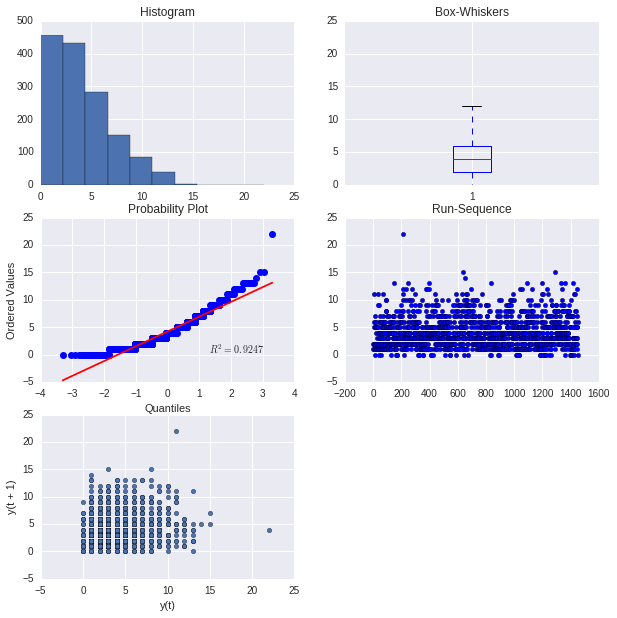

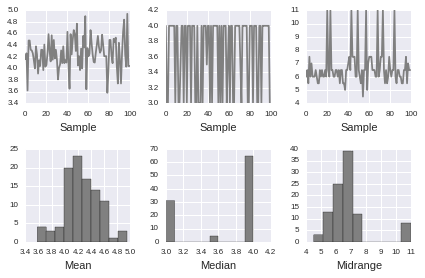

yelp_rating
Skew:  -0.358
Skew test:  SkewtestResult(statistic=-5.4324268561561047, pvalue=5.5592743588716288e-08)
Kurtosis:  0.291
Kurtosis test:  KurtosistestResult(statistic=2.0943173867884384, pvalue=0.036231716515325182)
 
PPCC_max value:  0.091


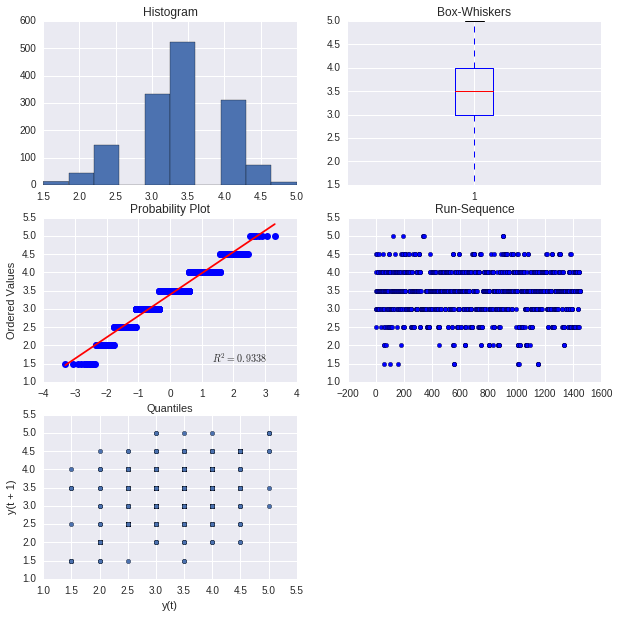

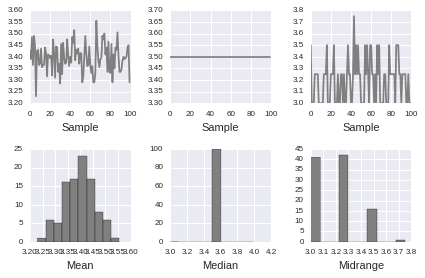

yelp_reviews
Skew:  11.004
Skew test:  SkewtestResult(statistic=42.299143577278222, pvalue=0.0)
Kurtosis:  148.295
Kurtosis test:  KurtosistestResult(statistic=25.316432393603005, pvalue=2.106071344099655e-141)
 
PPCC_max value:  148.014


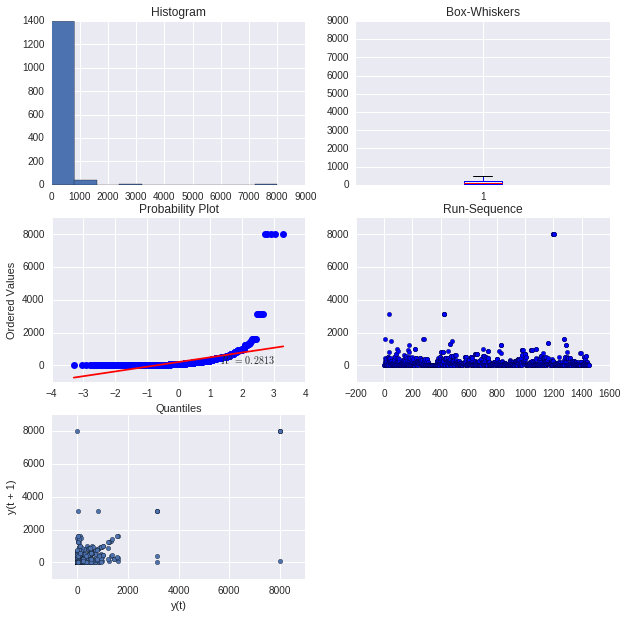

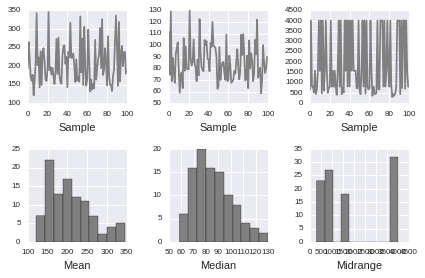

risk
Skew:  0.472
Skew test:  SkewtestResult(statistic=7.0218166702665936, pvalue=2.190017802754158e-12)
Kurtosis:  2.438
Kurtosis test:  KurtosistestResult(statistic=9.3458847326410144, pvalue=9.1124402908221919e-21)
 
PPCC_max value:  8.663


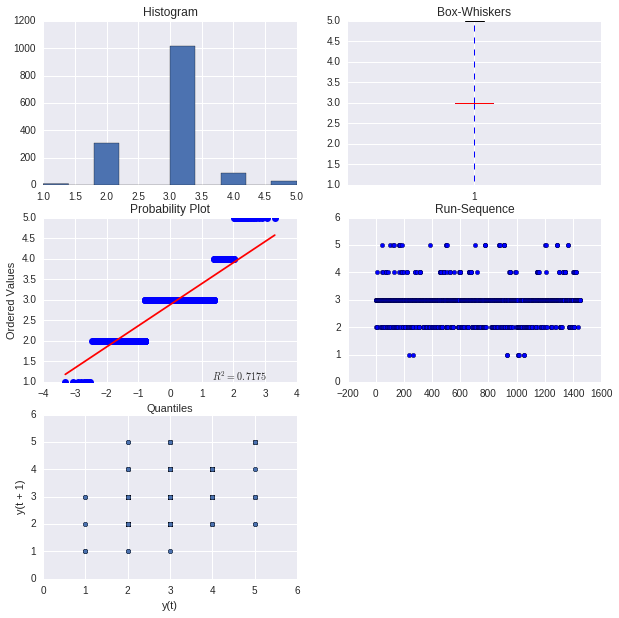

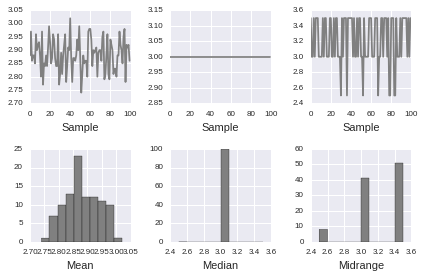

insp_badge
Skew:  0.726
Skew test:  SkewtestResult(statistic=10.231409859898703, pvalue=1.43416088804479e-24)
Kurtosis:  -1.342
Kurtosis test:  KurtosistestResult(statistic=-116.09554975915651, pvalue=0.0)
 
PPCC_max value:  1.442


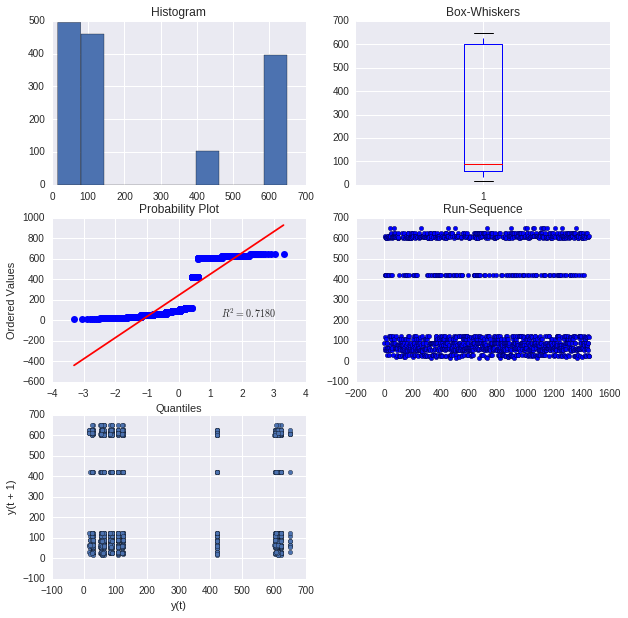

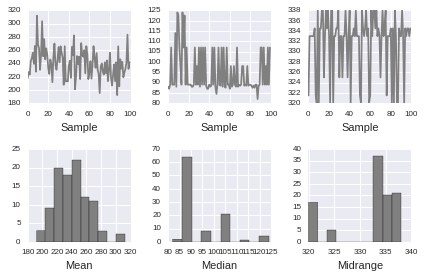

crime_count
Skew:  0.525
Skew test:  SkewtestResult(statistic=7.7282478130467647, pvalue=1.0903693056620254e-14)
Kurtosis:  -0.258
Kurtosis test:  KurtosistestResult(statistic=-2.2233829015488582, pvalue=0.026189991664696592)
 
PPCC_max value:  3.333


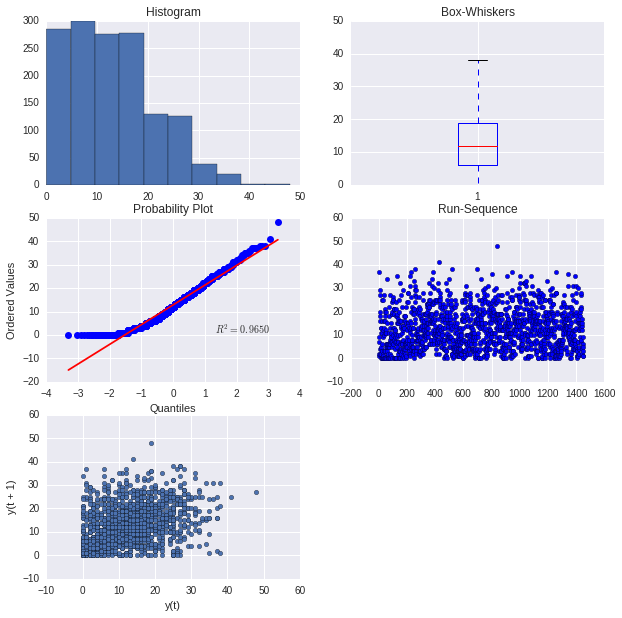

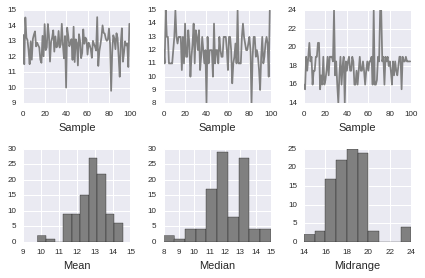

311_count
Skew:  7.255
Skew test:  SkewtestResult(statistic=36.962456556555452, pvalue=4.5947795786473398e-299)
Kurtosis:  66.796
Kurtosis test:  KurtosistestResult(statistic=23.32506410092622, pvalue=2.4688537860395053e-120)
 
PPCC_max value:  50.276


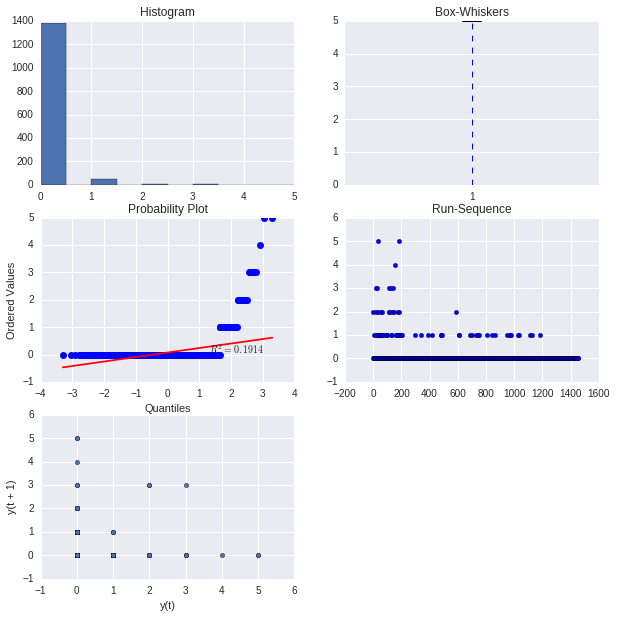

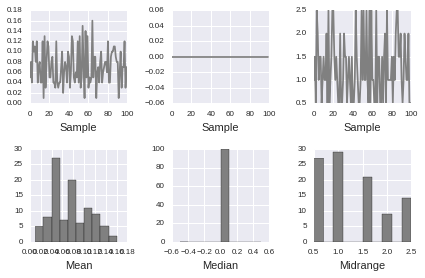

construction_count
Skew:  0.649
Skew test:  SkewtestResult(statistic=9.3179728008579126, pvalue=1.1858425998155348e-20)
Kurtosis:  0.152
Kurtosis test:  KurtosistestResult(statistic=1.2005438605702488, pvalue=0.22992818908626556)
 
PPCC_max value:  3.657


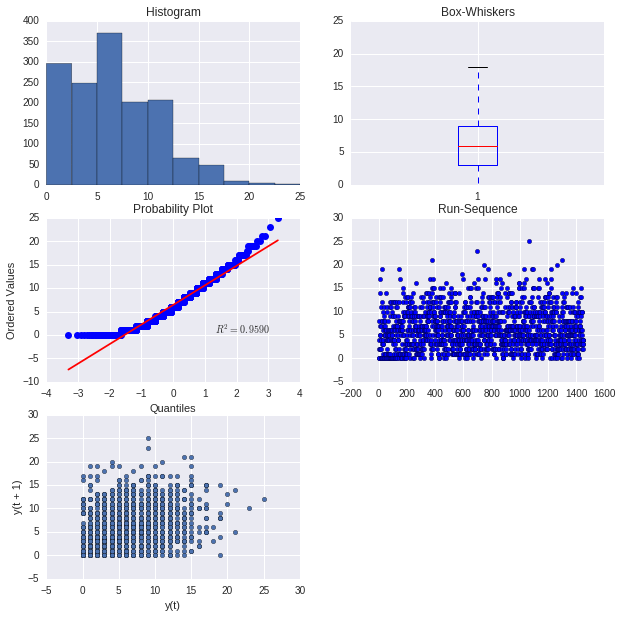

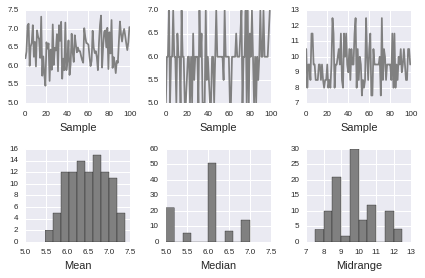

avg_high_temp
Skew:  -0.512
Skew test:  SkewtestResult(statistic=-7.561202593711128, pvalue=3.9935965348513749e-14)
Kurtosis:  -0.897
Kurtosis test:  KurtosistestResult(statistic=-13.759002909878813, pvalue=4.4968601594064957e-43)
 
PPCC_max value:  2.828


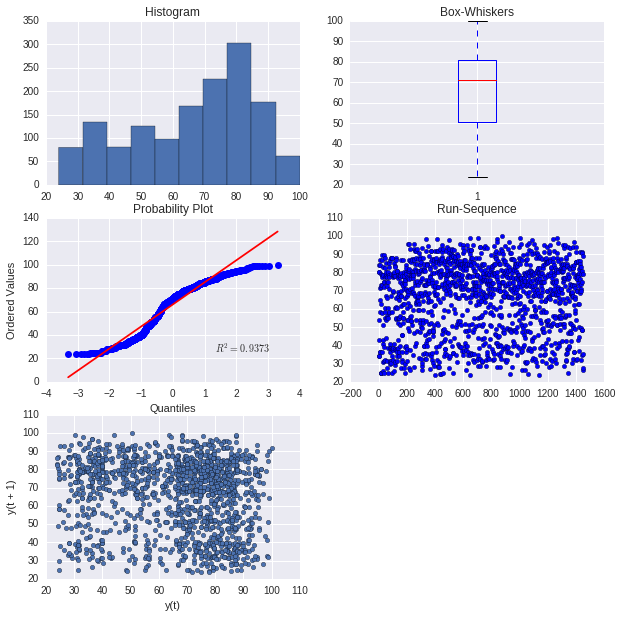

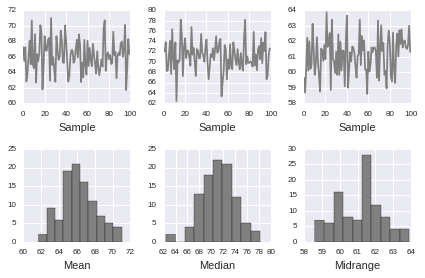

time_diff
Skew:  -1.632
Skew test:  SkewtestResult(statistic=-18.478898696890347, pvalue=3.0535056968934013e-76)
Kurtosis:  3.781
Kurtosis test:  KurtosistestResult(statistic=11.519783822282227, pvalue=1.0487378064755117e-30)
 
PPCC_max value:  5.439


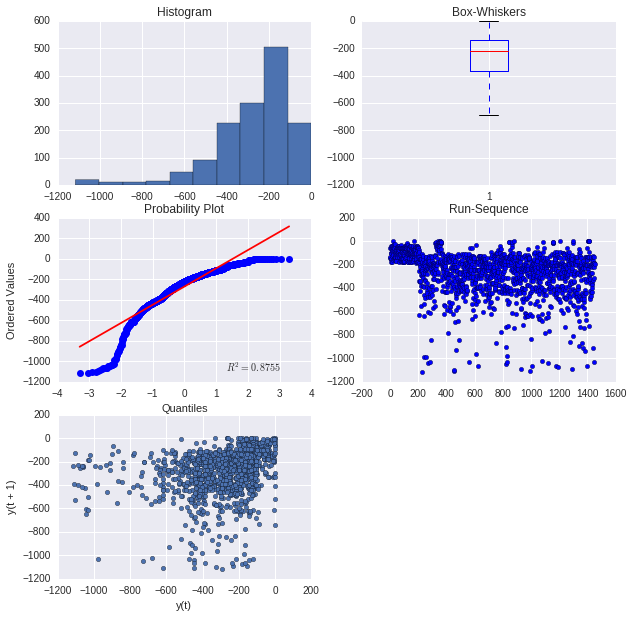

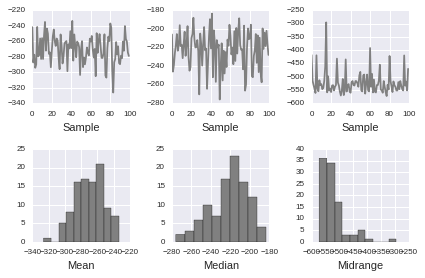

target
Skew:  0.461
Skew test:  SkewtestResult(statistic=6.8732772137705203, pvalue=6.2743467280154271e-12)
Kurtosis:  -1.788
Kurtosis test:  KurtosistestResult(statistic=0.0, pvalue=1.0)
 
PPCC_max value:  1.455


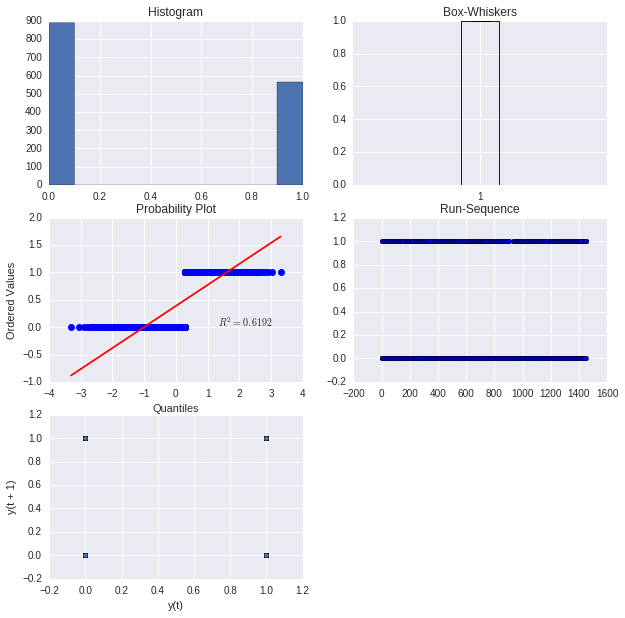

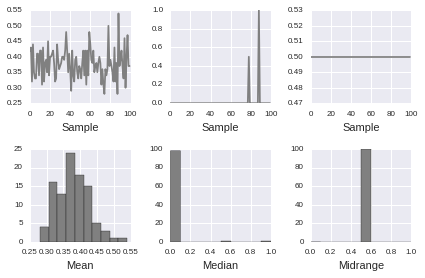

Burgers
Skew:  16.953
Skew test:  SkewtestResult(statistic=47.848560876508216, pvalue=0.0)
Kurtosis:  285.403
Kurtosis test:  KurtosistestResult(statistic=26.61109827498429, pvalue=5.0504225781327444e-156)
 
PPCC_max value:  -0.84


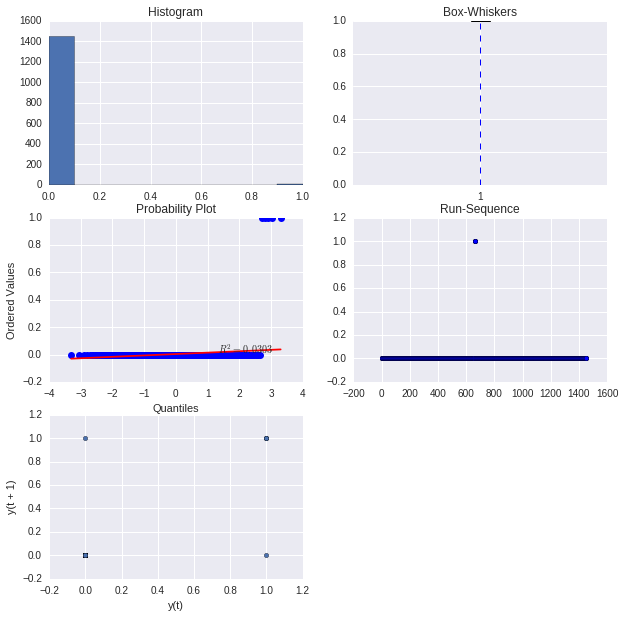

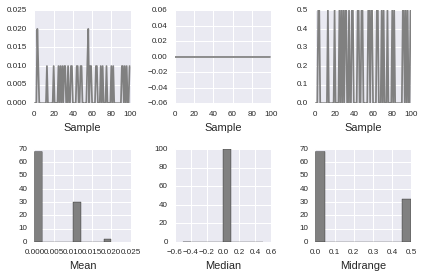

Convenience Stores
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002239, pvalue=5.8797450630929049e-166)
 
PPCC_max value:  -1.003


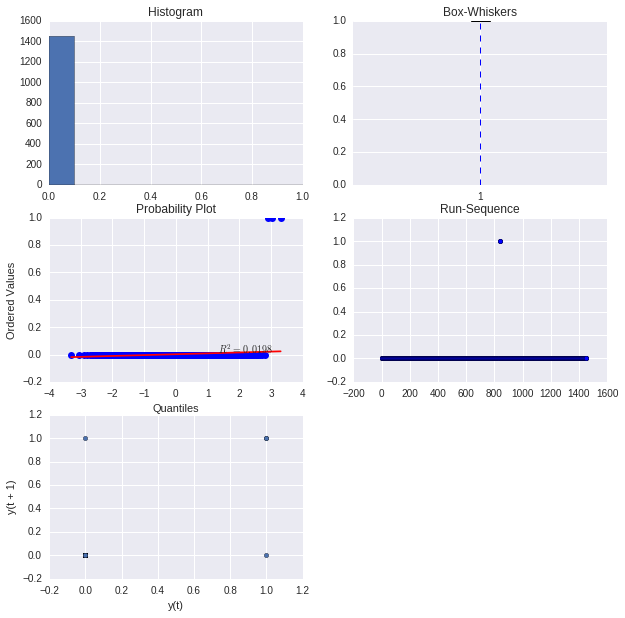

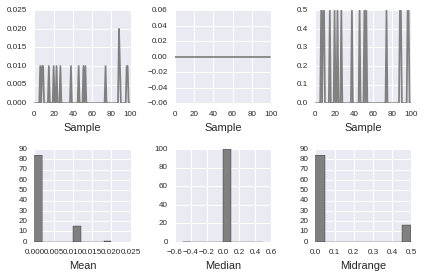

Sandwiches
Skew:  16.953
Skew test:  SkewtestResult(statistic=47.848560876508216, pvalue=0.0)
Kurtosis:  285.403
Kurtosis test:  KurtosistestResult(statistic=26.61109827498429, pvalue=5.0504225781327444e-156)
 
PPCC_max value:  -0.84


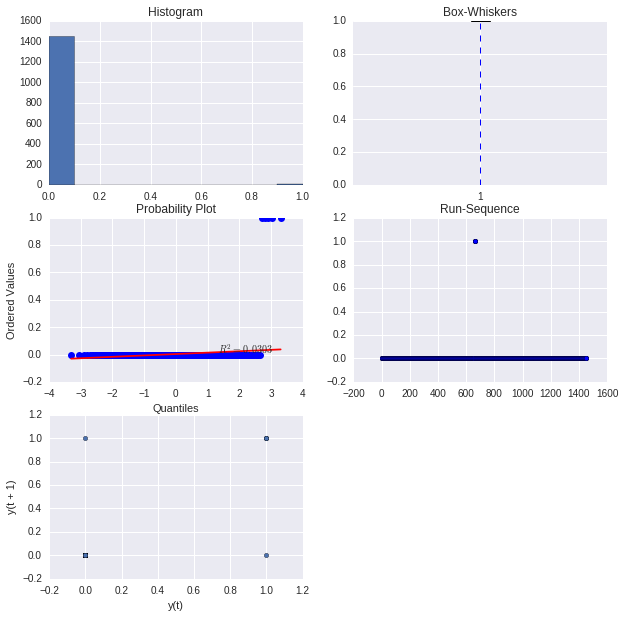

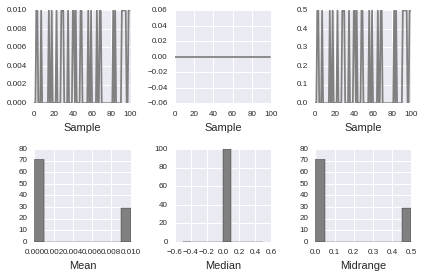

Wine & Spirits
Skew:  13.361
Skew test:  SkewtestResult(statistic=44.789520526582891, pvalue=0.0)
Kurtosis:  176.506
Kurtosis test:  KurtosistestResult(statistic=25.68805139376704, pvalue=1.589658530126193e-145)
 
PPCC_max value:  -0.731


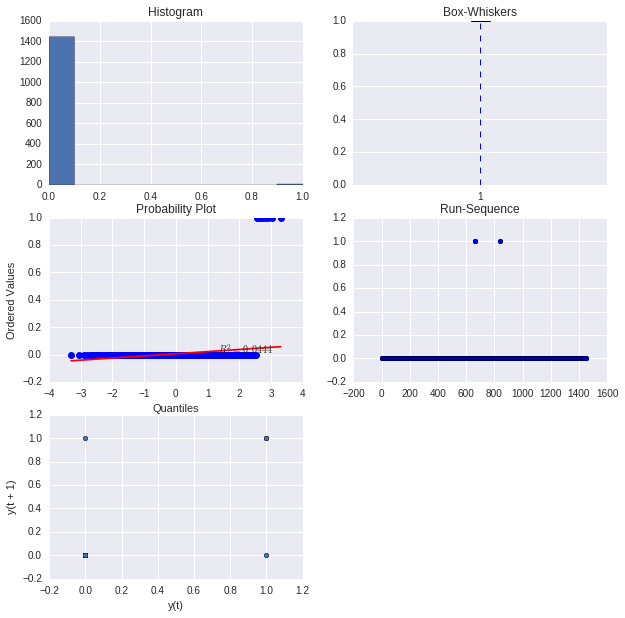

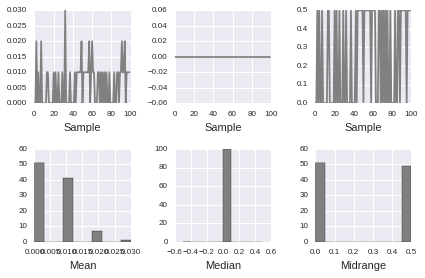

adultentertainment
Skew:  18.974
Skew test:  SkewtestResult(statistic=49.295822655407314, pvalue=0.0)
Kurtosis:  358.003
Kurtosis test:  KurtosistestResult(statistic=26.998667165863147, pvalue=1.5321231532828017e-160)
 
PPCC_max value:  -0.903


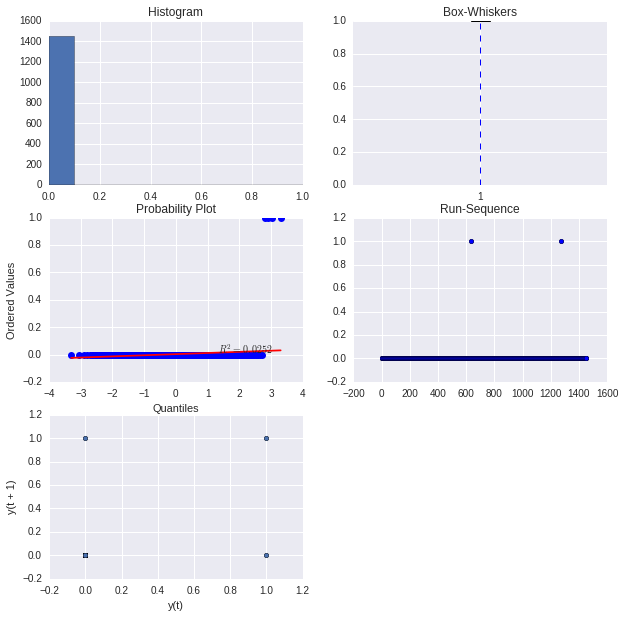

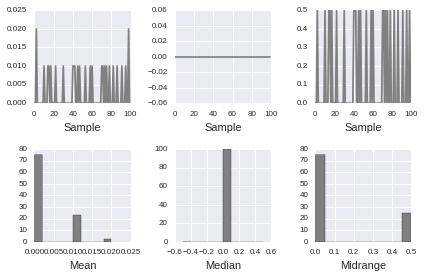

afghani
Skew:  10.036
Skew test:  SkewtestResult(statistic=41.117925363896482, pvalue=0.0)
Kurtosis:  98.724
Kurtosis test:  KurtosistestResult(statistic=24.363038165309668, pvalue=4.2177281679864677e-131)
 
PPCC_max value:  129.633


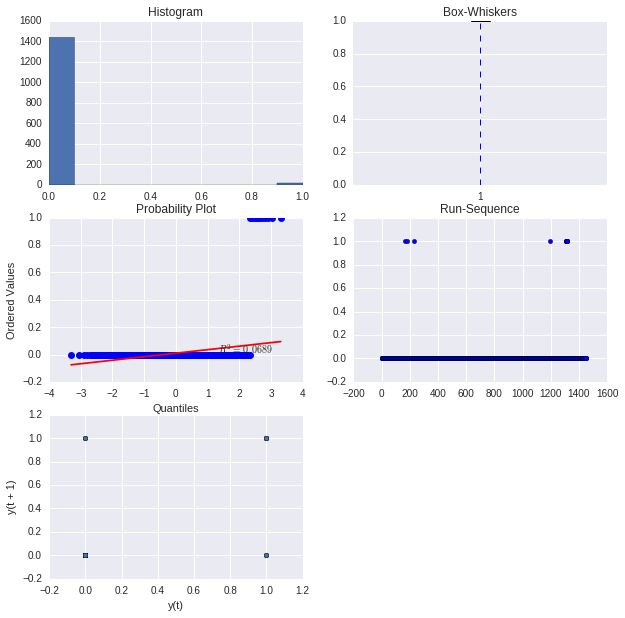

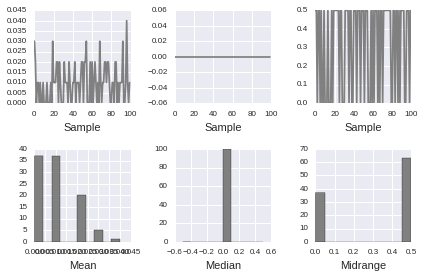

african
Skew:  16.953
Skew test:  SkewtestResult(statistic=47.848560876508216, pvalue=0.0)
Kurtosis:  285.403
Kurtosis test:  KurtosistestResult(statistic=26.61109827498429, pvalue=5.0504225781327444e-156)
 
PPCC_max value:  -0.84


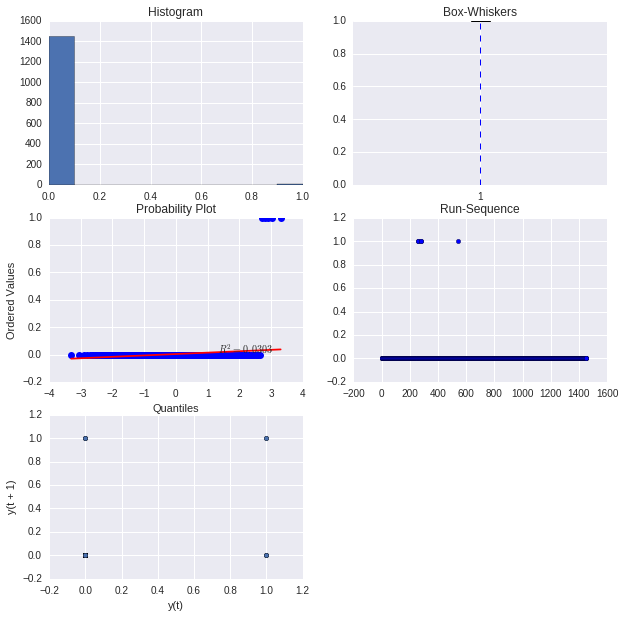

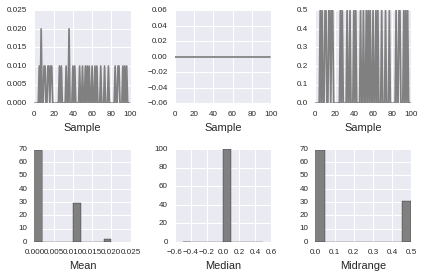

apartments
Skew:  38.066
Skew test:  SkewtestResult(statistic=58.248832293024101, pvalue=0.0)
Kurtosis:  1447.001
Kurtosis test:  KurtosistestResult(statistic=28.842202977705817, pvalue=6.3465169483880958e-183)
 
PPCC_max value:  -38.369


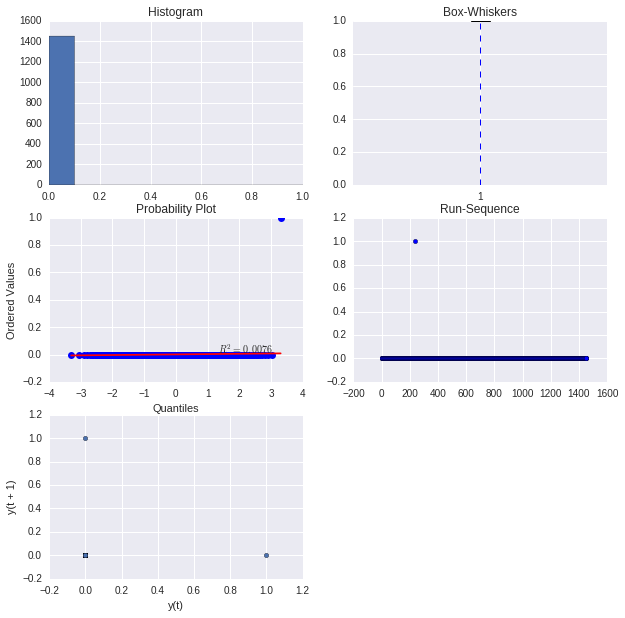

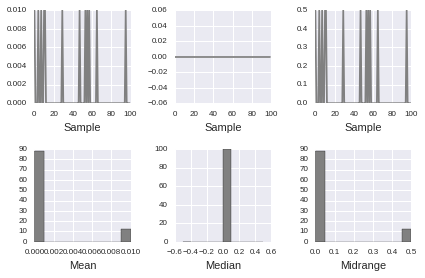

asianfusion
Skew:  8.343
Skew test:  SkewtestResult(statistic=38.751190933341164, pvalue=0.0)
Kurtosis:  67.614
Kurtosis test:  KurtosistestResult(statistic=23.359342831102264, pvalue=1.1075492656809312e-120)
 
PPCC_max value:  90.354


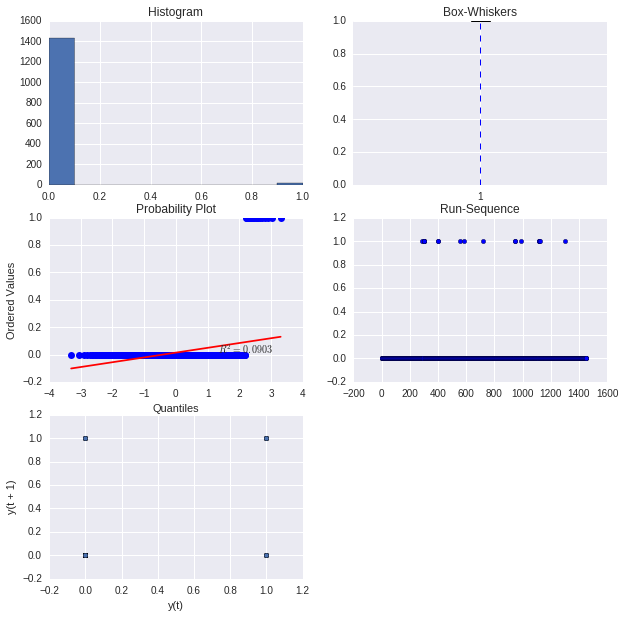

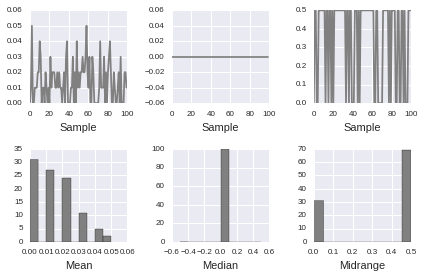

bagels
Skew:  6.74
Skew test:  SkewtestResult(statistic=36.021040058363262, pvalue=3.9190104131177476e-284)
Kurtosis:  43.421
Kurtosis test:  KurtosistestResult(statistic=22.027417555603687, pvalue=1.5728875287949069e-107)
 
PPCC_max value:  59.878


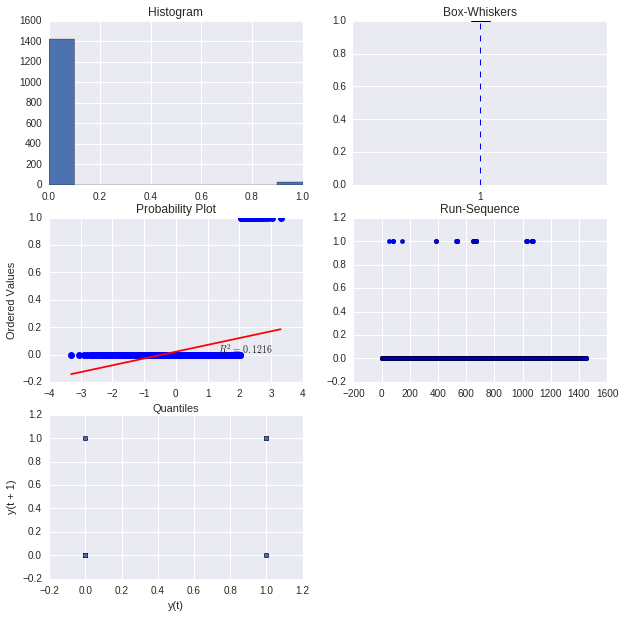

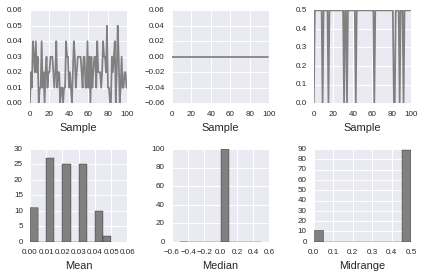

bakeries
Skew:  3.929
Skew test:  SkewtestResult(statistic=29.170119069813659, pvalue=4.6430946715365827e-187)
Kurtosis:  13.437
Kurtosis test:  KurtosistestResult(statistic=17.592393480821528, pvalue=2.8172291954103337e-69)
 
PPCC_max value:  22.125


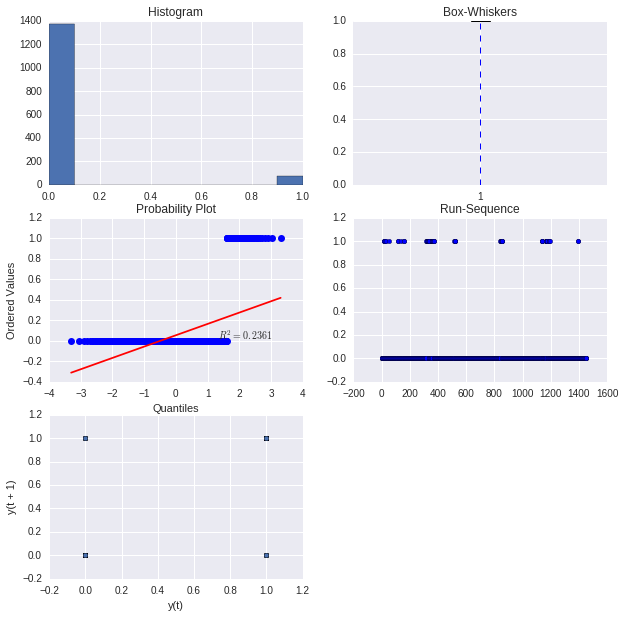

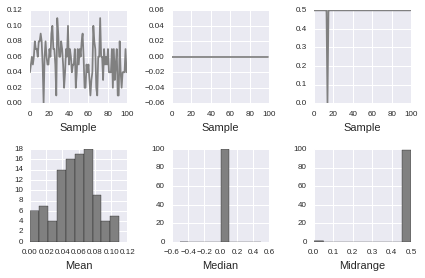

bangladeshi
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002235, pvalue=5.8797450630935724e-166)
 
PPCC_max value:  -1.003


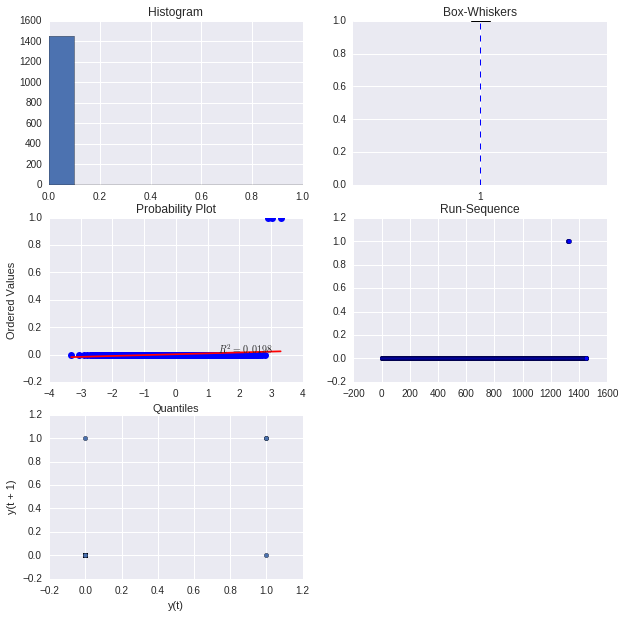

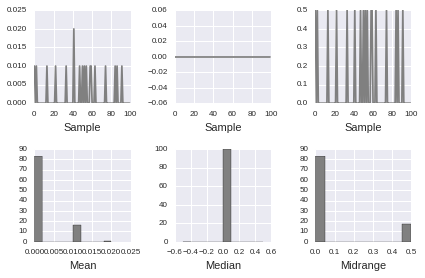

bars
Skew:  3.683
Skew test:  SkewtestResult(statistic=28.357012758398806, pvalue=6.8590551684362301e-177)
Kurtosis:  11.565
Kurtosis test:  KurtosistestResult(statistic=16.929322614935565, pvalue=2.7350947506600709e-64)
 
PPCC_max value:  19.762


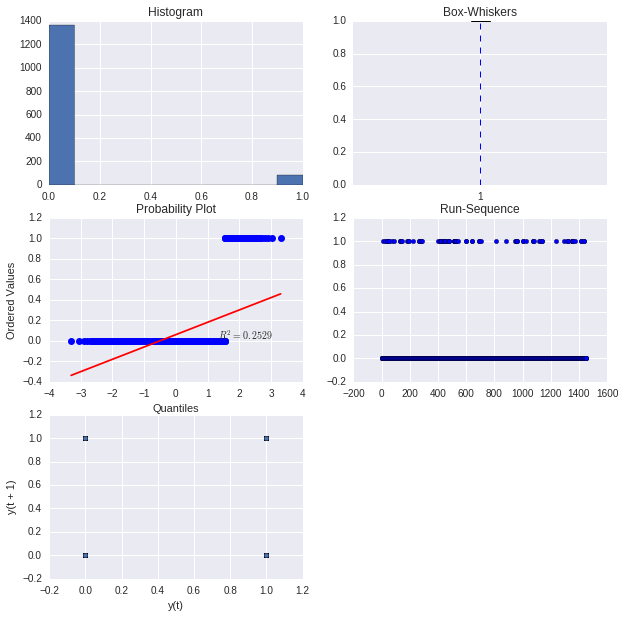

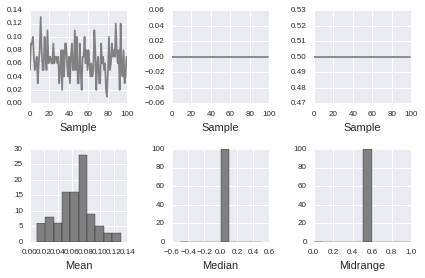

bbq
Skew:  11.925
Skew test:  SkewtestResult(statistic=43.330253588574678, pvalue=0.0)
Kurtosis:  140.207
Kurtosis test:  KurtosistestResult(statistic=25.192262091256342, pvalue=4.8694482229521845e-140)
 
PPCC_max value:  182.239


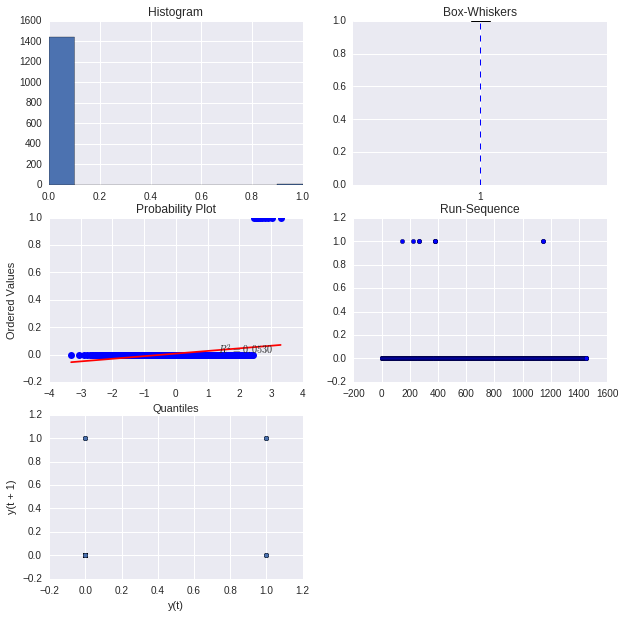

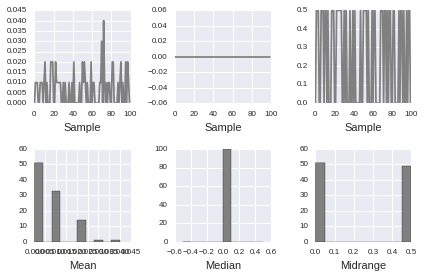

beerbar
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002235, pvalue=5.8797450630935724e-166)
 
PPCC_max value:  -1.003


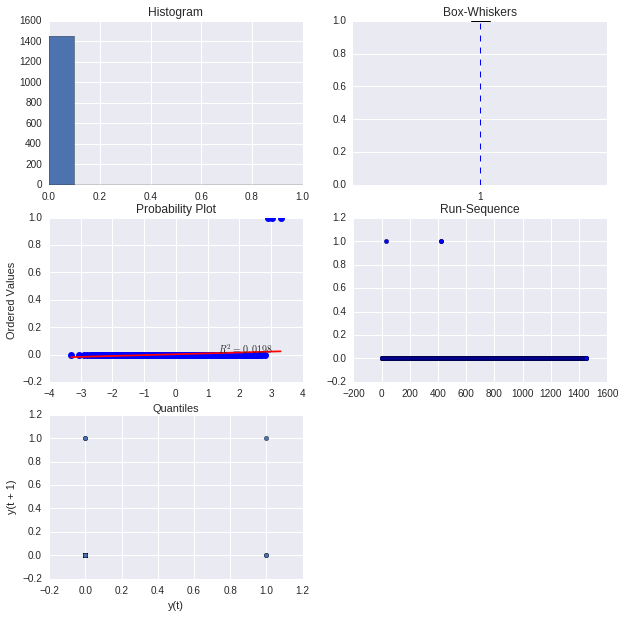

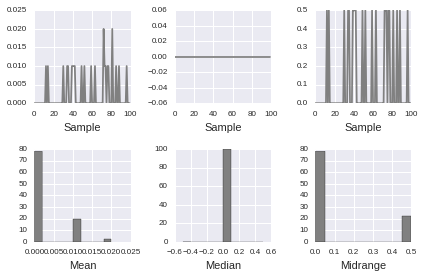

beergardens
Skew:  26.889
Skew test:  SkewtestResult(statistic=53.778258357470577, pvalue=0.0)
Kurtosis:  721.001
Kurtosis test:  KurtosistestResult(statistic=28.028684727192545, pvalue=7.2670370607999477e-173)
 
PPCC_max value:  -1.216


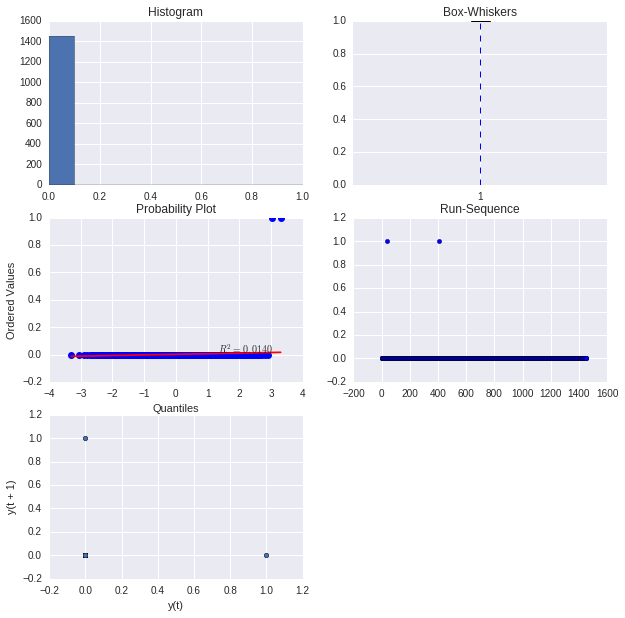

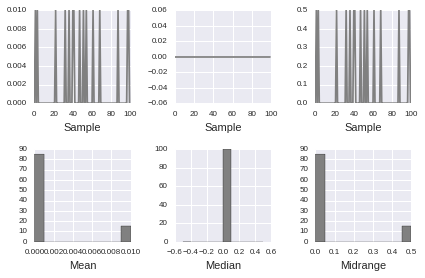

belgian
Skew:  11.925
Skew test:  SkewtestResult(statistic=43.330253588574678, pvalue=0.0)
Kurtosis:  140.207
Kurtosis test:  KurtosistestResult(statistic=25.192262091256342, pvalue=4.8694482229521845e-140)
 
PPCC_max value:  182.239


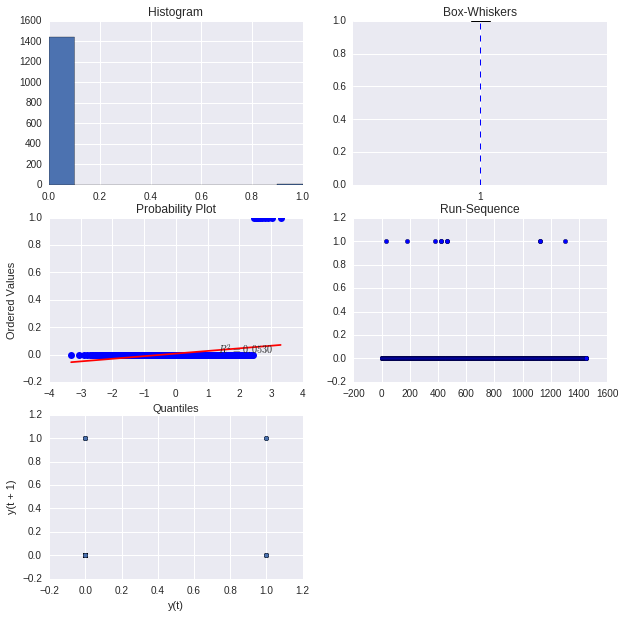

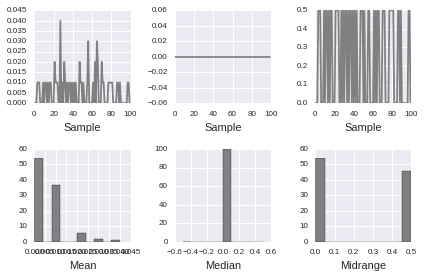

brasseries
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002239, pvalue=5.8797450630929049e-166)
 
PPCC_max value:  -1.003


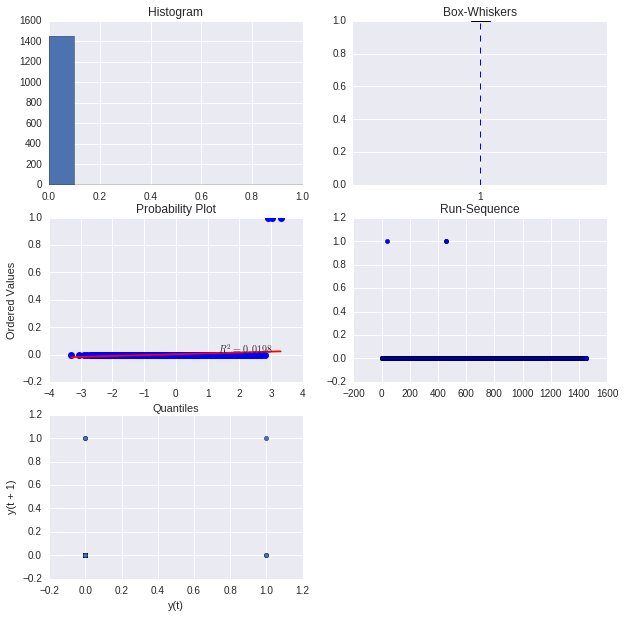

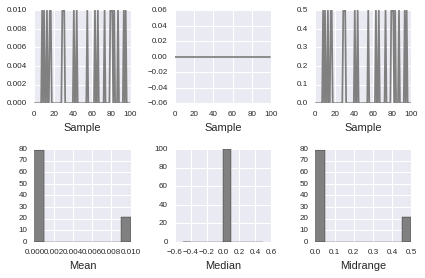

breakfast_brunch
Skew:  2.832
Skew test:  SkewtestResult(statistic=25.080792695145437, pvalue=8.0588406293183304e-139)
Kurtosis:  6.018
Kurtosis test:  KurtosistestResult(statistic=13.839698011003865, pvalue=1.4682211027440922e-43)
 
PPCC_max value:  12.743


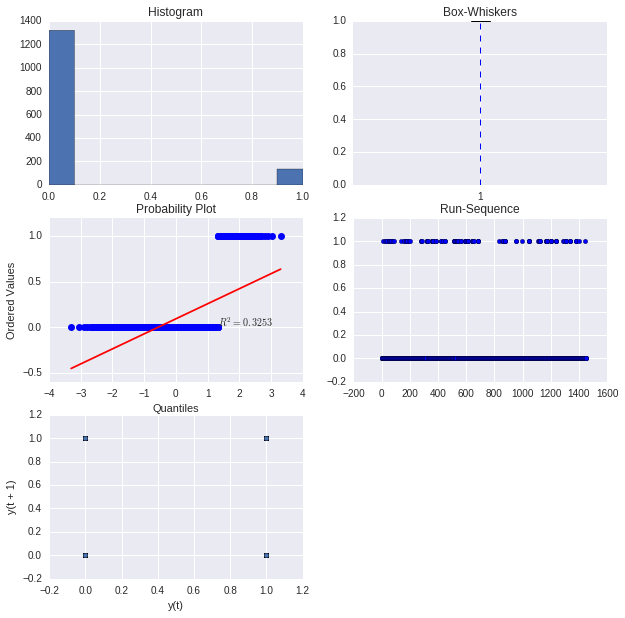

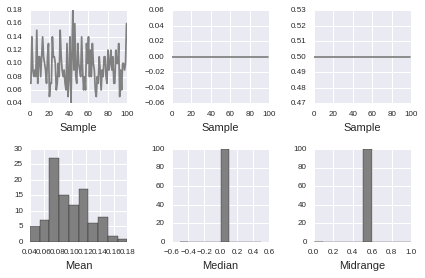

breweries
Skew:  11.925
Skew test:  SkewtestResult(statistic=43.330253588574671, pvalue=0.0)
Kurtosis:  140.207
Kurtosis test:  KurtosistestResult(statistic=25.192262091256342, pvalue=4.8694482229521845e-140)
 
PPCC_max value:  182.239


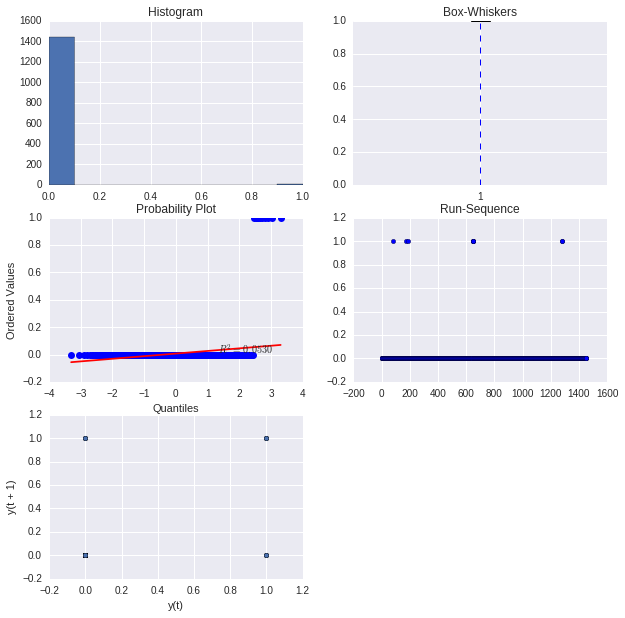

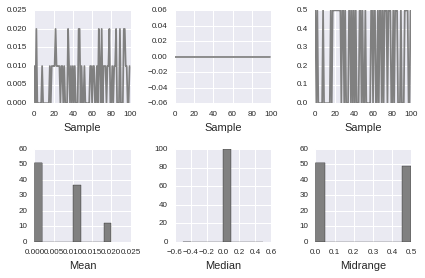

british
Skew:  14.298
Skew test:  SkewtestResult(statistic=45.660388120051472, pvalue=0.0)
Kurtosis:  202.433
Kurtosis test:  KurtosistestResult(statistic=25.966167376749382, pvalue=1.1943548534879895e-148)
 
PPCC_max value:  -0.759


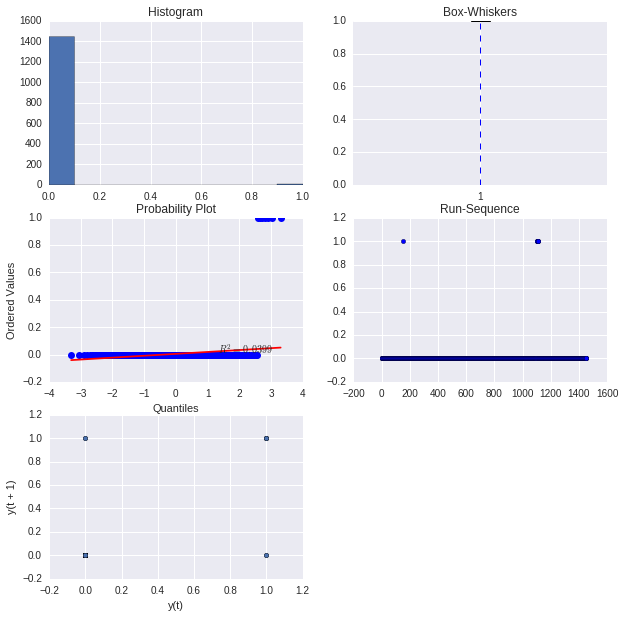

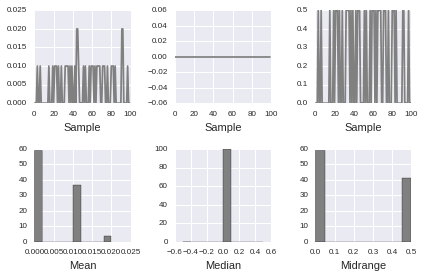

buffets
Skew:  10.036
Skew test:  SkewtestResult(statistic=41.117925363896482, pvalue=0.0)
Kurtosis:  98.724
Kurtosis test:  KurtosistestResult(statistic=24.363038165309668, pvalue=4.2177281679864677e-131)
 
PPCC_max value:  129.633


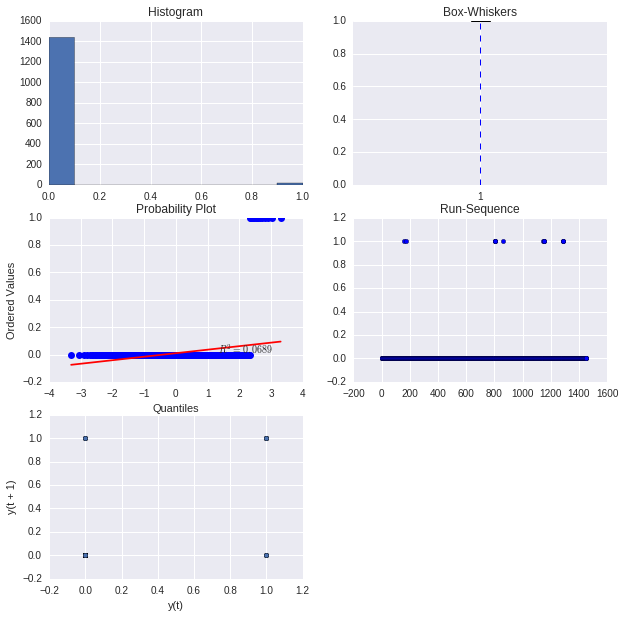

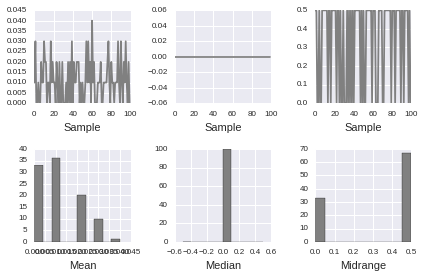

burgers
Skew:  4.566
Skew test:  SkewtestResult(statistic=31.067089992666435, pvalue=6.7061537393092046e-212)
Kurtosis:  18.847
Kurtosis test:  KurtosistestResult(statistic=19.010041170391183, pvalue=1.4084190634674029e-80)
 
PPCC_max value:  28.943


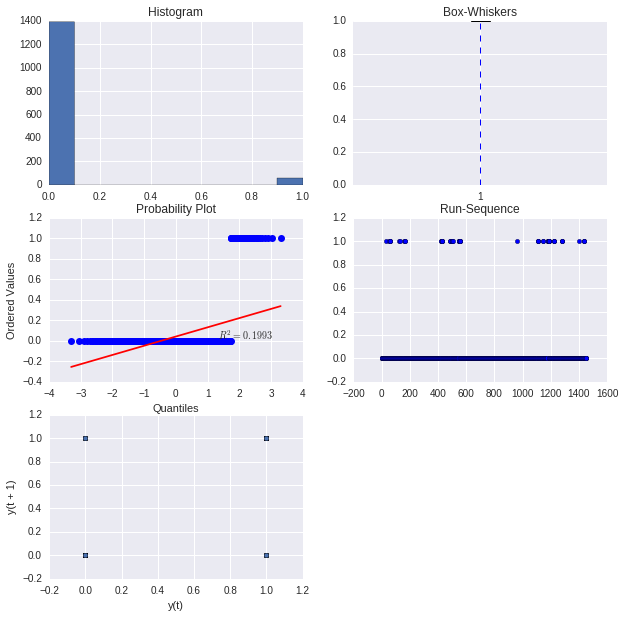

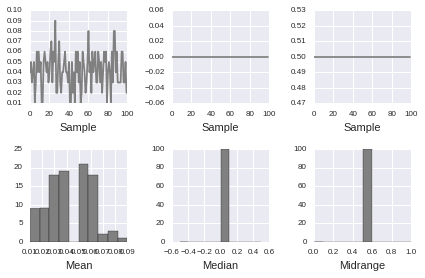

burmese
Skew:  38.066
Skew test:  SkewtestResult(statistic=58.248832293024101, pvalue=0.0)
Kurtosis:  1447.001
Kurtosis test:  KurtosistestResult(statistic=28.842202977705817, pvalue=6.3465169483880958e-183)
 
PPCC_max value:  -38.369


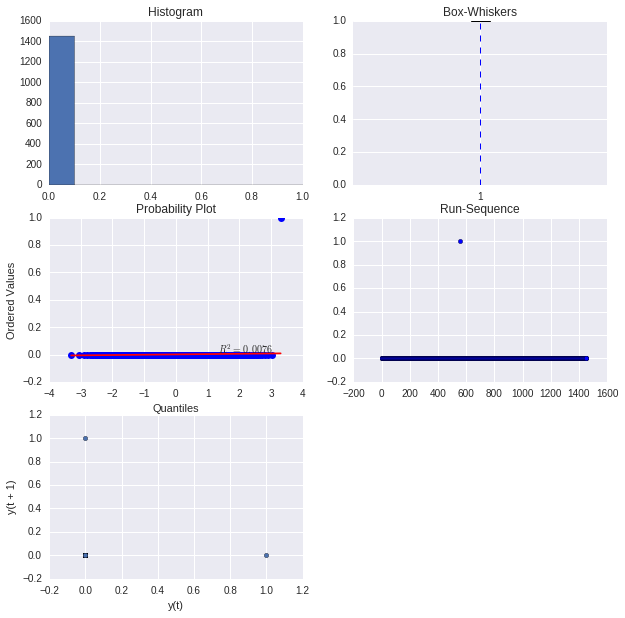

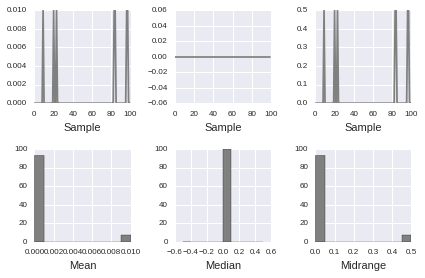

cafes
Skew:  3.929
Skew test:  SkewtestResult(statistic=29.170119069813662, pvalue=4.6430946715365827e-187)
Kurtosis:  13.437
Kurtosis test:  KurtosistestResult(statistic=17.592393480821535, pvalue=2.8172291954100115e-69)
 
PPCC_max value:  22.125


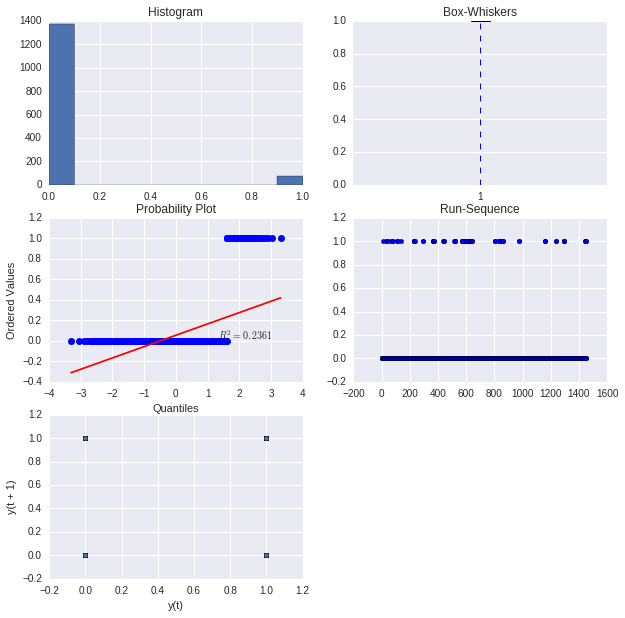

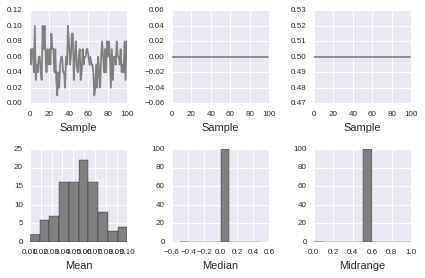

cafeteria
Skew:  10.426
Skew test:  SkewtestResult(statistic=41.606640418852209, pvalue=0.0)
Kurtosis:  106.701
Kurtosis test:  KurtosistestResult(statistic=24.554769889061248, pvalue=3.8462783079299137e-133)
 
PPCC_max value:  139.726


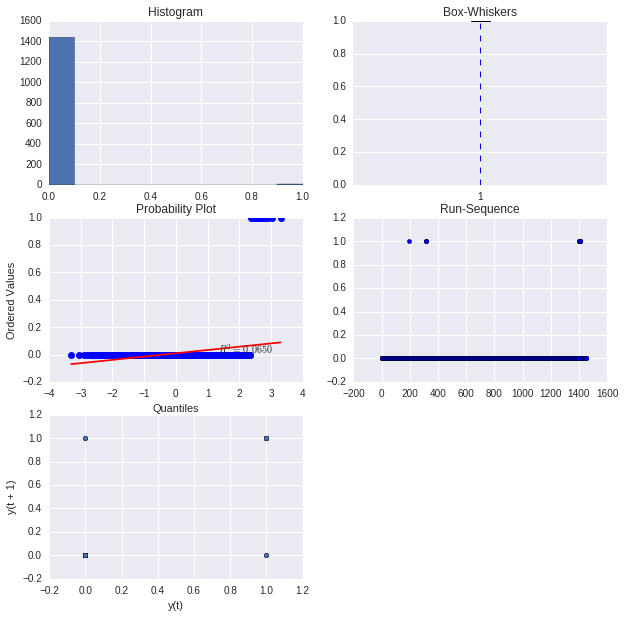

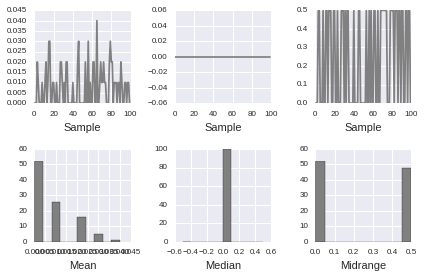

cajun
Skew:  9.079
Skew test:  SkewtestResult(statistic=39.832876640614835, pvalue=0.0)
Kurtosis:  80.424
Kurtosis test:  KurtosistestResult(statistic=23.834094398404456, pvalue=1.4806002770835018e-125)
 
PPCC_max value:  106.513


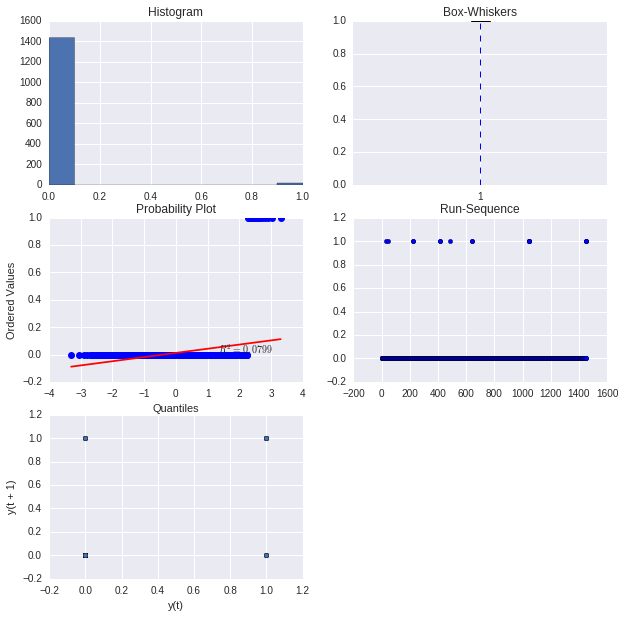

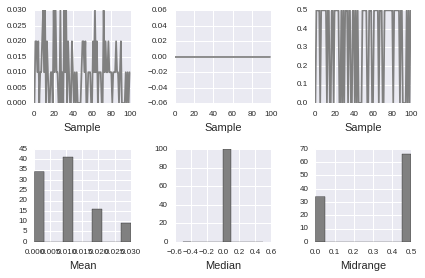

catering
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002235, pvalue=5.8797450630935724e-166)
 
PPCC_max value:  -1.003


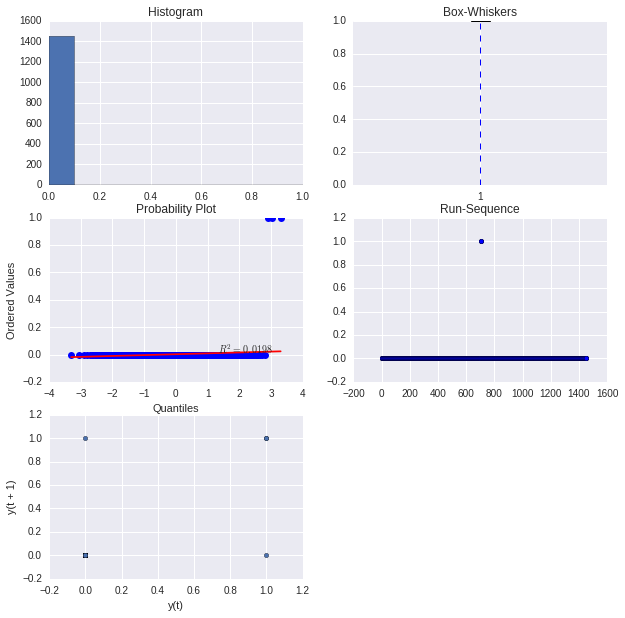

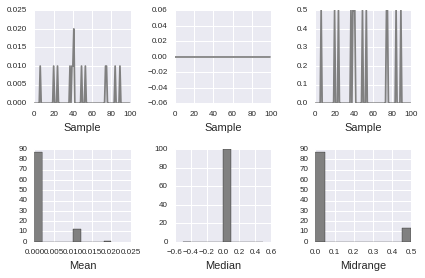

cheesesteaks
Skew:  26.889
Skew test:  SkewtestResult(statistic=53.778258357470577, pvalue=0.0)
Kurtosis:  721.001
Kurtosis test:  KurtosistestResult(statistic=28.028684727192545, pvalue=7.2670370607999477e-173)
 
PPCC_max value:  -1.216


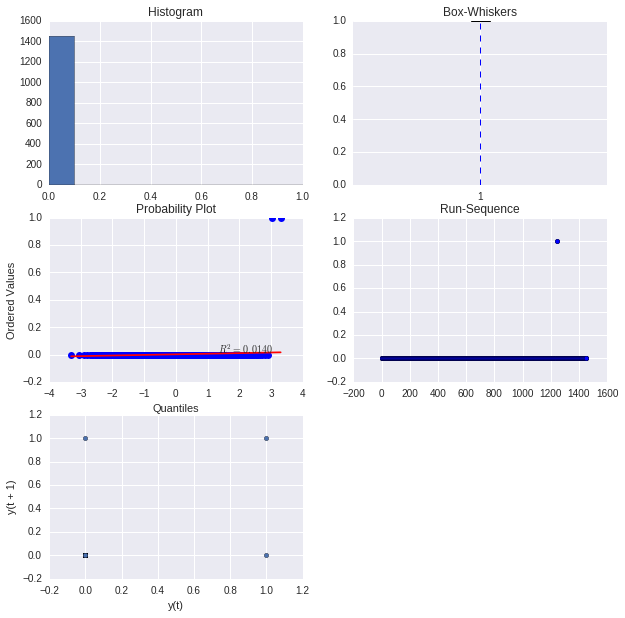

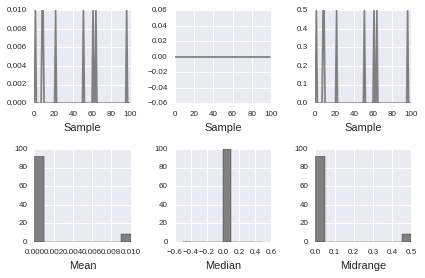

chicken_wings
Skew:  9.368
Skew test:  SkewtestResult(statistic=40.234906953298214, pvalue=0.0)
Kurtosis:  85.761
Kurtosis test:  KurtosistestResult(statistic=24.003544954655975, pvalue=2.5535910038177771e-127)
 
PPCC_max value:  113.252


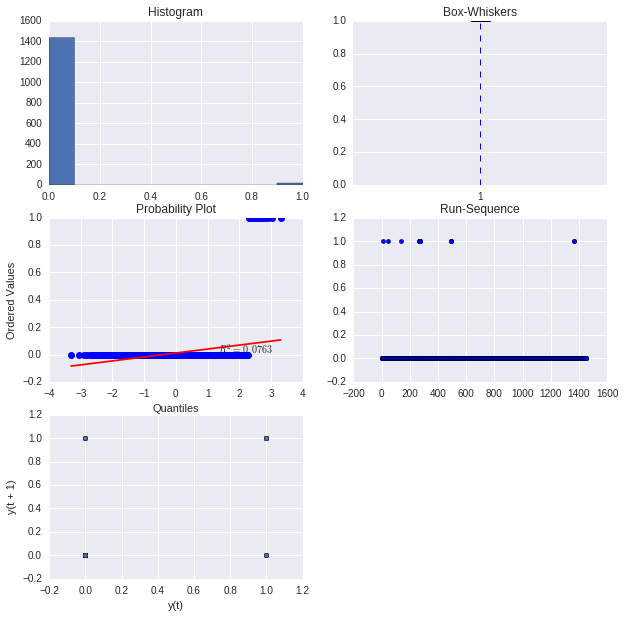

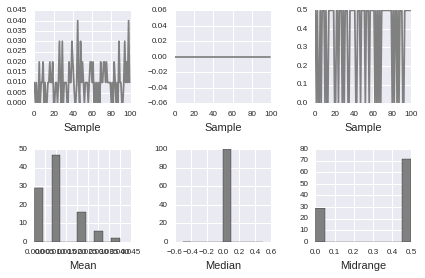

chinese
Skew:  4.442
Skew test:  SkewtestResult(statistic=30.719733067477499, pvalue=3.1029738112871387e-207)
Kurtosis:  17.734
Kurtosis test:  KurtosistestResult(statistic=18.762999650406591, pvalue=1.5159776178895278e-78)
 
PPCC_max value:  27.541


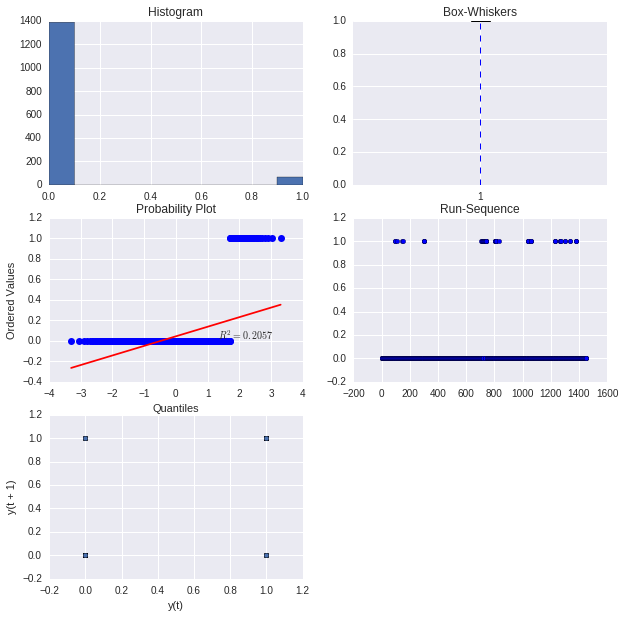

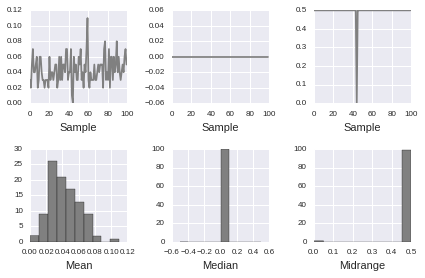

chocolate
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002239, pvalue=5.8797450630929049e-166)
 
PPCC_max value:  -1.003


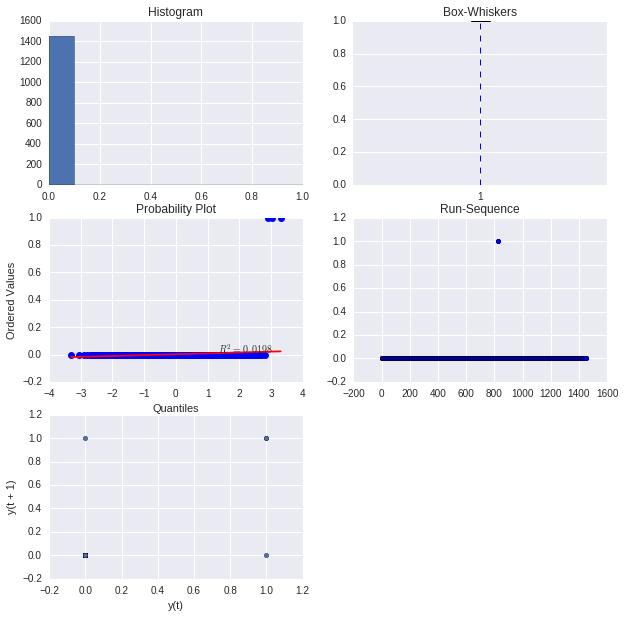

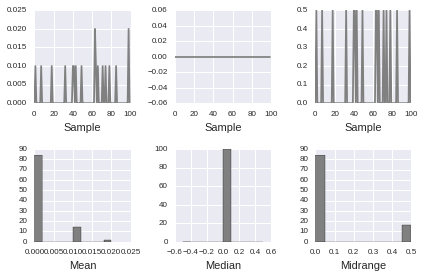

churches
Skew:  14.298
Skew test:  SkewtestResult(statistic=45.660388120051465, pvalue=0.0)
Kurtosis:  202.433
Kurtosis test:  KurtosistestResult(statistic=25.966167376749382, pvalue=1.1943548534879895e-148)
 
PPCC_max value:  -0.759


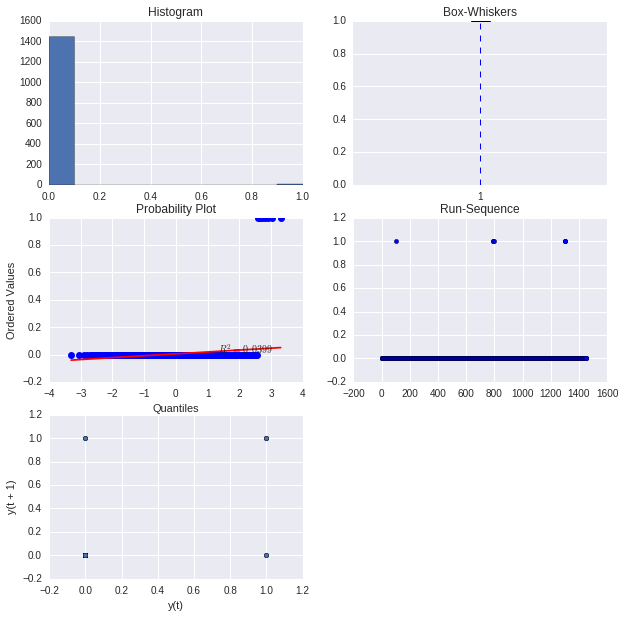

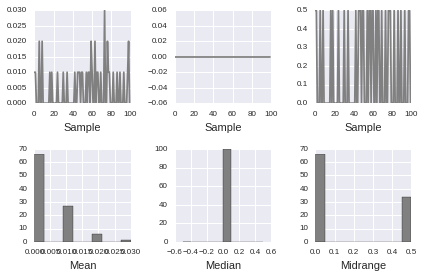

cocktailbars
Skew:  8.814
Skew test:  SkewtestResult(statistic=39.45312686744019, pvalue=0.0)
Kurtosis:  75.679
Kurtosis test:  KurtosistestResult(statistic=23.670601231609183, pvalue=7.2432365919184185e-124)
 
PPCC_max value:  100.526


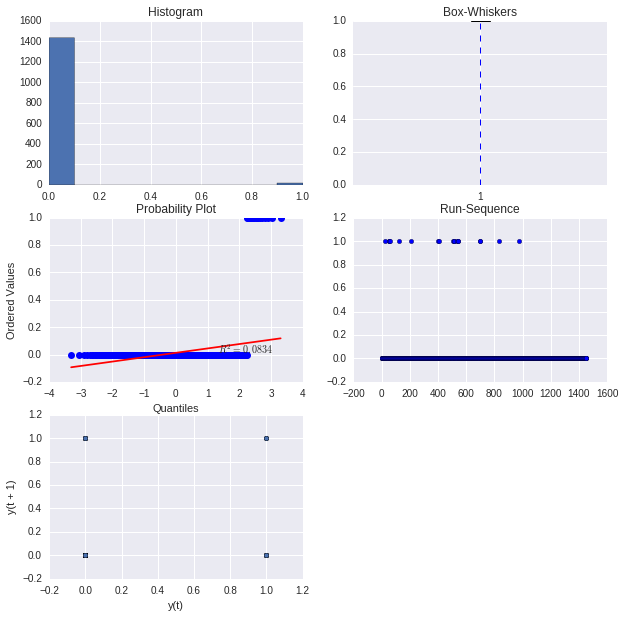

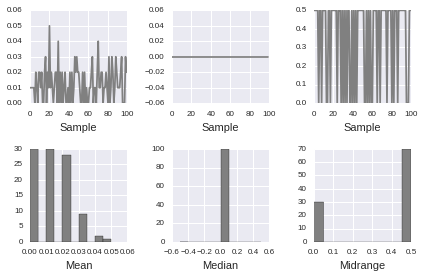

coffee
Skew:  3.116
Skew test:  SkewtestResult(statistic=26.268925460345585, pvalue=4.3452779156450925e-152)
Kurtosis:  7.712
Kurtosis test:  KurtosistestResult(statistic=15.046589877645246, pvalue=3.6349462256498266e-51)
 
PPCC_max value:  14.892


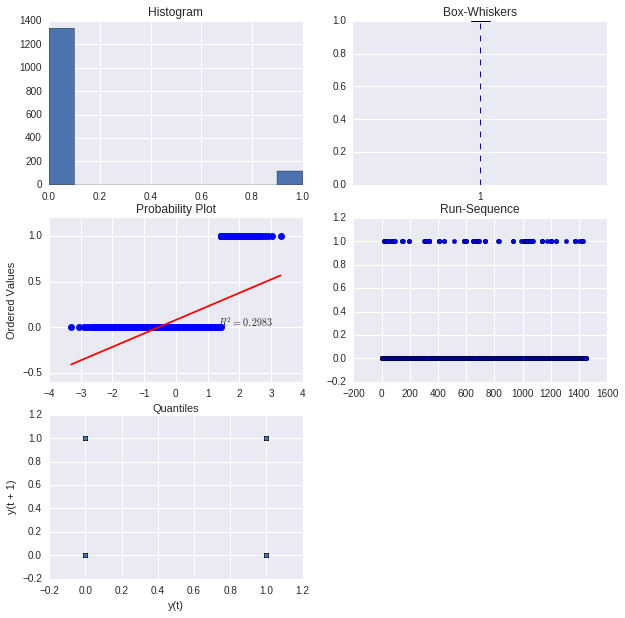

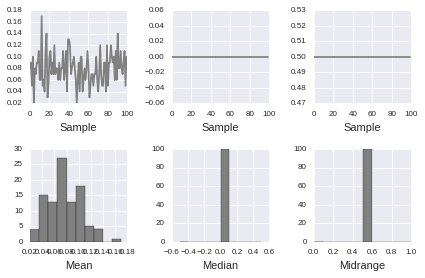

coffeeroasteries
Skew:  38.066
Skew test:  SkewtestResult(statistic=58.248832293024101, pvalue=0.0)
Kurtosis:  1447.001
Kurtosis test:  KurtosistestResult(statistic=28.842202977705817, pvalue=6.3465169483880958e-183)
 
PPCC_max value:  -38.369


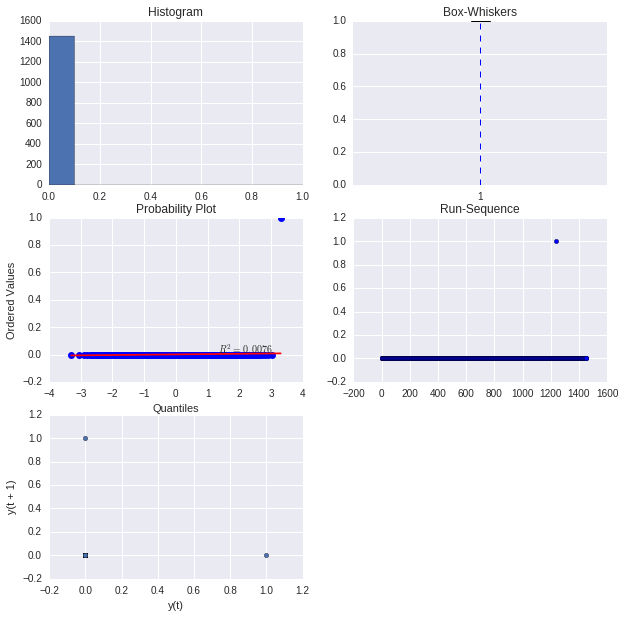

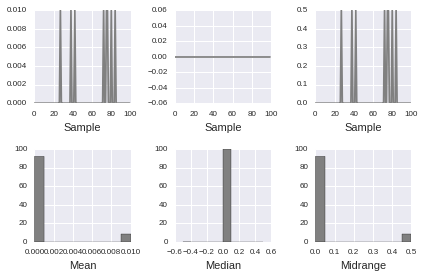

comfortfood
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002235, pvalue=5.8797450630935724e-166)
 
PPCC_max value:  -1.003


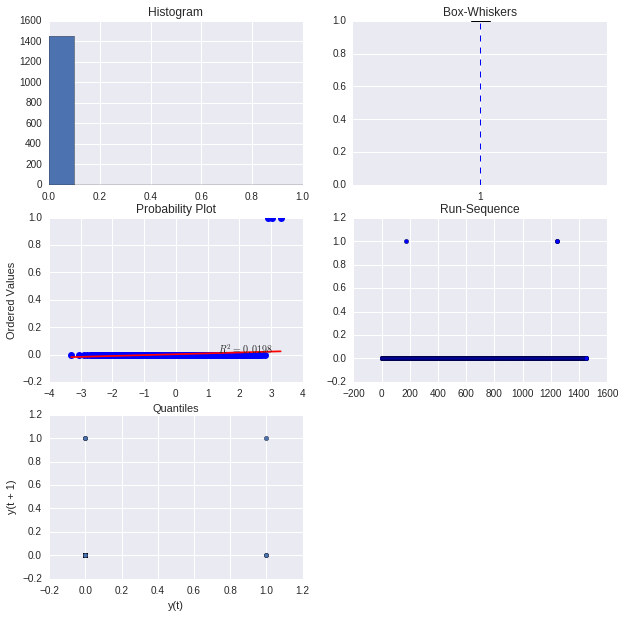

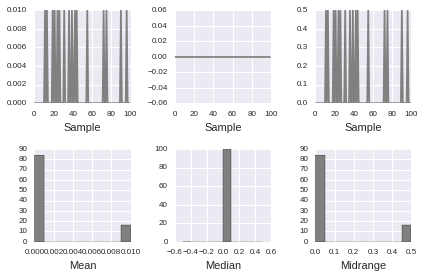

cookingschools
Skew:  26.889
Skew test:  SkewtestResult(statistic=53.778258357470577, pvalue=0.0)
Kurtosis:  721.001
Kurtosis test:  KurtosistestResult(statistic=28.028684727192545, pvalue=7.2670370607999477e-173)
 
PPCC_max value:  -1.216


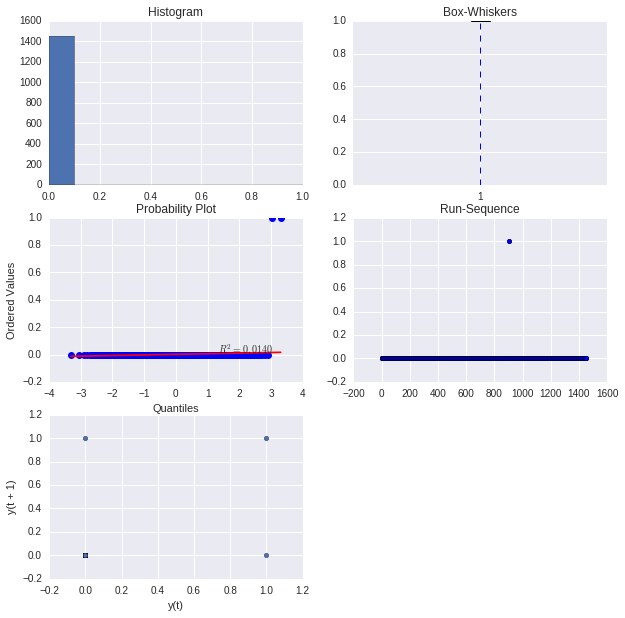

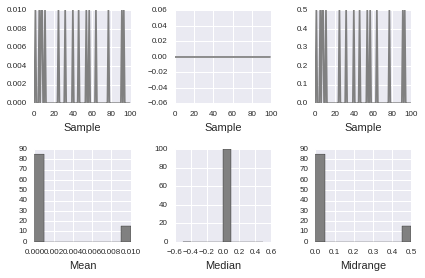

creperies
Skew:  16.953
Skew test:  SkewtestResult(statistic=47.84856087650823, pvalue=0.0)
Kurtosis:  285.403
Kurtosis test:  KurtosistestResult(statistic=26.61109827498429, pvalue=5.0504225781327444e-156)
 
PPCC_max value:  -0.84


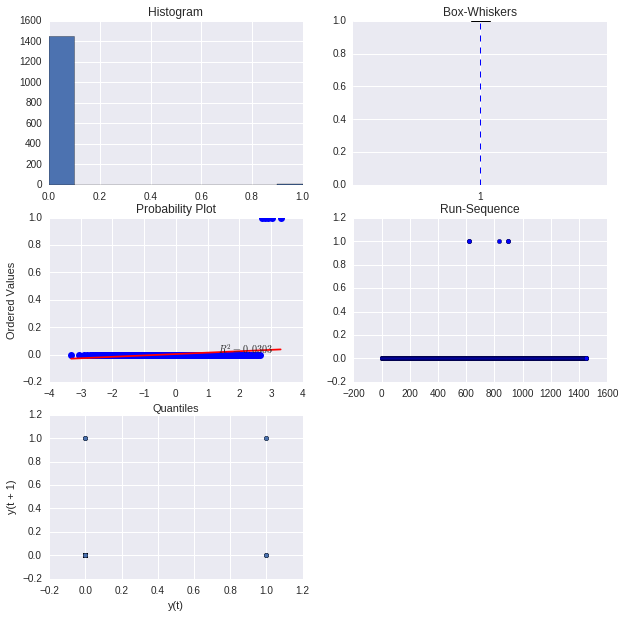

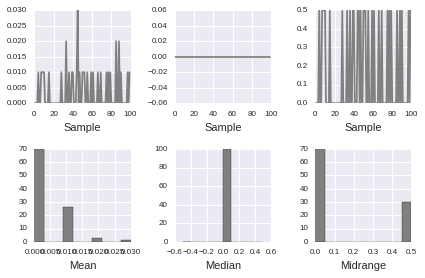

cuban
Skew:  13.361
Skew test:  SkewtestResult(statistic=44.789520526582891, pvalue=0.0)
Kurtosis:  176.506
Kurtosis test:  KurtosistestResult(statistic=25.688051393767037, pvalue=1.589658530126193e-145)
 
PPCC_max value:  -0.731


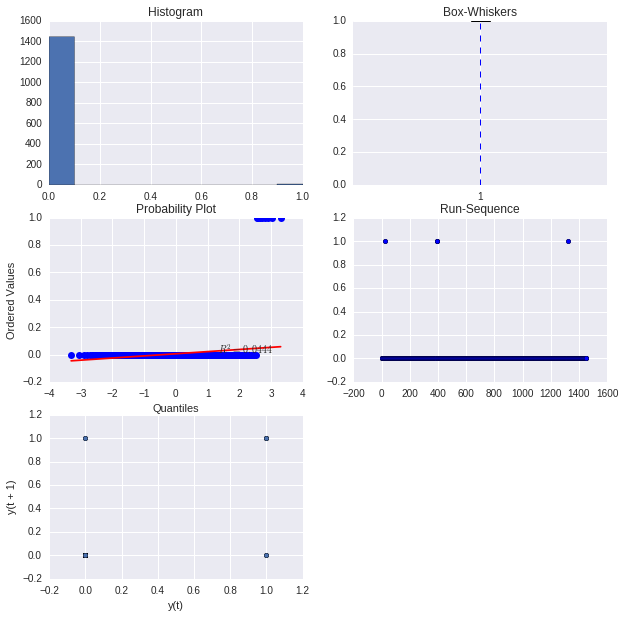

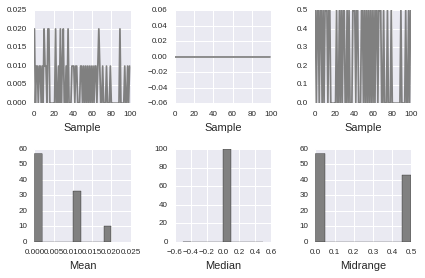

cupcakes
Skew:  26.889
Skew test:  SkewtestResult(statistic=53.778258357470577, pvalue=0.0)
Kurtosis:  721.001
Kurtosis test:  KurtosistestResult(statistic=28.028684727192545, pvalue=7.2670370607999477e-173)
 
PPCC_max value:  -1.216


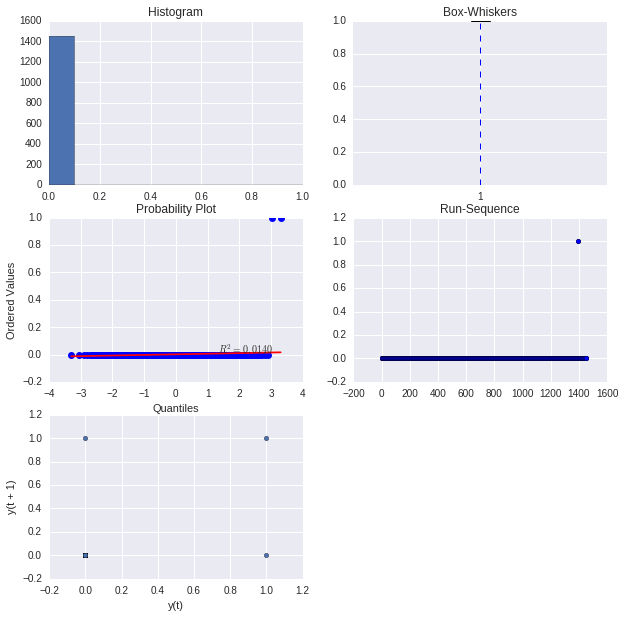

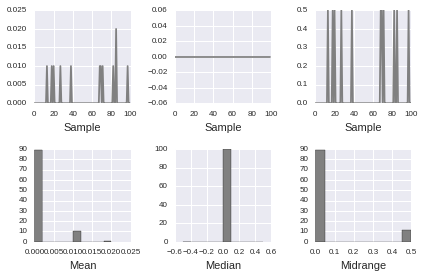

danceclubs
Skew:  13.361
Skew test:  SkewtestResult(statistic=44.789520526582891, pvalue=0.0)
Kurtosis:  176.506
Kurtosis test:  KurtosistestResult(statistic=25.68805139376704, pvalue=1.589658530126193e-145)
 
PPCC_max value:  -0.731


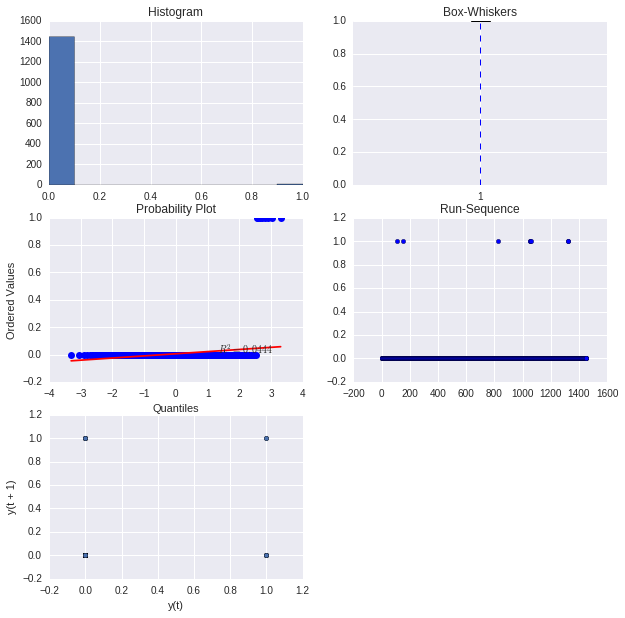

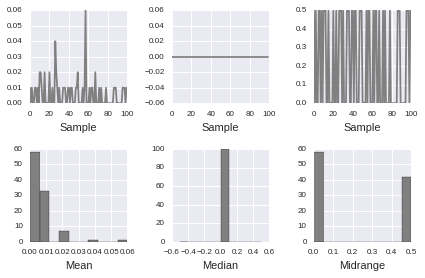

delis
Skew:  4.841
Skew test:  SkewtestResult(statistic=31.80970634480159, pvalue=4.7523208322880856e-222)
Kurtosis:  21.439
Kurtosis test:  KurtosistestResult(statistic=19.520777432278198, pvalue=7.3117241545109395e-85)
 
PPCC_max value:  32.208


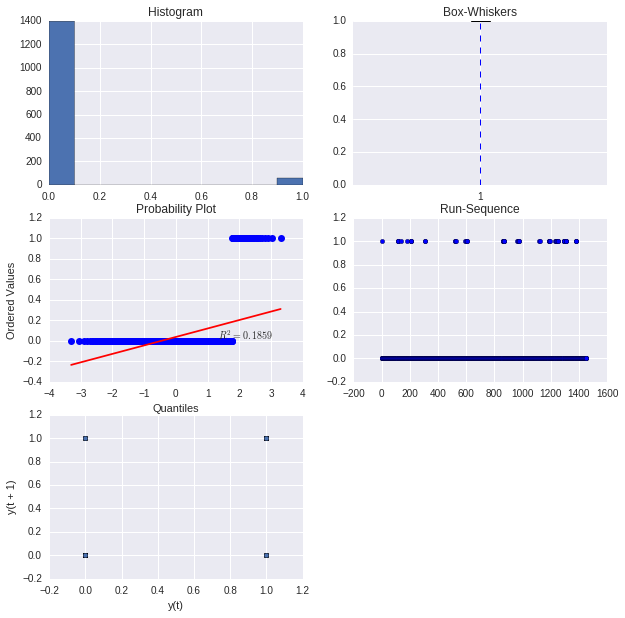

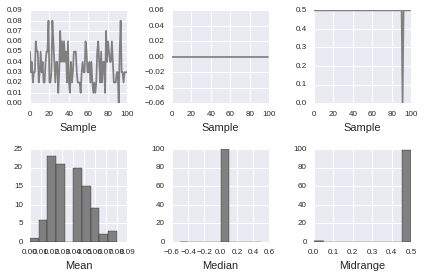

desserts
Skew:  13.361
Skew test:  SkewtestResult(statistic=44.789520526582891, pvalue=0.0)
Kurtosis:  176.506
Kurtosis test:  KurtosistestResult(statistic=25.68805139376704, pvalue=1.589658530126193e-145)
 
PPCC_max value:  -0.731


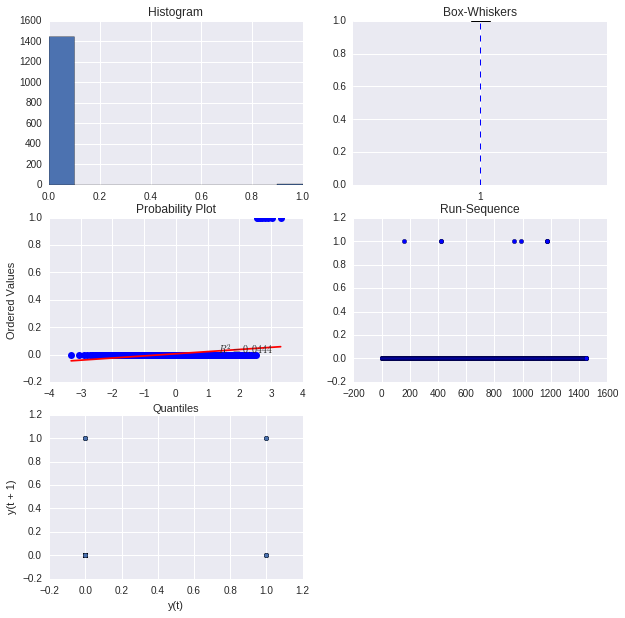

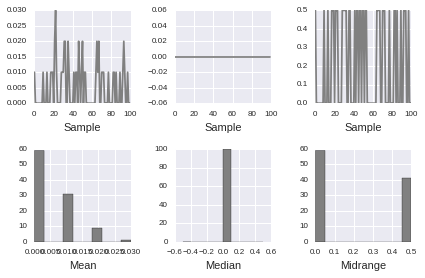

diners
Skew:  11.925
Skew test:  SkewtestResult(statistic=43.330253588574671, pvalue=0.0)
Kurtosis:  140.207
Kurtosis test:  KurtosistestResult(statistic=25.192262091256339, pvalue=4.8694482229527365e-140)
 
PPCC_max value:  182.239


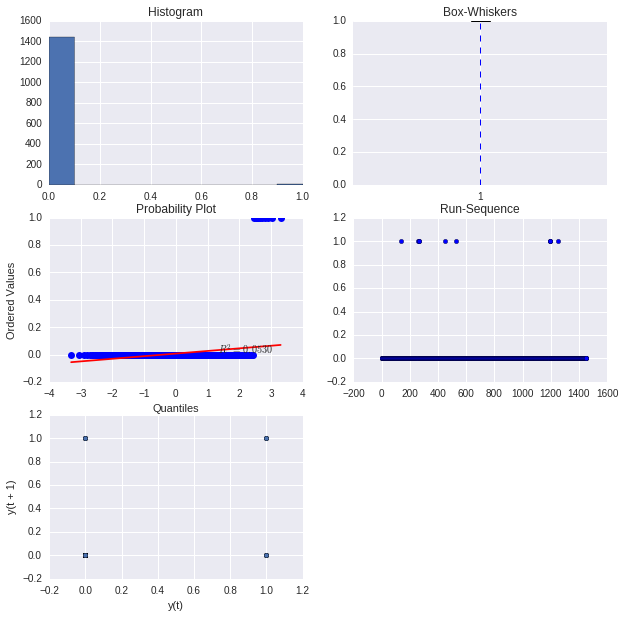

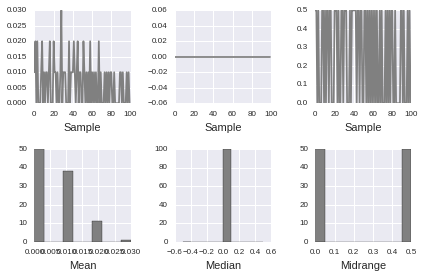

discountstore
Skew:  15.46
Skew test:  SkewtestResult(statistic=46.663876030081937, pvalue=0.0)
Kurtosis:  237.004
Kurtosis test:  KurtosistestResult(statistic=26.271169477564548, pvalue=4.0961770202206691e-152)
 
PPCC_max value:  -0.795


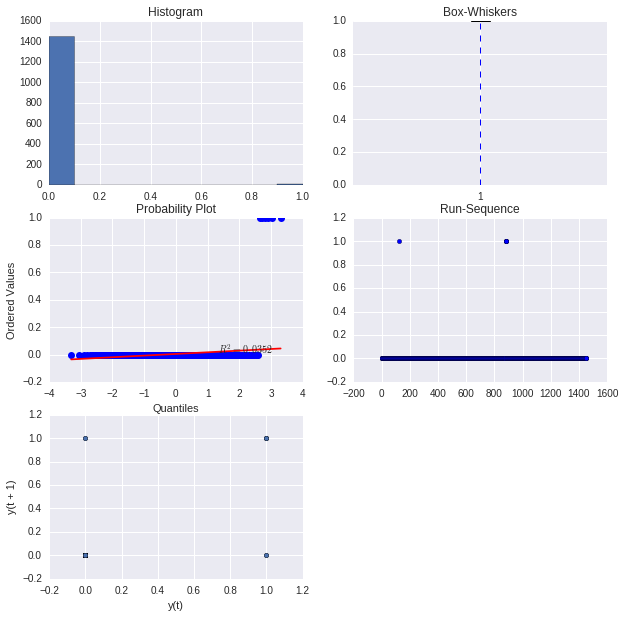

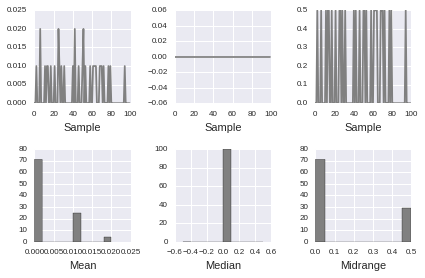

divebars
Skew:  14.298
Skew test:  SkewtestResult(statistic=45.660388120051465, pvalue=0.0)
Kurtosis:  202.433
Kurtosis test:  KurtosistestResult(statistic=25.966167376749382, pvalue=1.1943548534879895e-148)
 
PPCC_max value:  -0.759


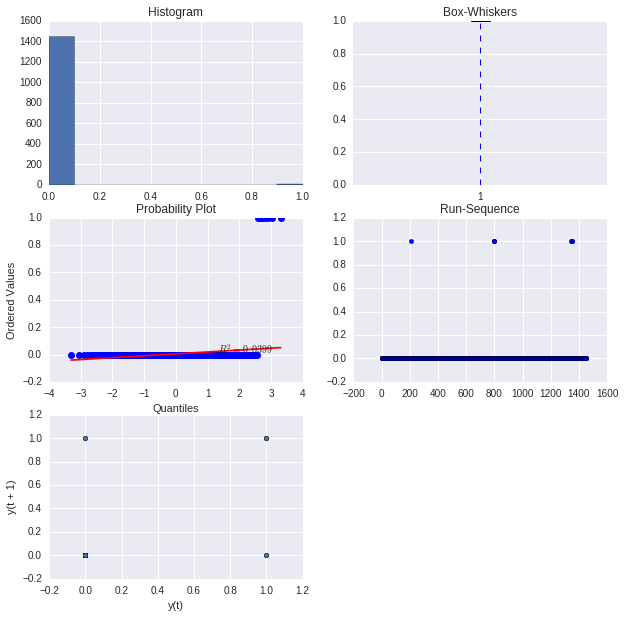

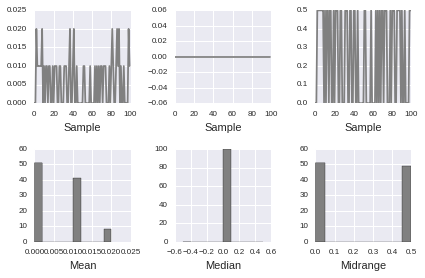

donuts
Skew:  8.343
Skew test:  SkewtestResult(statistic=38.751190933341171, pvalue=0.0)
Kurtosis:  67.614
Kurtosis test:  KurtosistestResult(statistic=23.359342831102264, pvalue=1.1075492656809312e-120)
 
PPCC_max value:  90.354


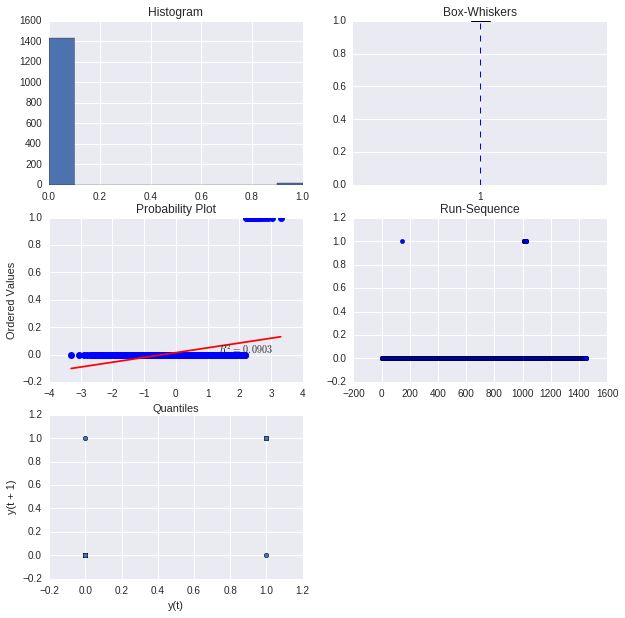

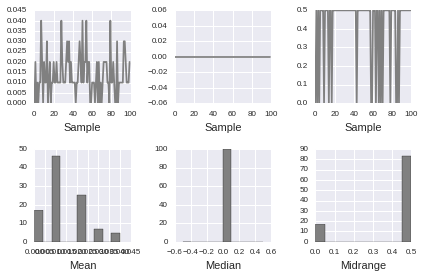

drugstores
Skew:  15.46
Skew test:  SkewtestResult(statistic=46.663876030081937, pvalue=0.0)
Kurtosis:  237.004
Kurtosis test:  KurtosistestResult(statistic=26.271169477564545, pvalue=4.0961770202213677e-152)
 
PPCC_max value:  -0.795


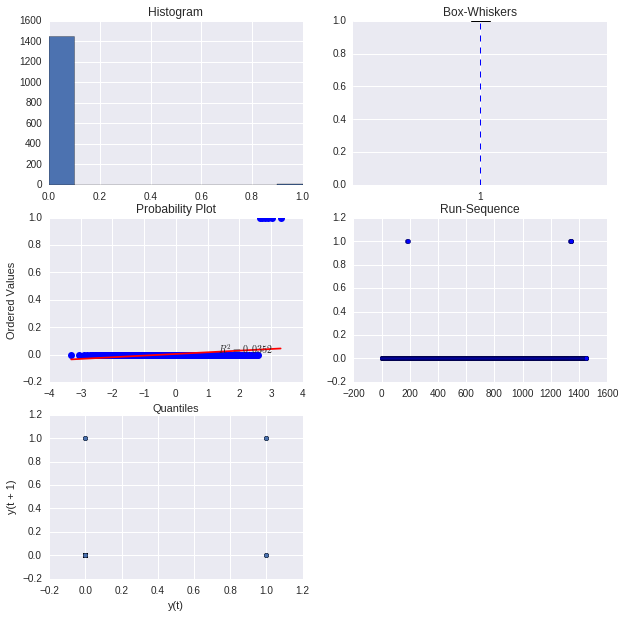

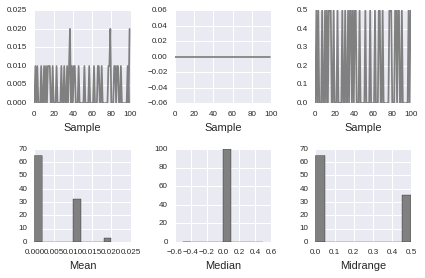

ethiopian
Skew:  6.991
Skew test:  SkewtestResult(statistic=36.489367478090486, pvalue=1.6351436739931916e-291)
Kurtosis:  46.877
Kurtosis test:  KurtosistestResult(statistic=22.270515934241512, pvalue=7.1374750261231345e-110)
 
PPCC_max value:  64.229


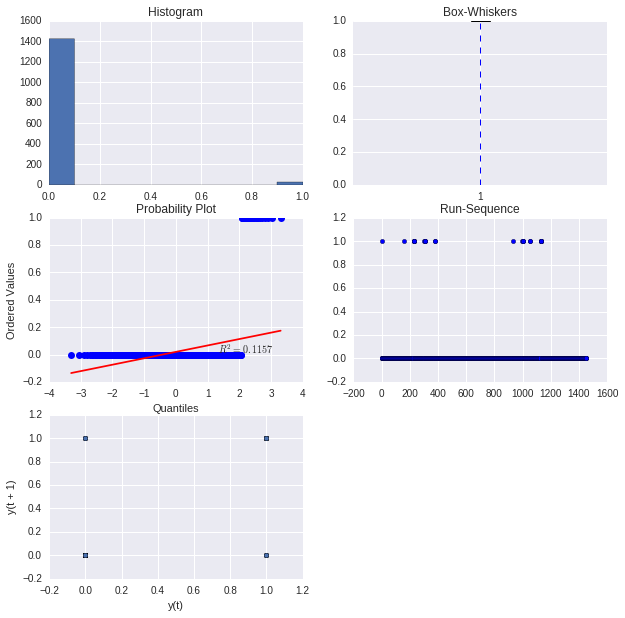

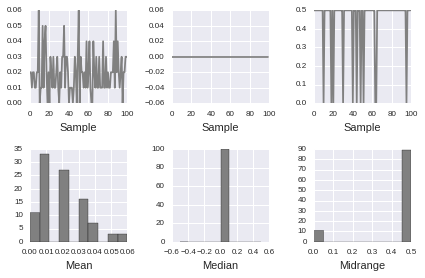

ethnicmarkets
Skew:  16.953
Skew test:  SkewtestResult(statistic=47.848560876508216, pvalue=0.0)
Kurtosis:  285.403
Kurtosis test:  KurtosistestResult(statistic=26.61109827498429, pvalue=5.0504225781327444e-156)
 
PPCC_max value:  -0.84


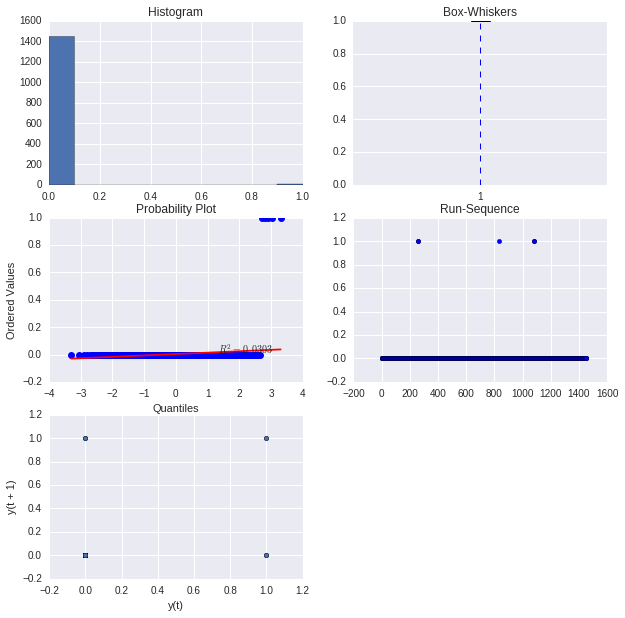

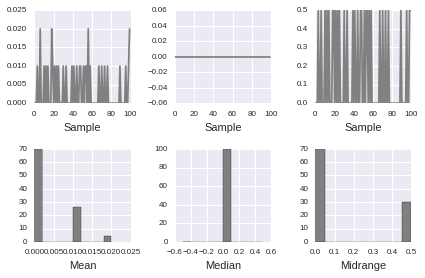

falafel
Skew:  18.974
Skew test:  SkewtestResult(statistic=49.295822655407314, pvalue=0.0)
Kurtosis:  358.003
Kurtosis test:  KurtosistestResult(statistic=26.998667165863147, pvalue=1.5321231532828017e-160)
 
PPCC_max value:  -0.903


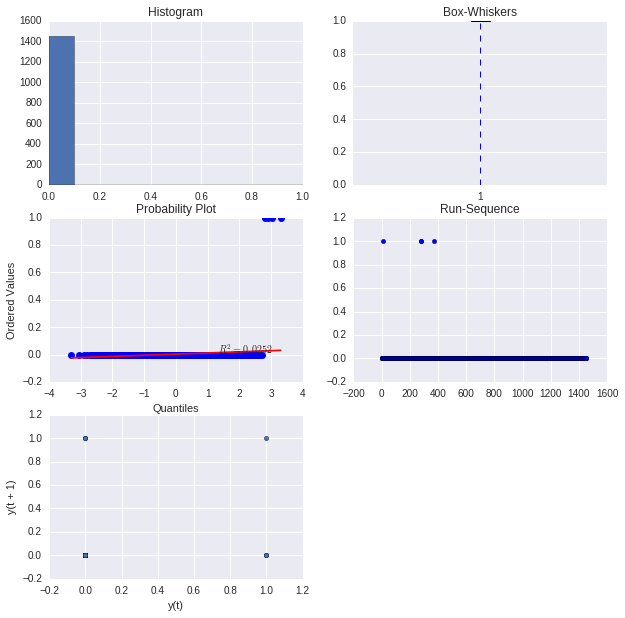

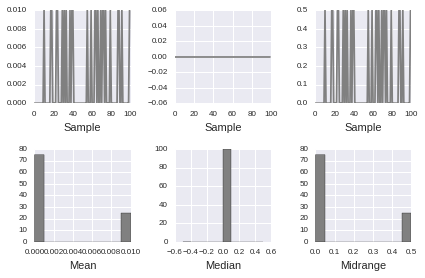

foodtrucks
Skew:  18.974
Skew test:  SkewtestResult(statistic=49.295822655407321, pvalue=0.0)
Kurtosis:  358.003
Kurtosis test:  KurtosistestResult(statistic=26.998667165863147, pvalue=1.5321231532828017e-160)
 
PPCC_max value:  -0.903


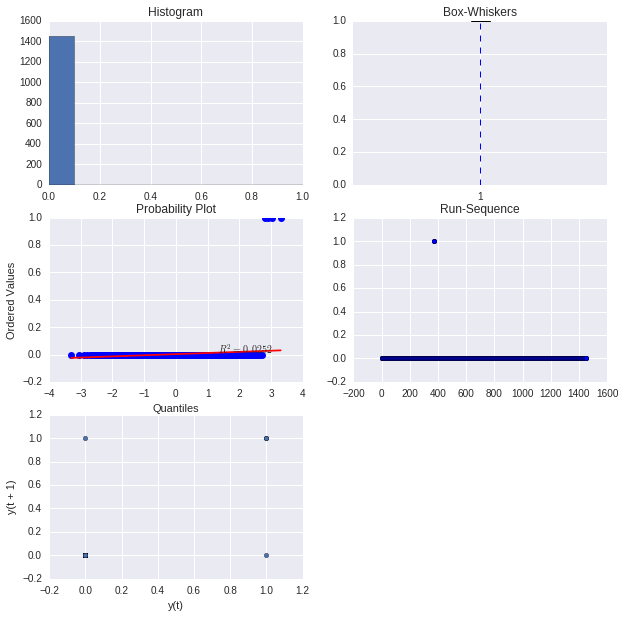

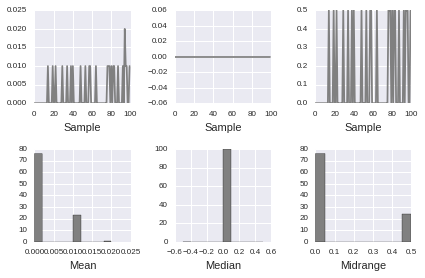

french
Skew:  6.022
Skew test:  SkewtestResult(statistic=34.585628564174854, pvalue=4.1552762880735832e-262)
Kurtosis:  34.269
Kurtosis test:  KurtosistestResult(statistic=21.240883781575924, pvalue=4.0028793747003848e-100)
 
PPCC_max value:  48.358


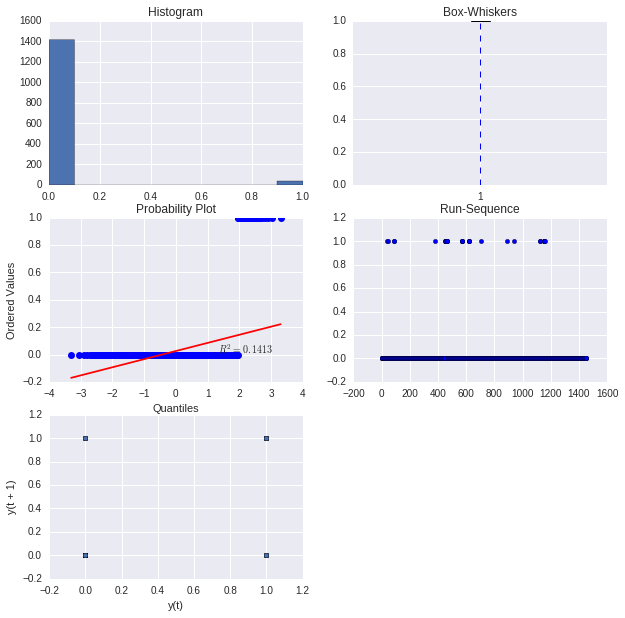

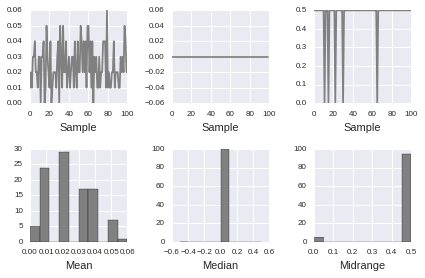

gastropubs
Skew:  16.953
Skew test:  SkewtestResult(statistic=47.848560876508216, pvalue=0.0)
Kurtosis:  285.403
Kurtosis test:  KurtosistestResult(statistic=26.61109827498429, pvalue=5.0504225781327444e-156)
 
PPCC_max value:  -0.84


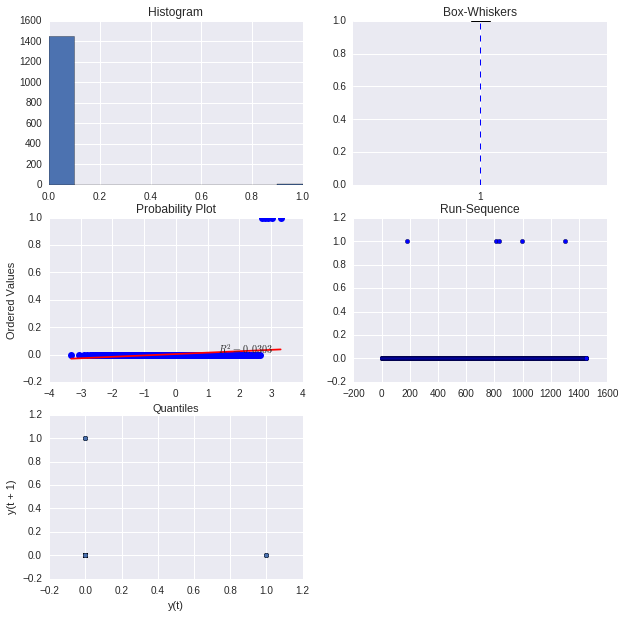

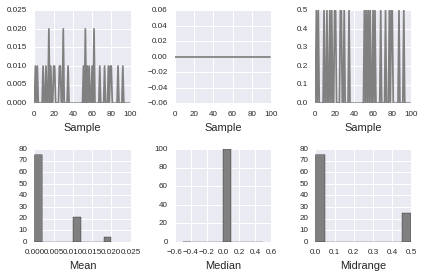

gelato
Skew:  15.46
Skew test:  SkewtestResult(statistic=46.66387603008193, pvalue=0.0)
Kurtosis:  237.004
Kurtosis test:  KurtosistestResult(statistic=26.271169477564545, pvalue=4.0961770202213677e-152)
 
PPCC_max value:  -0.795


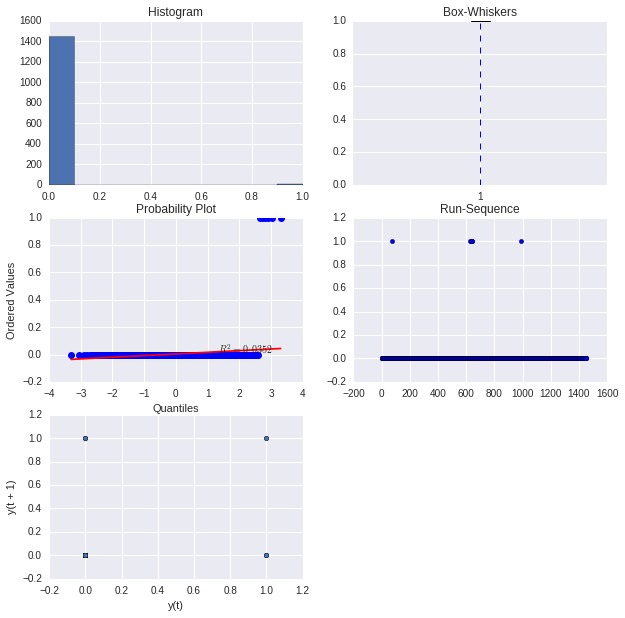

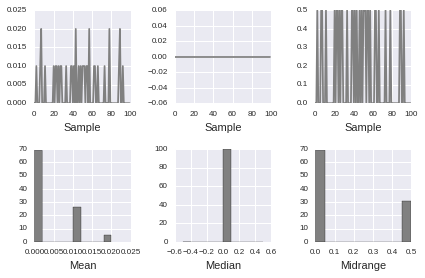

german
Skew:  13.361
Skew test:  SkewtestResult(statistic=44.789520526582891, pvalue=0.0)
Kurtosis:  176.506
Kurtosis test:  KurtosistestResult(statistic=25.68805139376704, pvalue=1.589658530126193e-145)
 
PPCC_max value:  -0.731


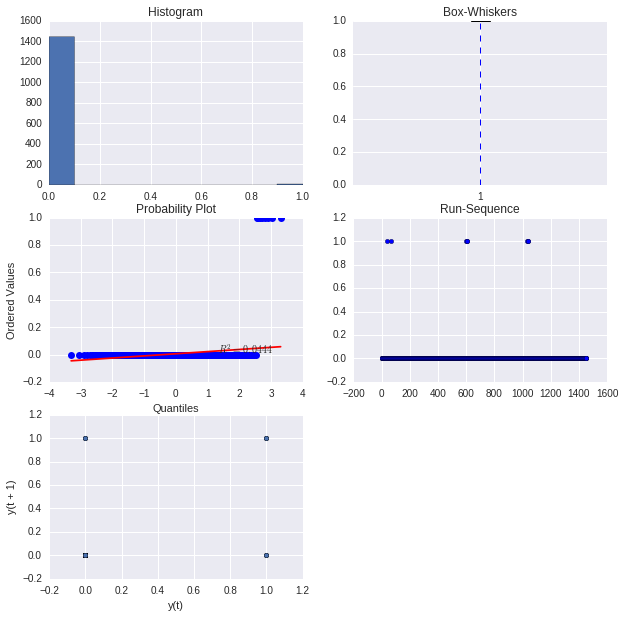

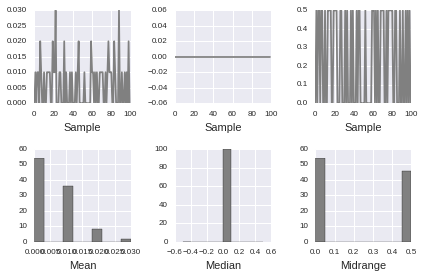

gluten_free
Skew:  8.569
Skew test:  SkewtestResult(statistic=39.093245261583718, pvalue=0.0)
Kurtosis:  71.434
Kurtosis test:  KurtosistestResult(statistic=23.512510167102118, pvalue=3.0379697490038464e-122)
 
PPCC_max value:  95.172


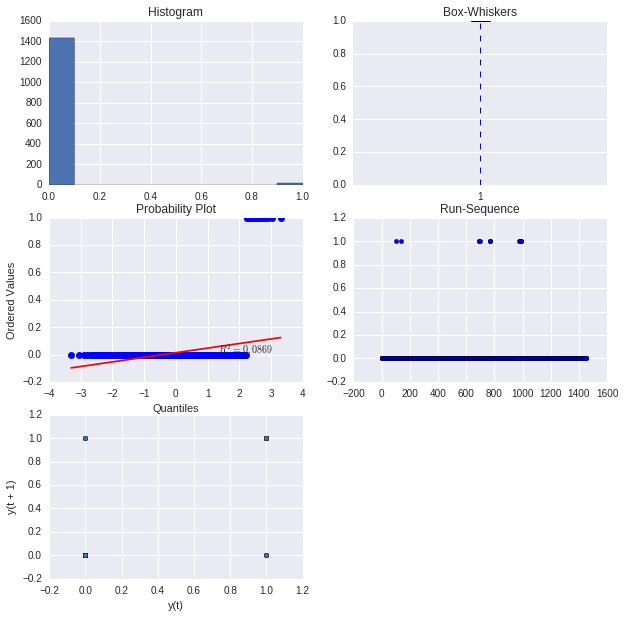

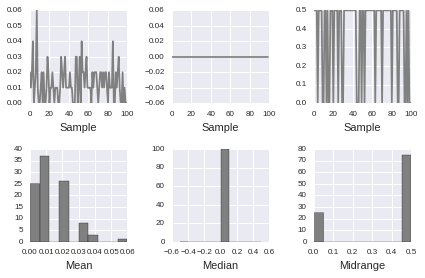

golf
Skew:  26.889
Skew test:  SkewtestResult(statistic=53.778258357470577, pvalue=0.0)
Kurtosis:  721.001
Kurtosis test:  KurtosistestResult(statistic=28.028684727192545, pvalue=7.2670370607999477e-173)
 
PPCC_max value:  -1.216


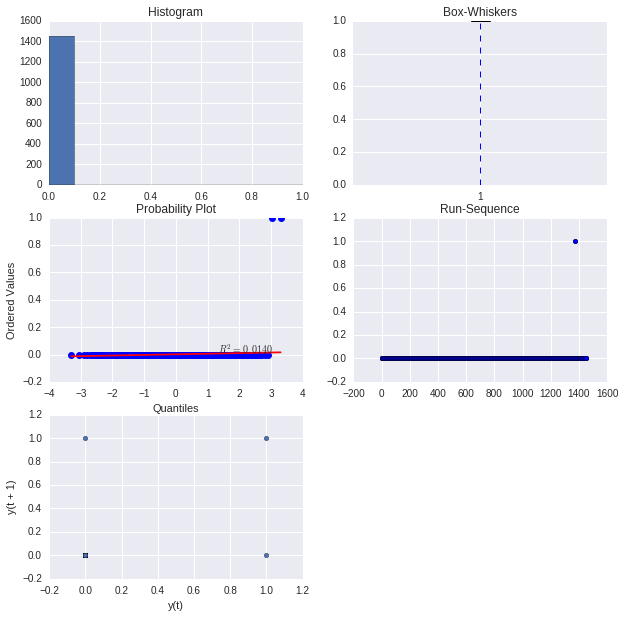

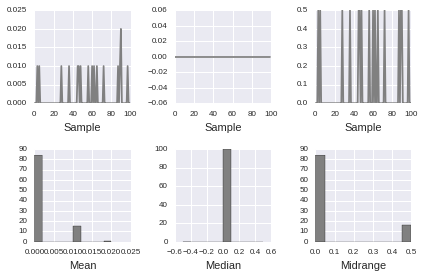

gourmet
Skew:  12.583
Skew test:  SkewtestResult(statistic=44.019940321121972, pvalue=0.0)
Kurtosis:  156.34
Kurtosis test:  KurtosistestResult(statistic=25.431375863695152, pvalue=1.1346551374068767e-142)
 
PPCC_max value:  202.788


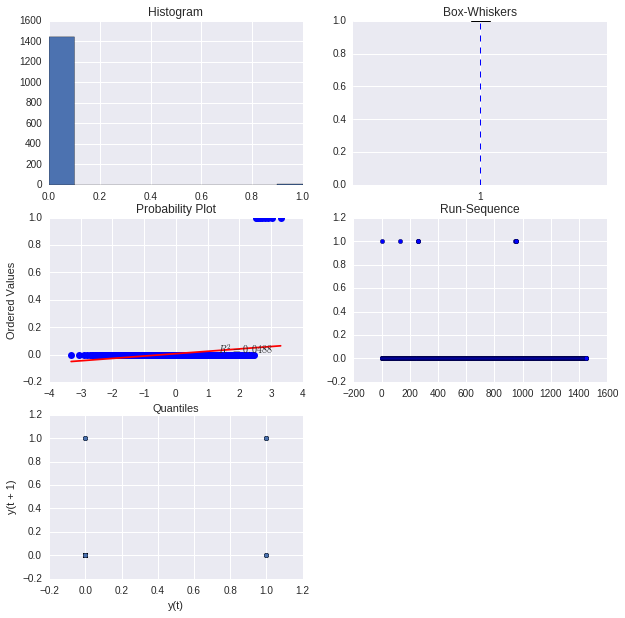

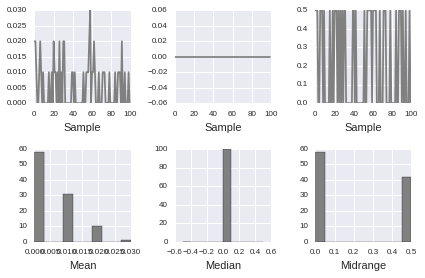

greek
Skew:  7.423
Skew test:  SkewtestResult(statistic=37.255026496633349, pvalue=8.7852239117850198e-304)
Kurtosis:  53.098
Kurtosis test:  KurtosistestResult(statistic=22.654480064613679, pvalue=1.2602296532875511e-113)
 
PPCC_max value:  72.062


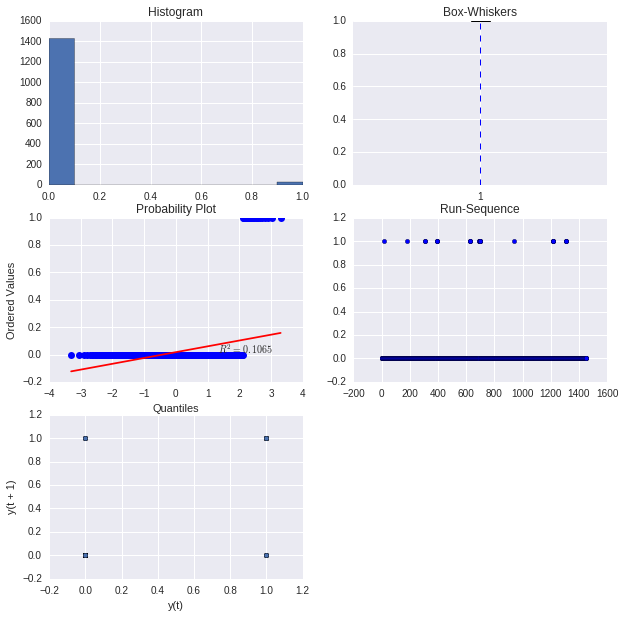

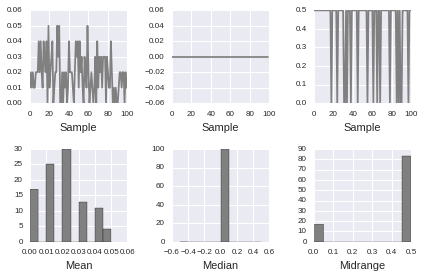

grocery
Skew:  7.584
Skew test:  SkewtestResult(statistic=37.529805222918768, pvalue=3.0084743954592337e-308)
Kurtosis:  55.517
Kurtosis test:  KurtosistestResult(statistic=22.788335525694752, pvalue=5.9847290427346467e-115)
 
PPCC_max value:  75.11


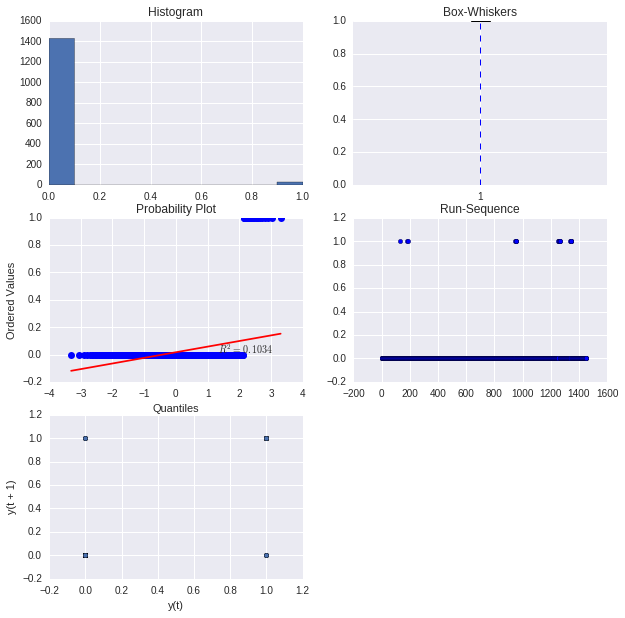

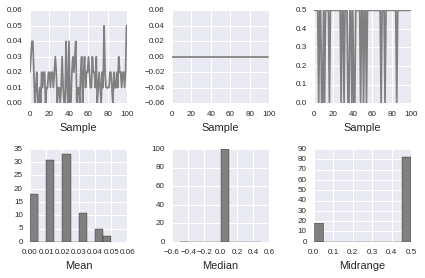

gyms
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002235, pvalue=5.8797450630935724e-166)
 
PPCC_max value:  -1.003


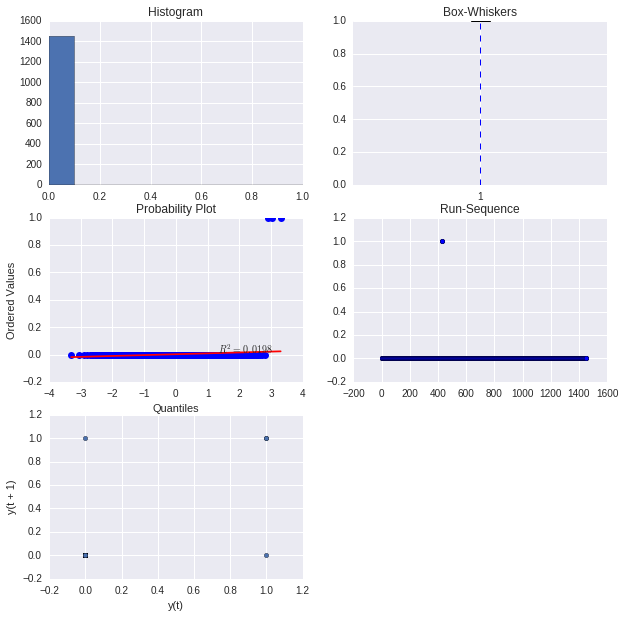

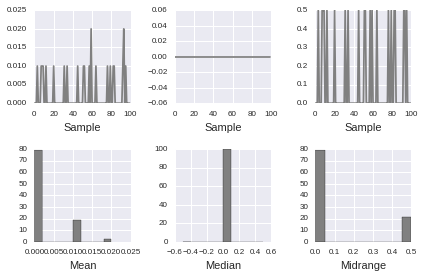

halal
Skew:  10.036
Skew test:  SkewtestResult(statistic=41.117925363896482, pvalue=0.0)
Kurtosis:  98.724
Kurtosis test:  KurtosistestResult(statistic=24.363038165309668, pvalue=4.2177281679864677e-131)
 
PPCC_max value:  129.633


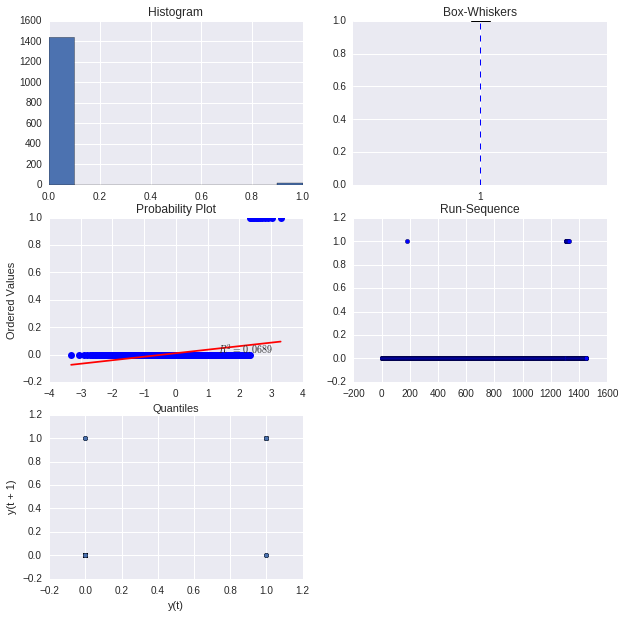

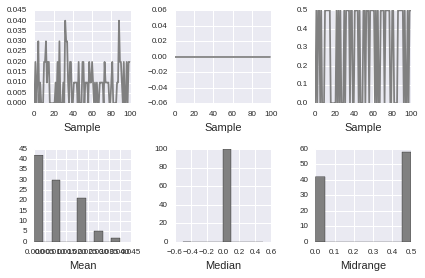

healthtrainers
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002235, pvalue=5.8797450630935724e-166)
 
PPCC_max value:  -1.003


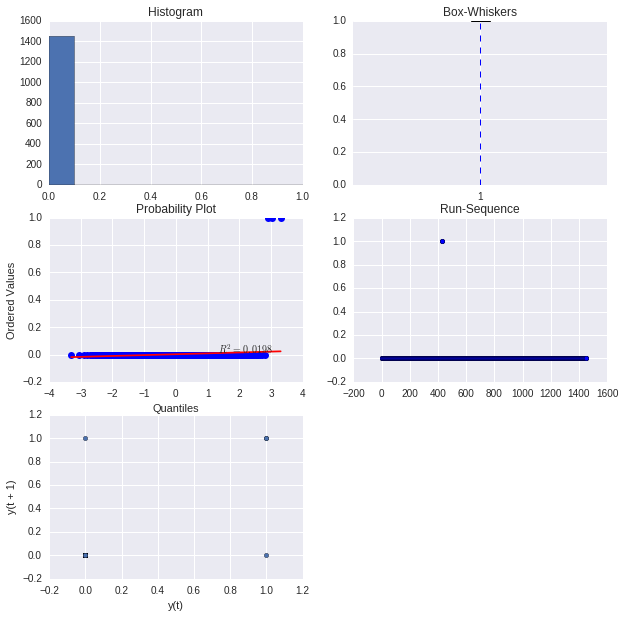

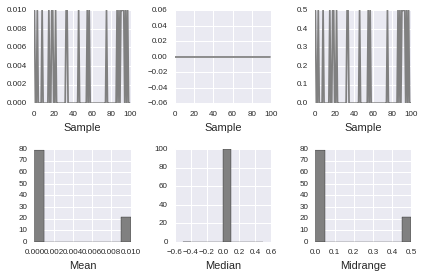

hookah_bars
Skew:  13.361
Skew test:  SkewtestResult(statistic=44.789520526582891, pvalue=0.0)
Kurtosis:  176.506
Kurtosis test:  KurtosistestResult(statistic=25.688051393767037, pvalue=1.589658530126193e-145)
 
PPCC_max value:  -0.731


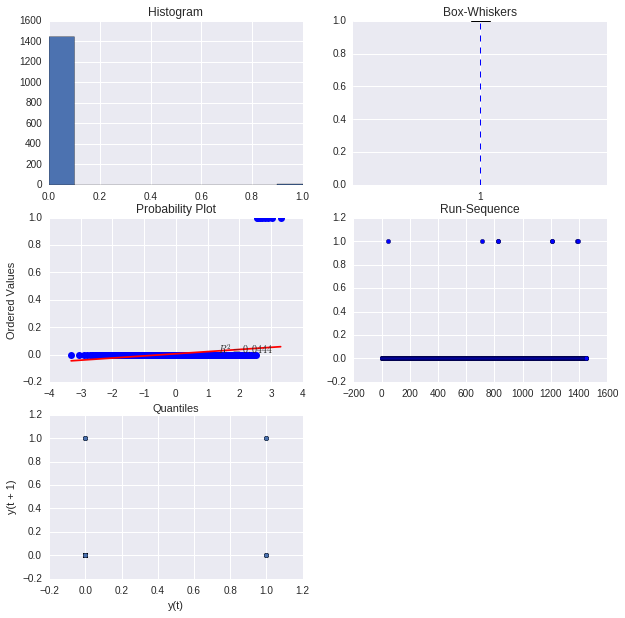

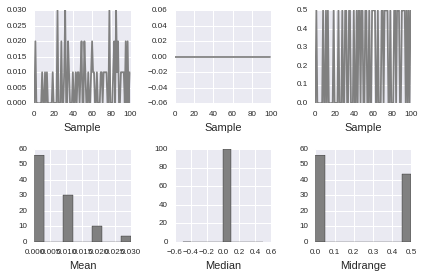

hotdog
Skew:  10.863
Skew test:  SkewtestResult(statistic=42.133515284117699, pvalue=0.0)
Kurtosis:  116.008
Kurtosis test:  KurtosistestResult(statistic=24.755913034803385, pvalue=2.677521715520975e-135)
 
PPCC_max value:  151.515


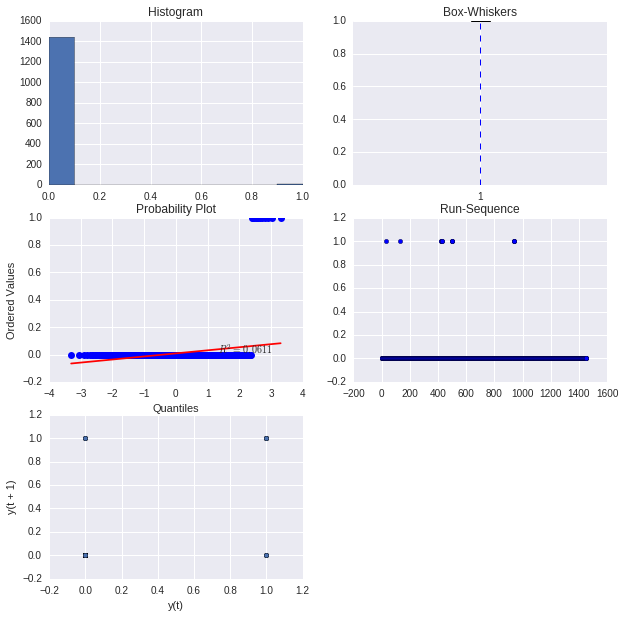

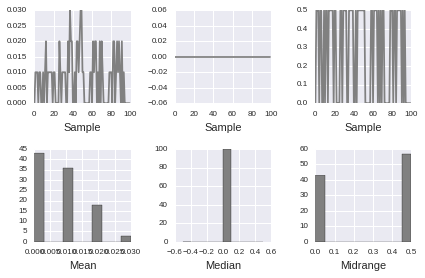

hotdogs
Skew:  4.02
Skew test:  SkewtestResult(statistic=29.458514369572441, pvalue=9.7942449595517974e-191)
Kurtosis:  14.16
Kurtosis test:  KurtosistestResult(statistic=17.819165412819764, pvalue=5.0179560863830674e-71)
 
PPCC_max value:  23.037


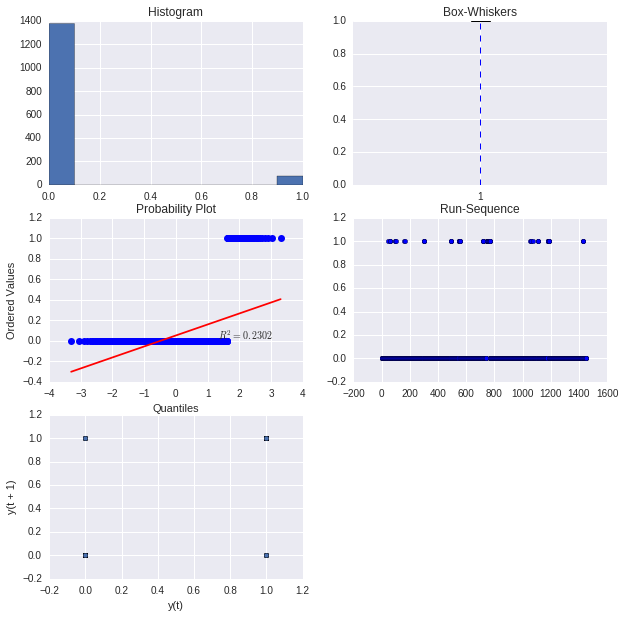

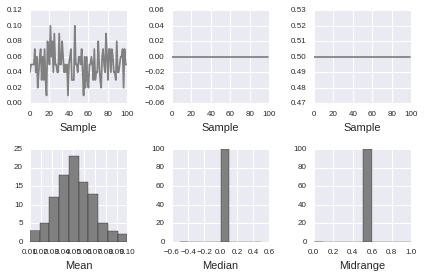

hotels
Skew:  6.303
Skew test:  SkewtestResult(statistic=35.166666588040627, pvalue=6.4665565601530363e-271)
Kurtosis:  37.73
Kurtosis test:  KurtosistestResult(statistic=21.56702820149372, pvalue=3.6649560973838832e-103)
 
PPCC_max value:  52.714


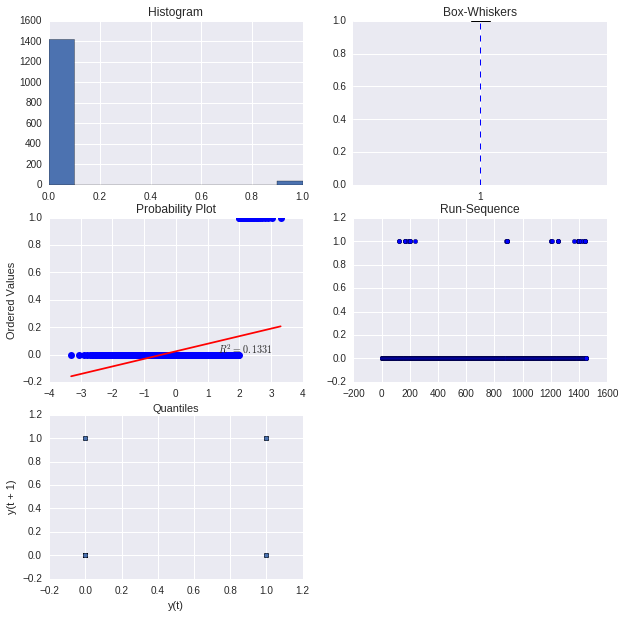

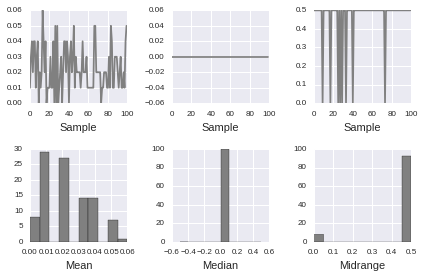

icecream
Skew:  12.583
Skew test:  SkewtestResult(statistic=44.019940321121972, pvalue=0.0)
Kurtosis:  156.34
Kurtosis test:  KurtosistestResult(statistic=25.431375863695152, pvalue=1.1346551374068767e-142)
 
PPCC_max value:  202.788


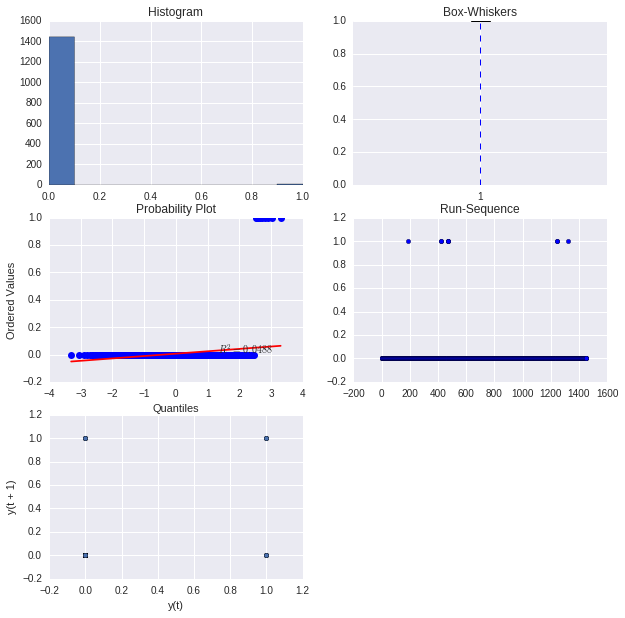

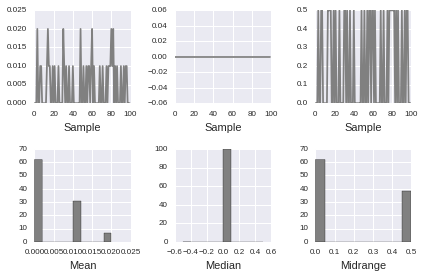

indpak
Skew:  7.938
Skew test:  SkewtestResult(statistic=38.113839472286891, pvalue=0.0)
Kurtosis:  61.015
Kurtosis test:  KurtosistestResult(statistic=23.066169982427553, pvalue=1.0124041806907222e-117)
 
PPCC_max value:  82.037


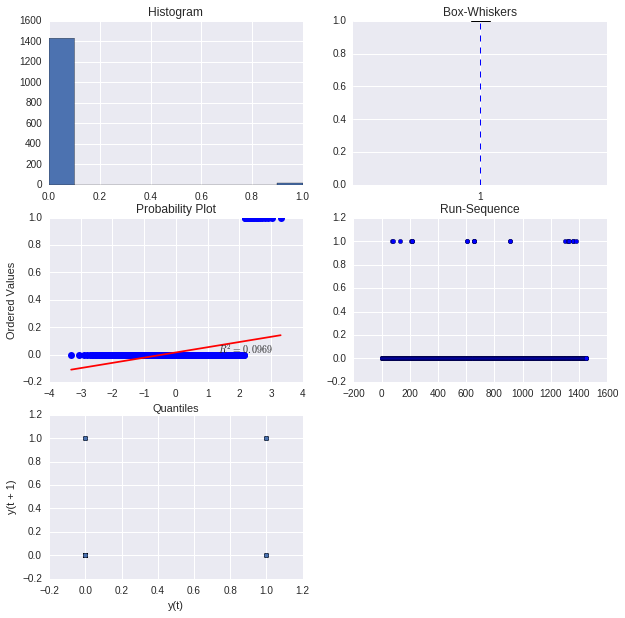

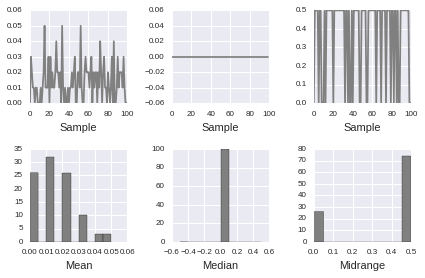

irish
Skew:  16.953
Skew test:  SkewtestResult(statistic=47.848560876508216, pvalue=0.0)
Kurtosis:  285.403
Kurtosis test:  KurtosistestResult(statistic=26.61109827498429, pvalue=5.0504225781327444e-156)
 
PPCC_max value:  -0.84


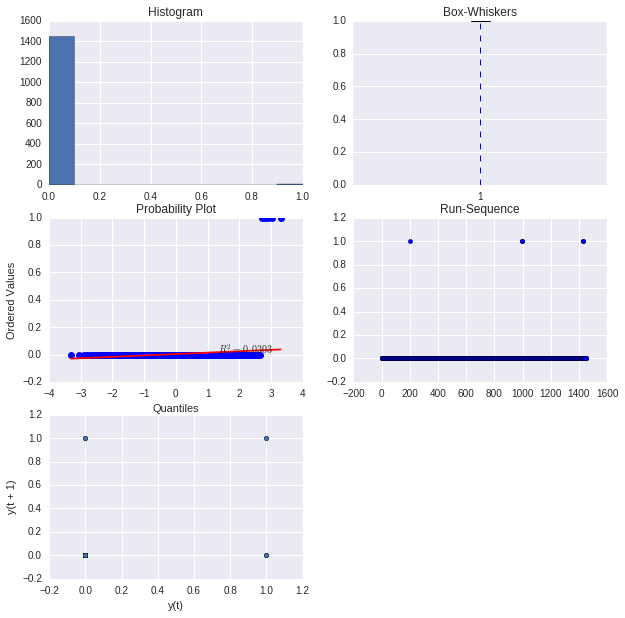

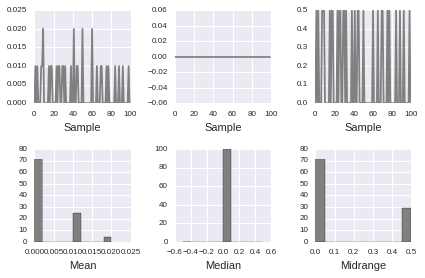

irish_pubs
Skew:  26.889
Skew test:  SkewtestResult(statistic=53.778258357470577, pvalue=0.0)
Kurtosis:  721.001
Kurtosis test:  KurtosistestResult(statistic=28.028684727192545, pvalue=7.2670370607999477e-173)
 
PPCC_max value:  -1.216


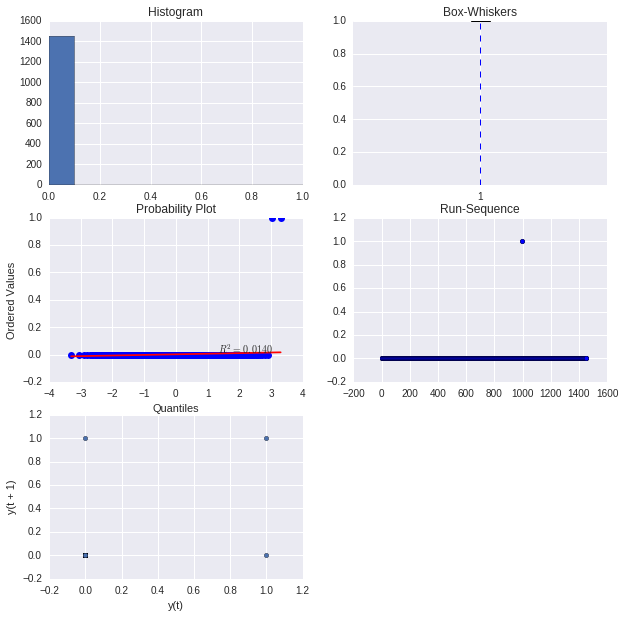

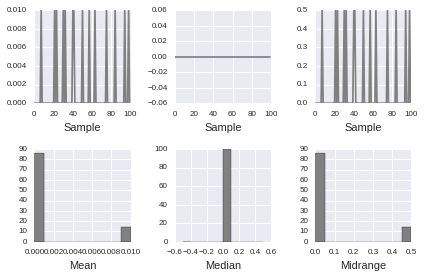

italian
Skew:  3.871
Skew test:  SkewtestResult(statistic=28.982961656493273, pvalue=1.078895143696023e-184)
Kurtosis:  12.985
Kurtosis test:  KurtosistestResult(statistic=17.44292121011518, pvalue=3.8963910843209343e-68)
 
PPCC_max value:  21.555


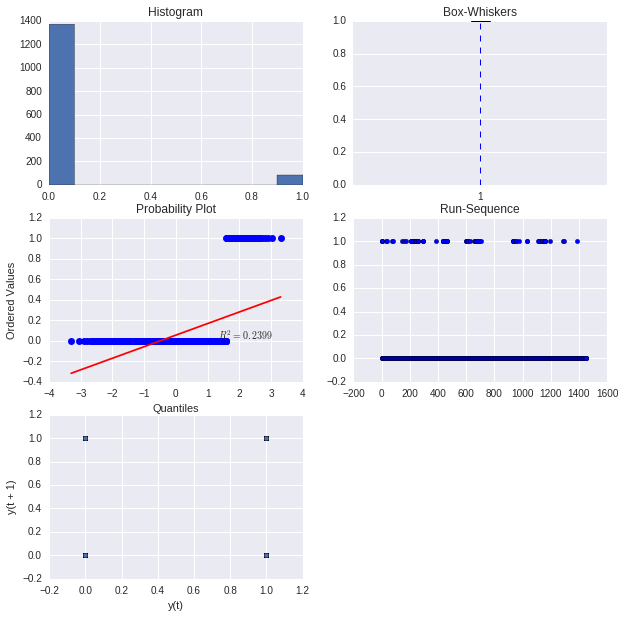

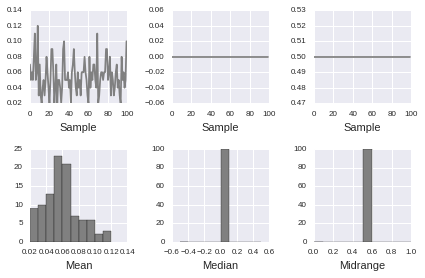

japanese
Skew:  13.361
Skew test:  SkewtestResult(statistic=44.789520526582891, pvalue=0.0)
Kurtosis:  176.506
Kurtosis test:  KurtosistestResult(statistic=25.68805139376704, pvalue=1.589658530126193e-145)
 
PPCC_max value:  -0.731


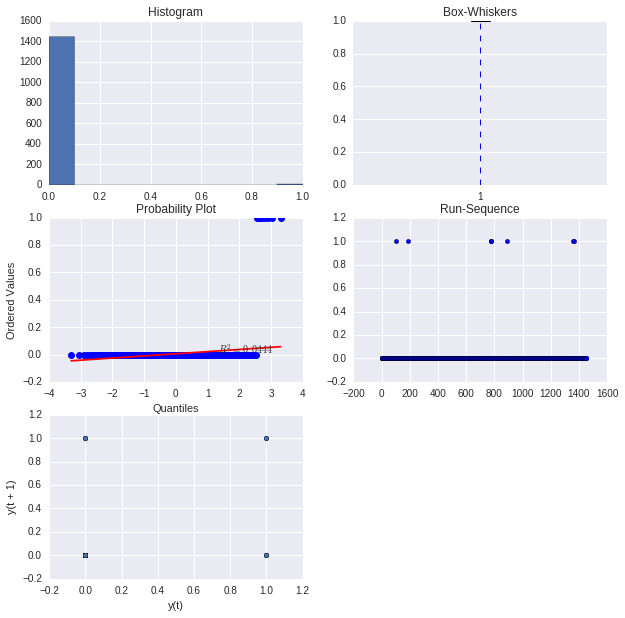

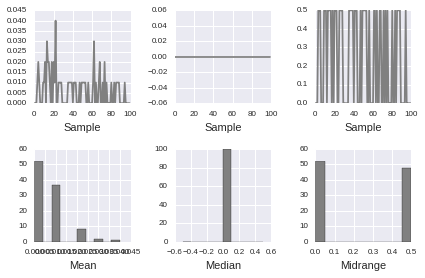

jazzandblues
Skew:  14.298
Skew test:  SkewtestResult(statistic=45.660388120051472, pvalue=0.0)
Kurtosis:  202.433
Kurtosis test:  KurtosistestResult(statistic=25.966167376749382, pvalue=1.1943548534879895e-148)
 
PPCC_max value:  -0.759


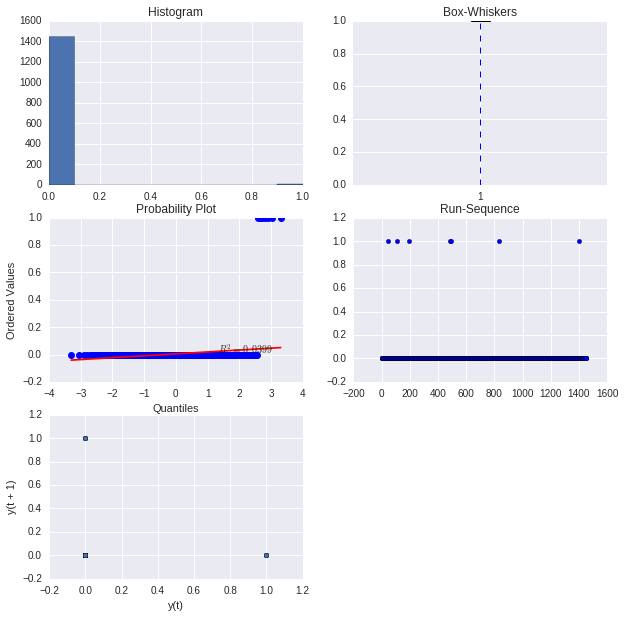

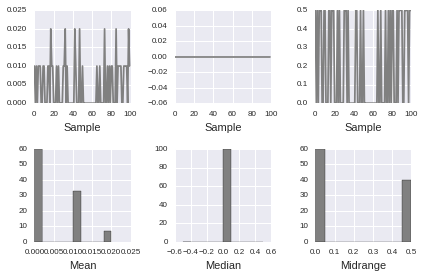

juicebars
Skew:  14.298
Skew test:  SkewtestResult(statistic=45.660388120051465, pvalue=0.0)
Kurtosis:  202.433
Kurtosis test:  KurtosistestResult(statistic=25.966167376749382, pvalue=1.1943548534879895e-148)
 
PPCC_max value:  -0.759


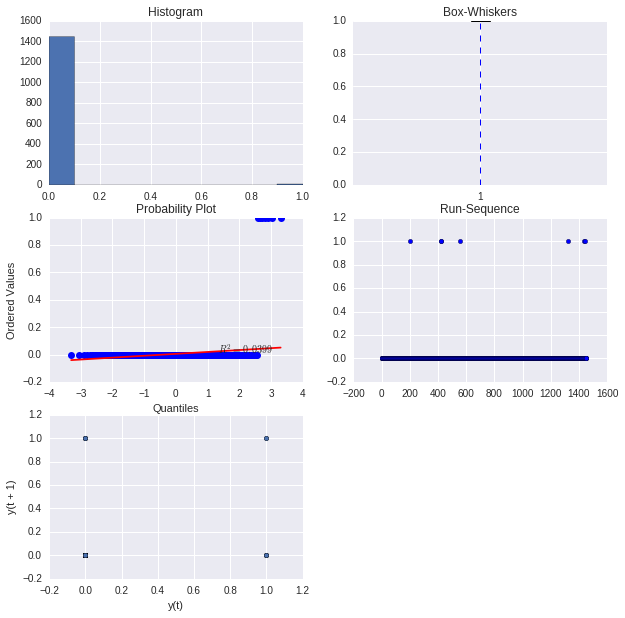

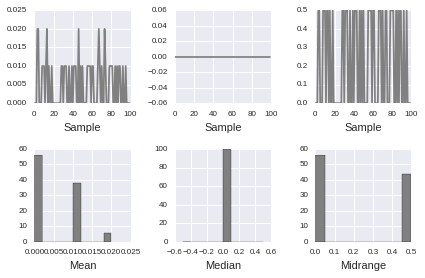

korean
Skew:  13.361
Skew test:  SkewtestResult(statistic=44.789520526582891, pvalue=0.0)
Kurtosis:  176.506
Kurtosis test:  KurtosistestResult(statistic=25.688051393767037, pvalue=1.589658530126193e-145)
 
PPCC_max value:  -0.731


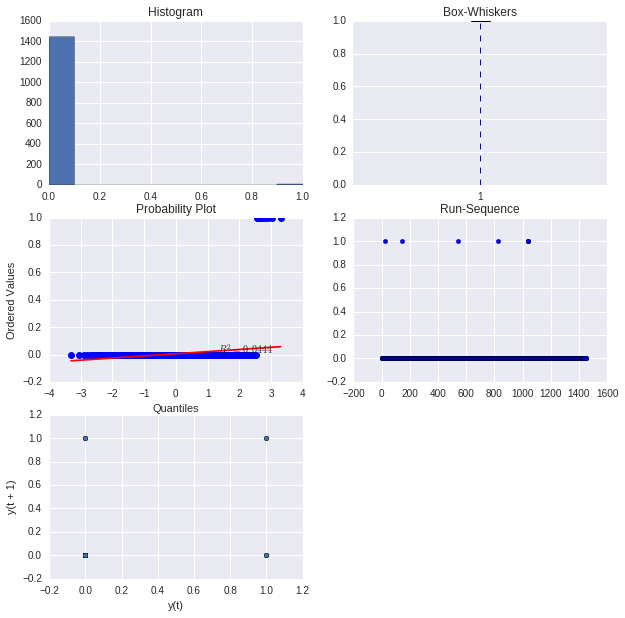

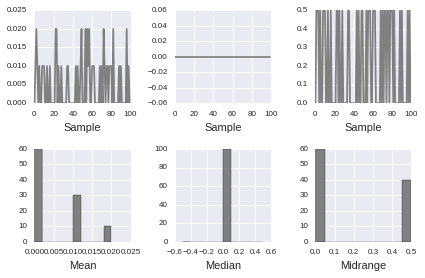

landmarks
Skew:  16.953
Skew test:  SkewtestResult(statistic=47.848560876508216, pvalue=0.0)
Kurtosis:  285.403
Kurtosis test:  KurtosistestResult(statistic=26.61109827498429, pvalue=5.0504225781327444e-156)
 
PPCC_max value:  -0.84


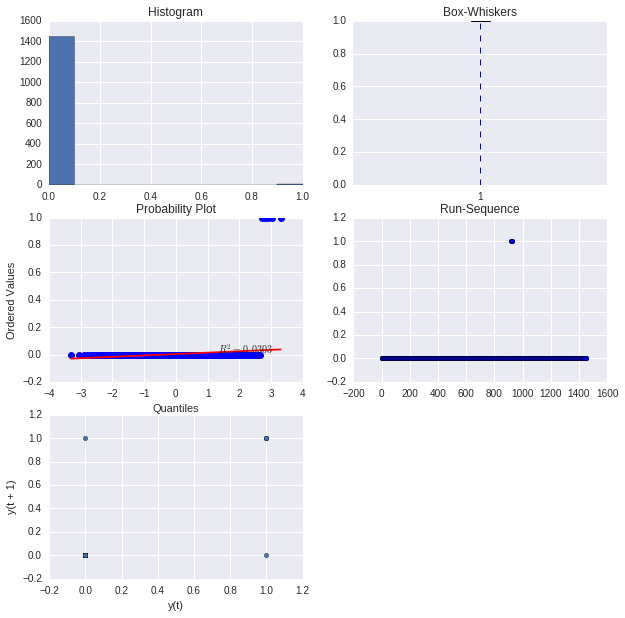

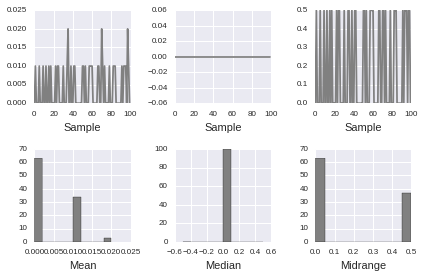

latin
Skew:  5.164
Skew test:  SkewtestResult(statistic=32.628695838362582, pvalue=1.6072264969495679e-233)
Kurtosis:  24.668
Kurtosis test:  KurtosistestResult(statistic=20.05797825539479, pvalue=1.719337040762032e-89)
 
PPCC_max value:  36.272


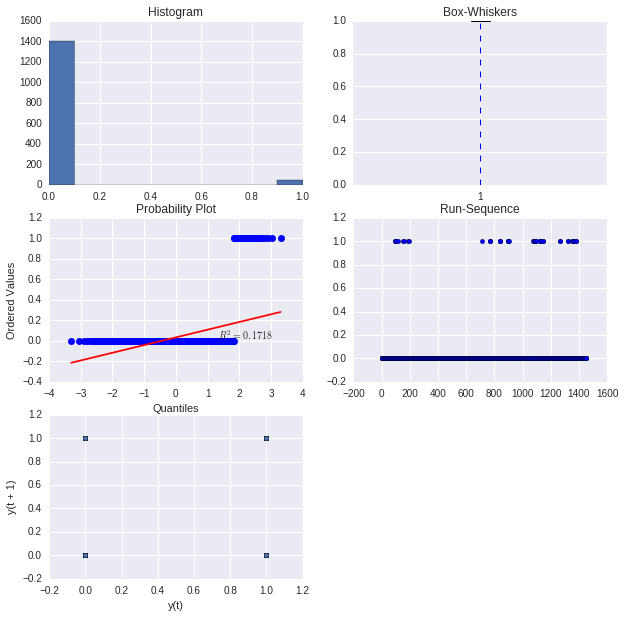

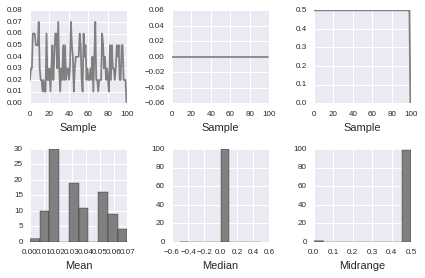

lawyers
Skew:  15.46
Skew test:  SkewtestResult(statistic=46.663876030081937, pvalue=0.0)
Kurtosis:  237.004
Kurtosis test:  KurtosistestResult(statistic=26.271169477564545, pvalue=4.0961770202213677e-152)
 
PPCC_max value:  -0.795


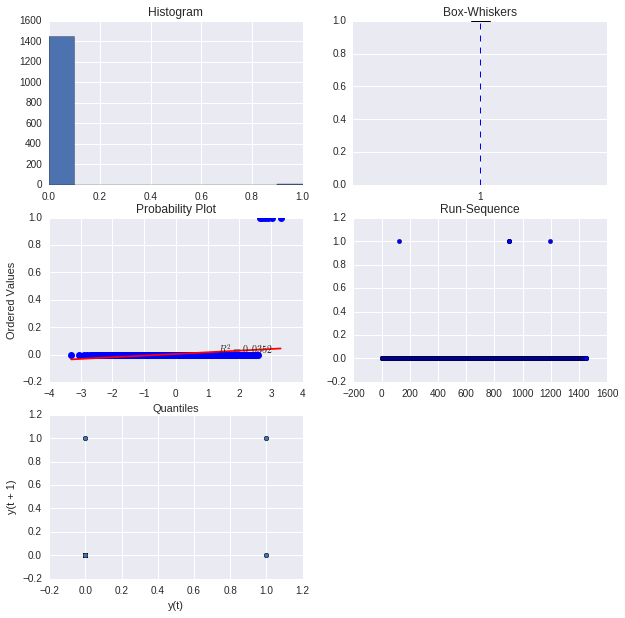

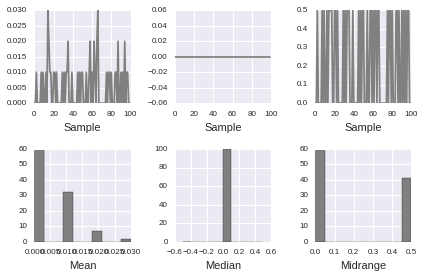

lebanese
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002239, pvalue=5.8797450630929049e-166)
 
PPCC_max value:  -1.003


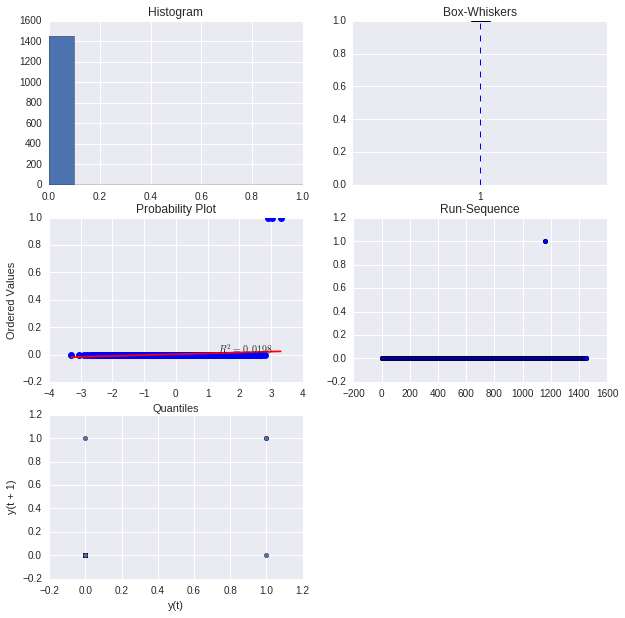

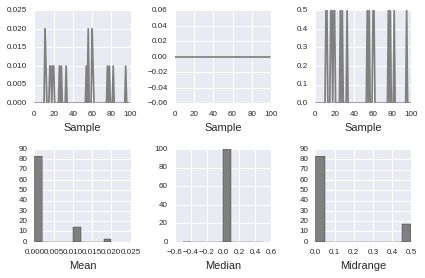

libraries
Skew:  26.889
Skew test:  SkewtestResult(statistic=53.778258357470577, pvalue=0.0)
Kurtosis:  721.001
Kurtosis test:  KurtosistestResult(statistic=28.028684727192545, pvalue=7.2670370607999477e-173)
 
PPCC_max value:  -1.216


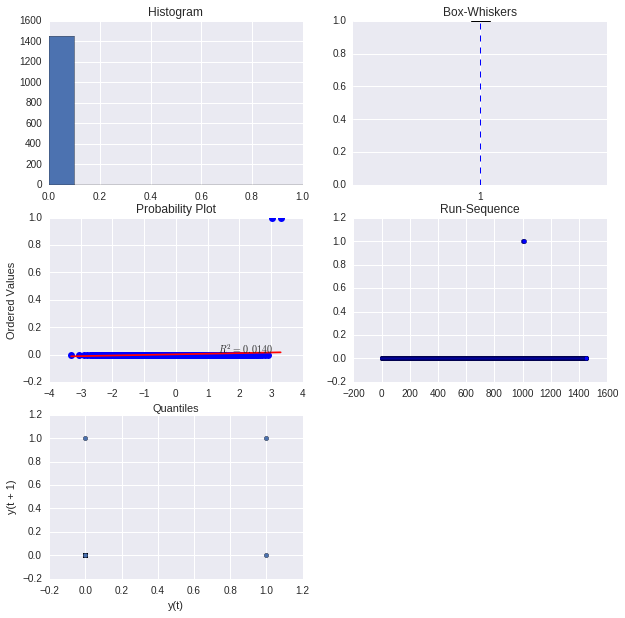

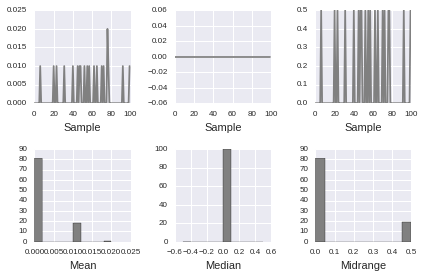

lounges
Skew:  9.079
Skew test:  SkewtestResult(statistic=39.832876640614835, pvalue=0.0)
Kurtosis:  80.424
Kurtosis test:  KurtosistestResult(statistic=23.834094398404456, pvalue=1.4806002770835018e-125)
 
PPCC_max value:  106.513


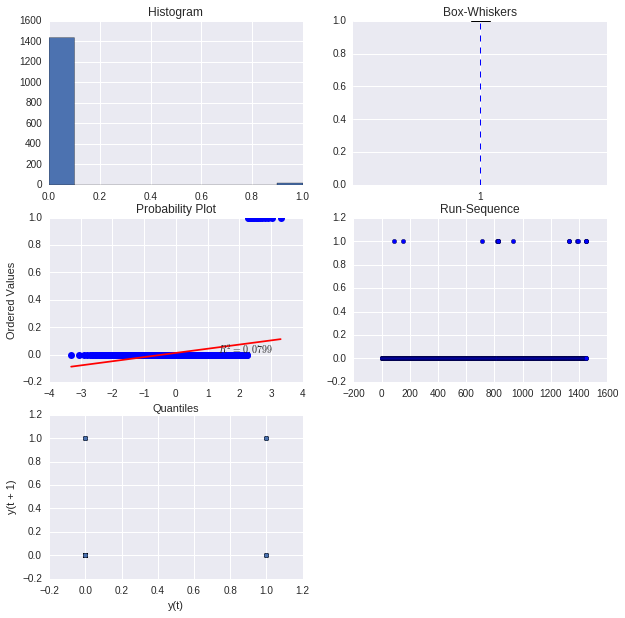

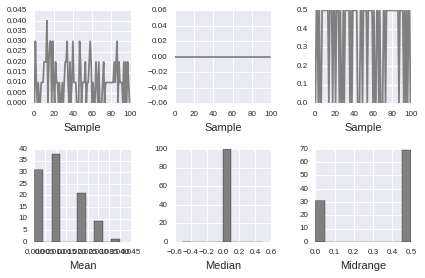

mediterranean
Skew:  5.696
Skew test:  SkewtestResult(statistic=33.875571314115156, pvalue=1.5255231302573323e-251)
Kurtosis:  30.444
Kurtosis test:  KurtosistestResult(statistic=20.827219627424054, pvalue=2.4529365245796534e-96)
 
PPCC_max value:  43.543


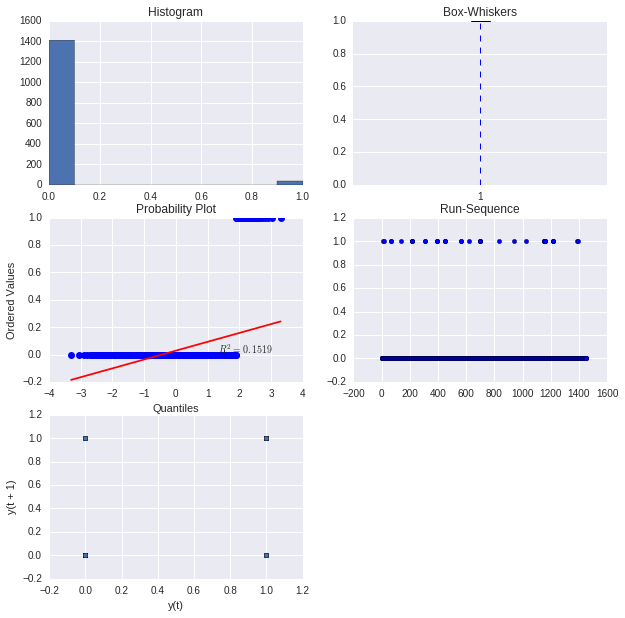

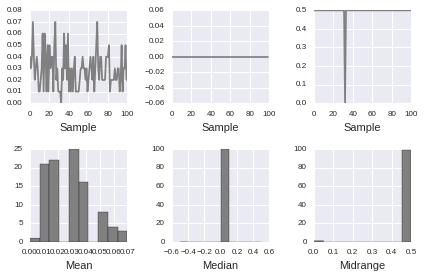

mexican
Skew:  3.225
Skew test:  SkewtestResult(statistic=26.696366958406951, pvalue=5.1869099611760051e-157)
Kurtosis:  8.402
Kurtosis test:  KurtosistestResult(statistic=15.455102793006141, pvalue=6.970030920640683e-54)
 
PPCC_max value:  15.766


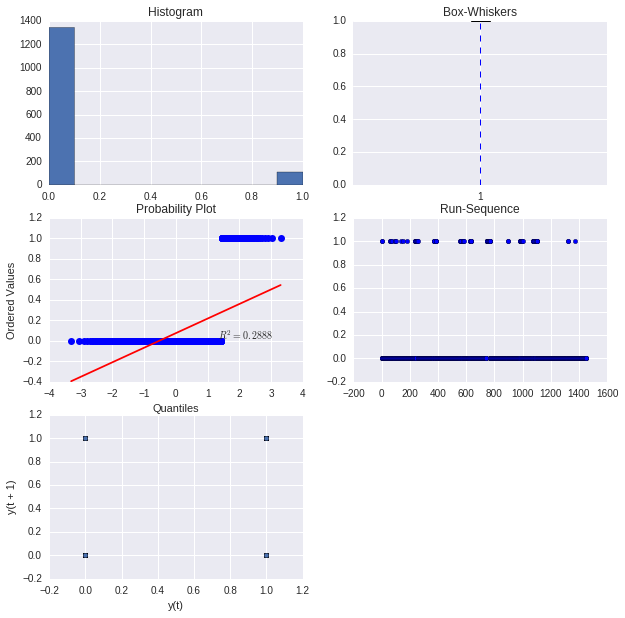

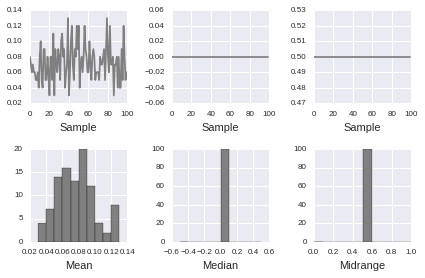

mideastern
Skew:  7.271
Skew test:  SkewtestResult(statistic=36.990531629587963, pvalue=1.6258729168131848e-299)
Kurtosis:  50.864
Kurtosis test:  KurtosistestResult(statistic=22.523689910285746, pvalue=2.4324678057552007e-112)
 
PPCC_max value:  69.25


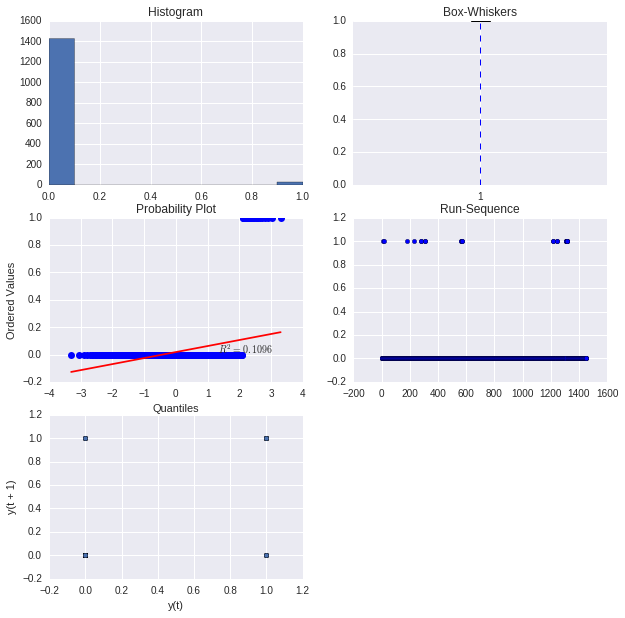

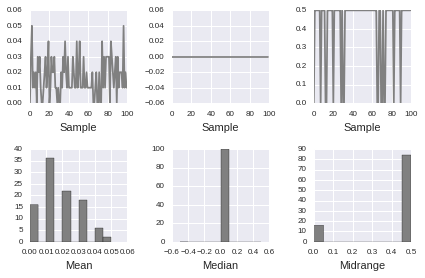

mini_golf
Skew:  18.974
Skew test:  SkewtestResult(statistic=49.295822655407306, pvalue=0.0)
Kurtosis:  358.003
Kurtosis test:  KurtosistestResult(statistic=26.998667165863147, pvalue=1.5321231532828017e-160)
 
PPCC_max value:  -0.903


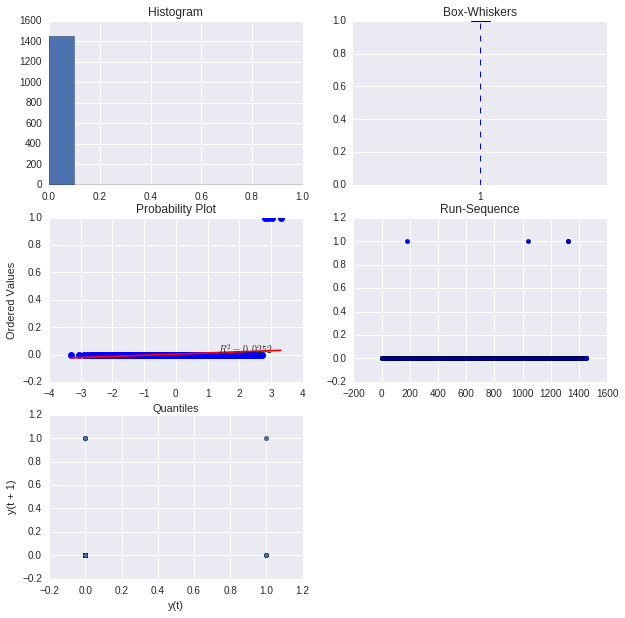

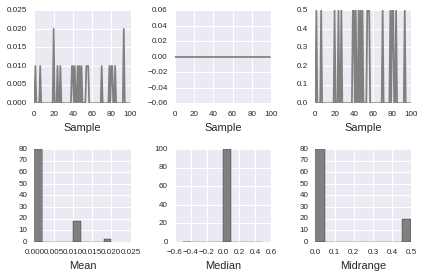

modern_european
Skew:  26.889
Skew test:  SkewtestResult(statistic=53.778258357470577, pvalue=0.0)
Kurtosis:  721.001
Kurtosis test:  KurtosistestResult(statistic=28.028684727192545, pvalue=7.2670370607999477e-173)
 
PPCC_max value:  -1.216


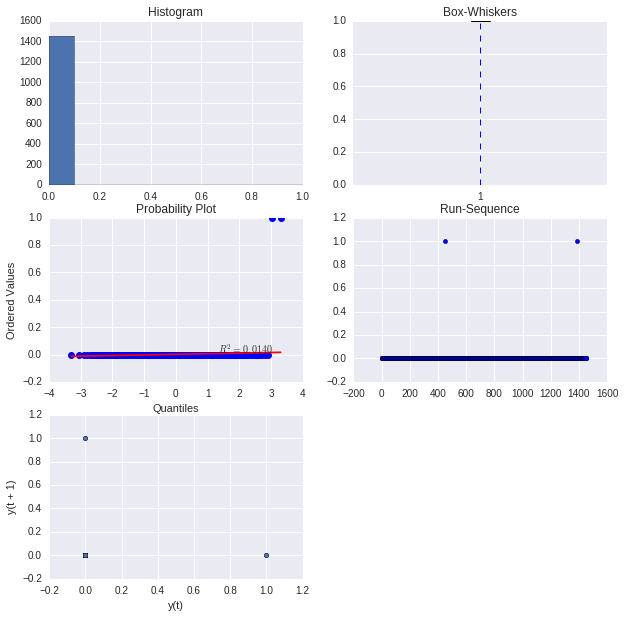

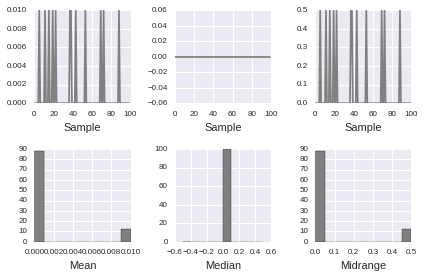

musicvenues
Skew:  11.358
Skew test:  SkewtestResult(statistic=42.705200909681935, pvalue=0.0)
Kurtosis:  127.008
Kurtosis test:  KurtosistestResult(statistic=24.967838526380948, pvalue=1.3671110191749205e-137)
 
PPCC_max value:  165.466


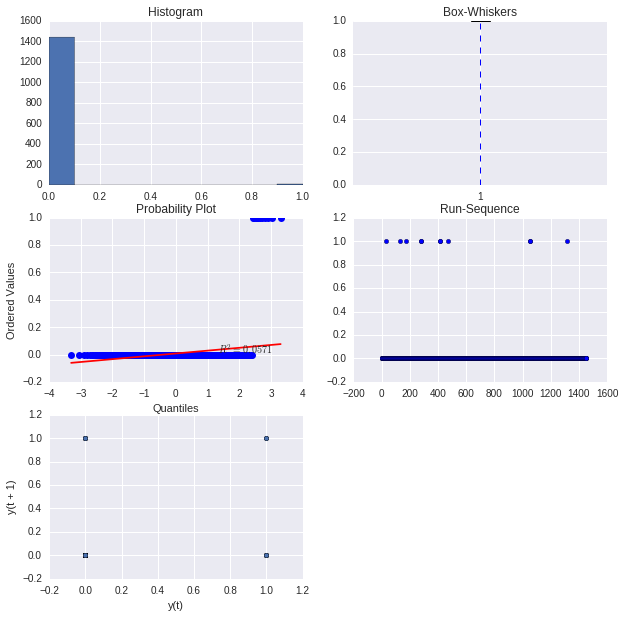

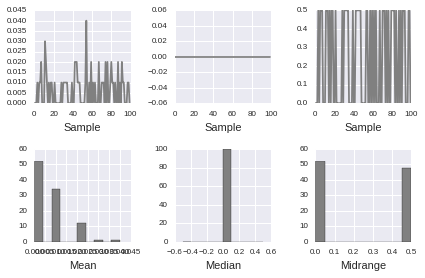

newamerican
Skew:  2.789
Skew test:  SkewtestResult(statistic=24.894524110537208, pvalue=8.5287776364248212e-137)
Kurtosis:  5.78
Kurtosis test:  KurtosistestResult(statistic=13.640189225989127, pvalue=2.3096051548008056e-42)
 
PPCC_max value:  12.441


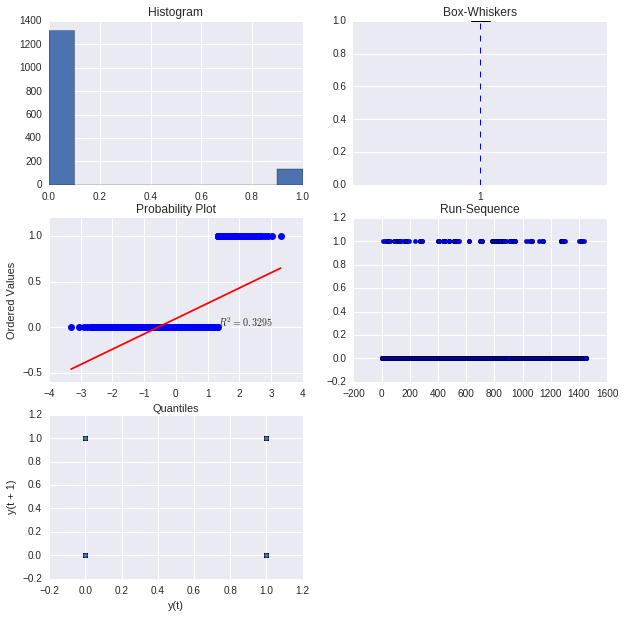

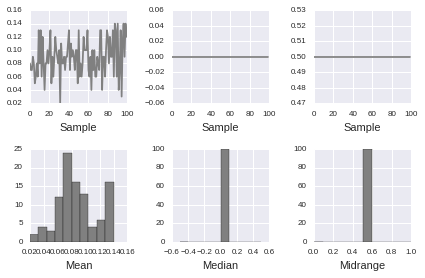

nonprofit
Skew:  16.953
Skew test:  SkewtestResult(statistic=47.848560876508216, pvalue=0.0)
Kurtosis:  285.403
Kurtosis test:  KurtosistestResult(statistic=26.61109827498429, pvalue=5.0504225781327444e-156)
 
PPCC_max value:  -0.84


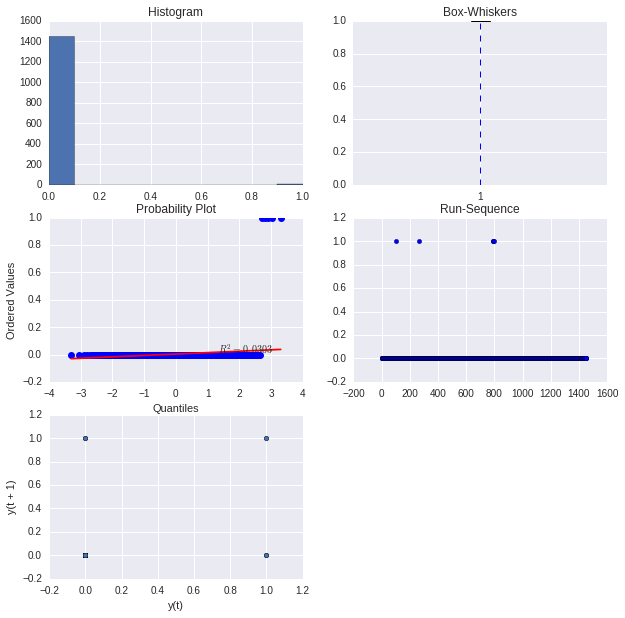

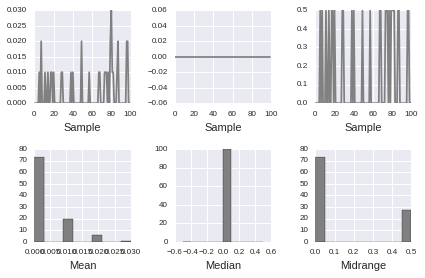

pakistani
Skew:  10.426
Skew test:  SkewtestResult(statistic=41.606640418852209, pvalue=0.0)
Kurtosis:  106.701
Kurtosis test:  KurtosistestResult(statistic=24.554769889061248, pvalue=3.8462783079299137e-133)
 
PPCC_max value:  139.726


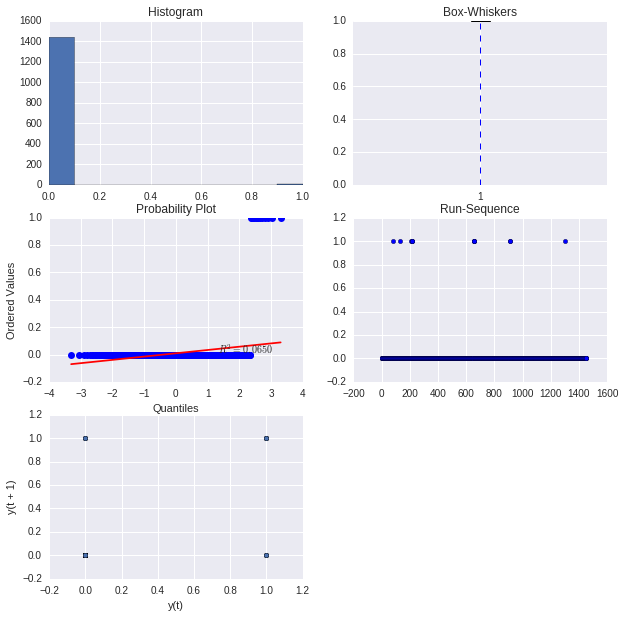

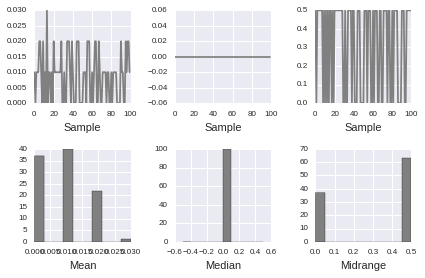

peruvian
Skew:  9.079
Skew test:  SkewtestResult(statistic=39.832876640614835, pvalue=0.0)
Kurtosis:  80.424
Kurtosis test:  KurtosistestResult(statistic=23.83409439840446, pvalue=1.4806002770835018e-125)
 
PPCC_max value:  106.513


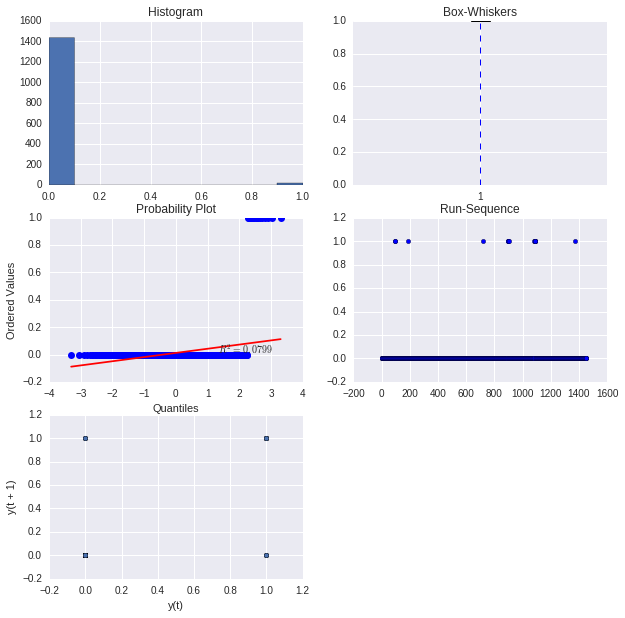

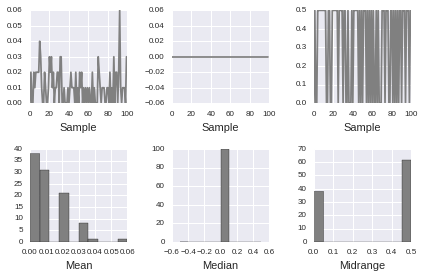

pianobars
Skew:  38.066
Skew test:  SkewtestResult(statistic=58.248832293024115, pvalue=0.0)
Kurtosis:  1447.001
Kurtosis test:  KurtosistestResult(statistic=28.842202977705817, pvalue=6.3465169483880958e-183)
 
PPCC_max value:  -38.369


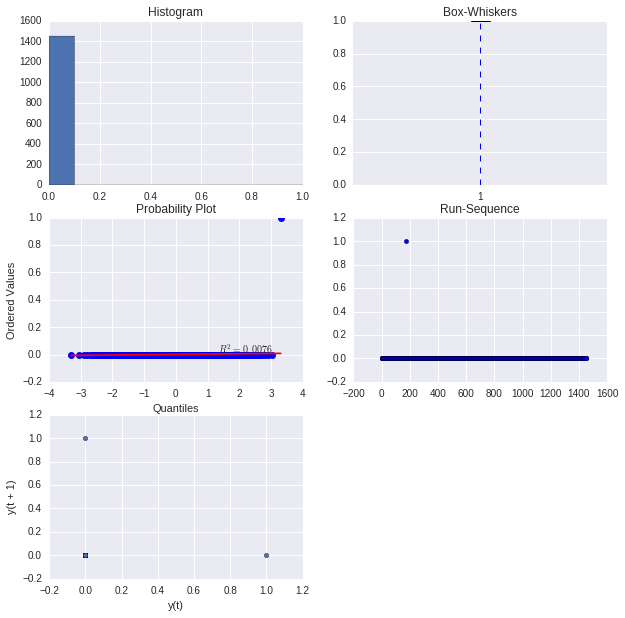

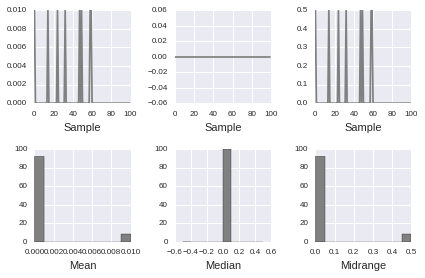

pizza
Skew:  4.793
Skew test:  SkewtestResult(statistic=31.68108171175049, pvalue=2.8313293273181543e-220)
Kurtosis:  20.969
Kurtosis test:  KurtosistestResult(statistic=19.433967877785907, pvalue=3.9834561277916854e-84)
 
PPCC_max value:  31.615


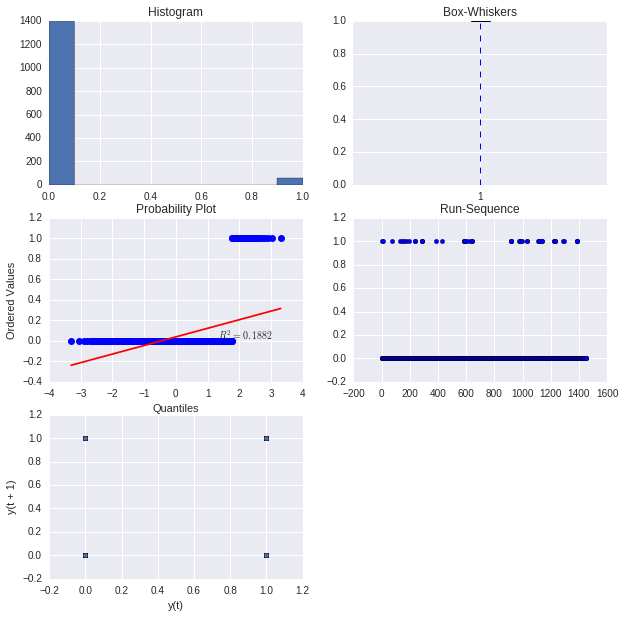

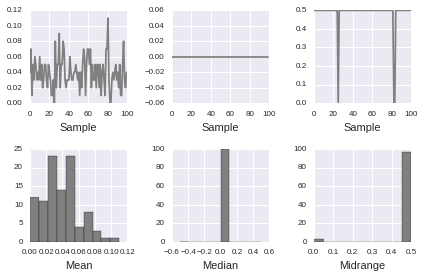

publicservicesgovt
Skew:  16.953
Skew test:  SkewtestResult(statistic=47.84856087650823, pvalue=0.0)
Kurtosis:  285.403
Kurtosis test:  KurtosistestResult(statistic=26.61109827498429, pvalue=5.0504225781327444e-156)
 
PPCC_max value:  -0.84


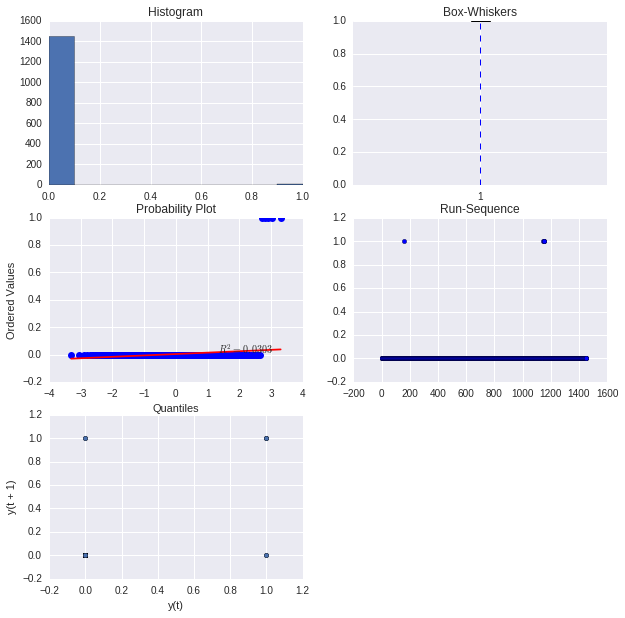

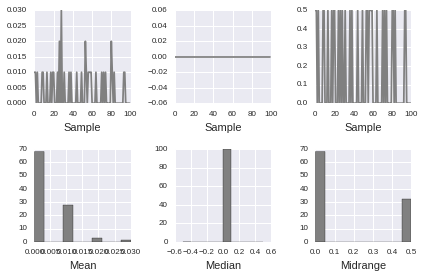

pubs
Skew:  7.423
Skew test:  SkewtestResult(statistic=37.255026496633349, pvalue=8.7852239117850198e-304)
Kurtosis:  53.098
Kurtosis test:  KurtosistestResult(statistic=22.654480064613679, pvalue=1.2602296532875511e-113)
 
PPCC_max value:  72.062


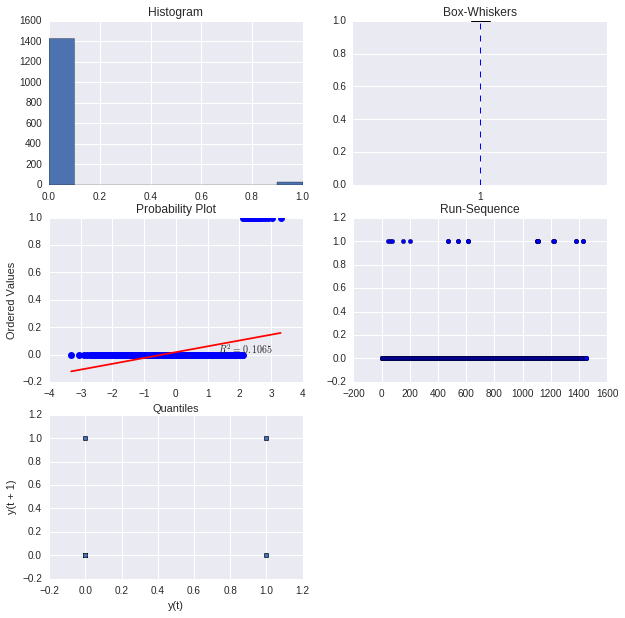

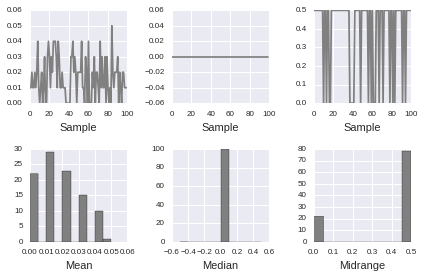

puertorican
Skew:  15.46
Skew test:  SkewtestResult(statistic=46.663876030081937, pvalue=0.0)
Kurtosis:  237.004
Kurtosis test:  KurtosistestResult(statistic=26.271169477564545, pvalue=4.0961770202213677e-152)
 
PPCC_max value:  -0.795


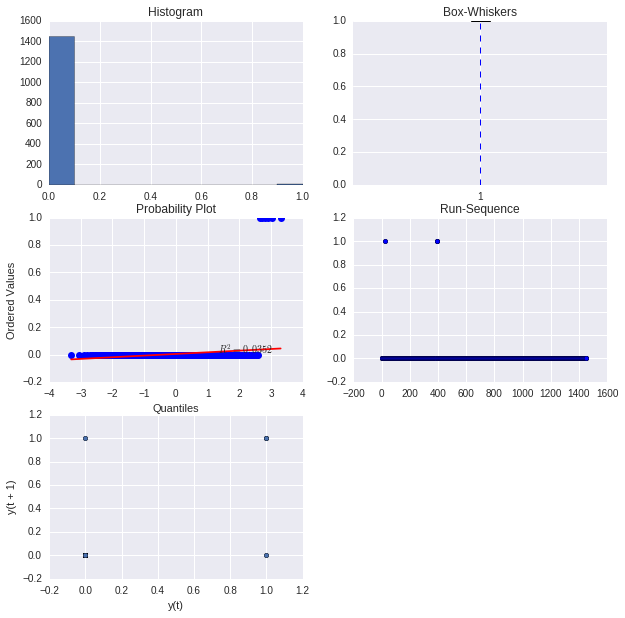

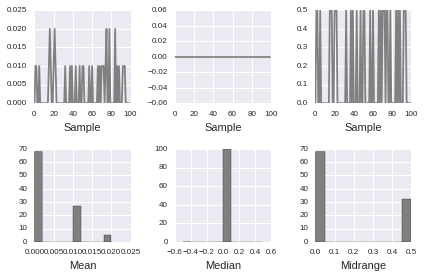

restaurants
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002235, pvalue=5.8797450630935724e-166)
 
PPCC_max value:  -1.003


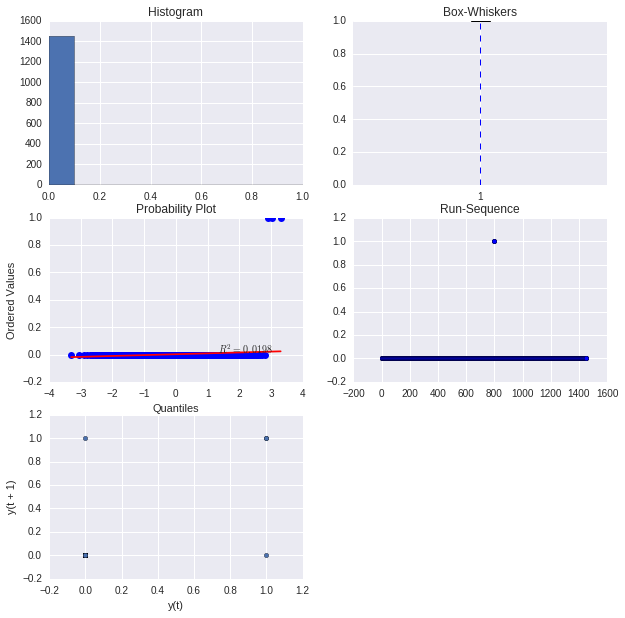

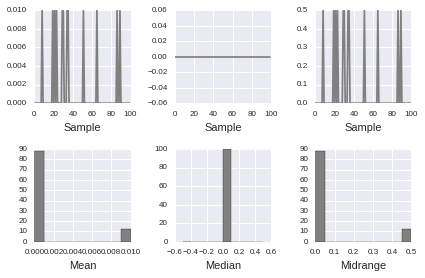

salad
Skew:  5.621
Skew test:  SkewtestResult(statistic=33.708087498482953, pvalue=4.4004175540879945e-249)
Kurtosis:  29.601
Kurtosis test:  KurtosistestResult(statistic=20.727137730184264, pvalue=1.9717374693280974e-95)
 
PPCC_max value:  42.482


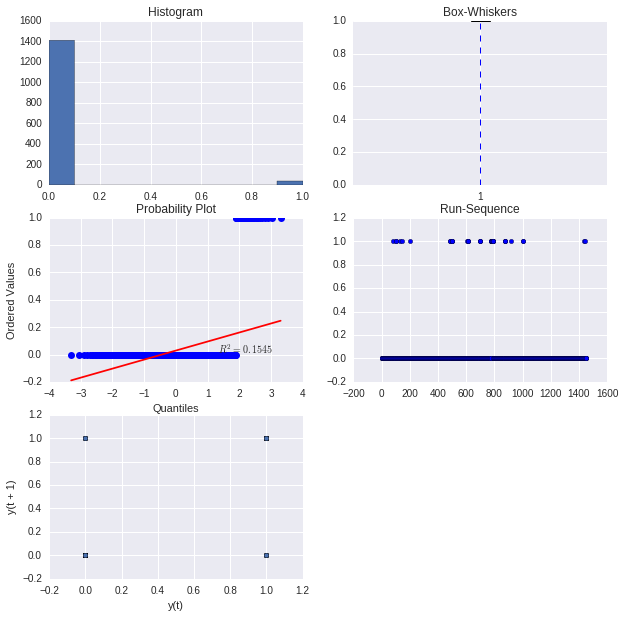

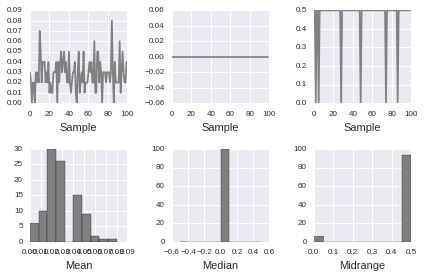

salvadoran
Skew:  14.298
Skew test:  SkewtestResult(statistic=45.660388120051472, pvalue=0.0)
Kurtosis:  202.433
Kurtosis test:  KurtosistestResult(statistic=25.966167376749382, pvalue=1.1943548534879895e-148)
 
PPCC_max value:  -0.759


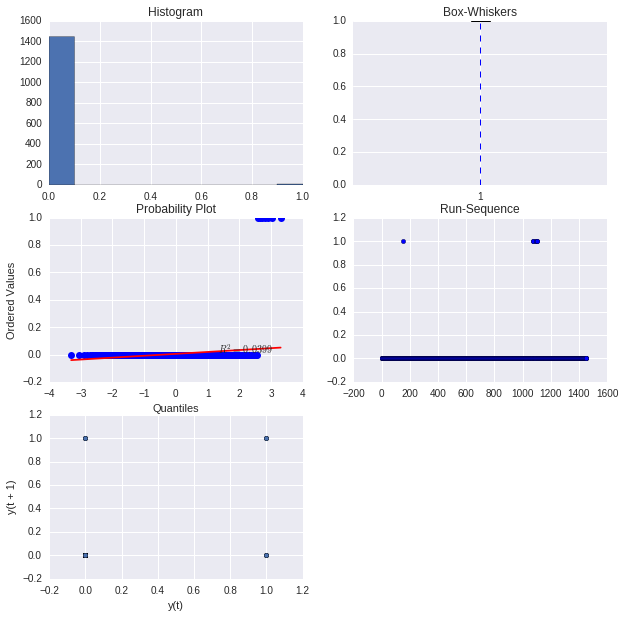

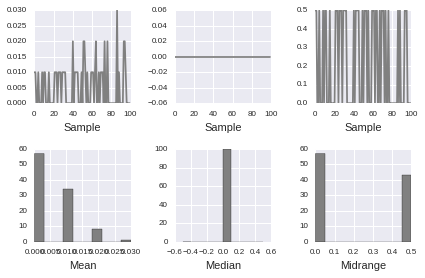

sandwiches
Skew:  2.128
Skew test:  SkewtestResult(statistic=21.59702734782444, pvalue=1.9155213792971373e-103)
Kurtosis:  2.528
Kurtosis test:  KurtosistestResult(statistic=9.5216503916060891, pvalue=1.7045022025087943e-21)
 
PPCC_max value:  8.275


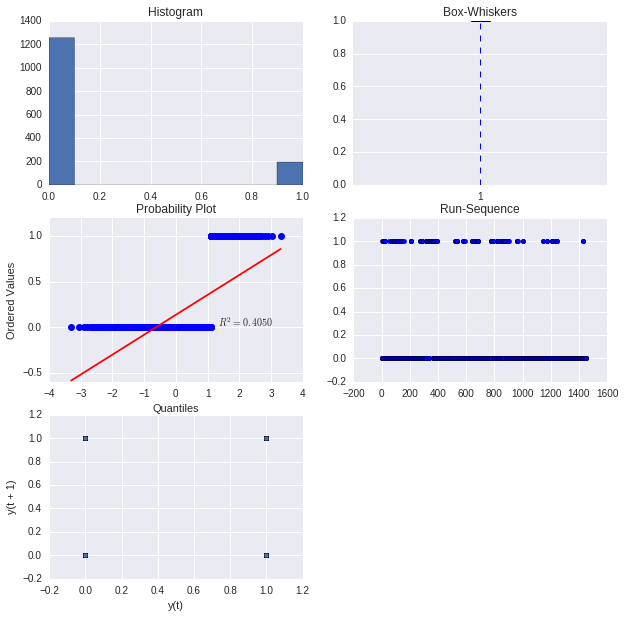

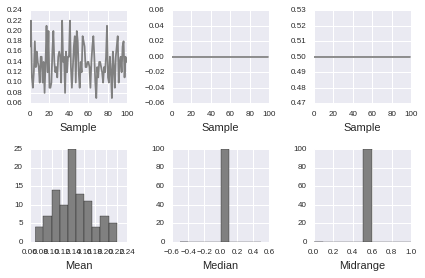

seafood
Skew:  8.134
Skew test:  SkewtestResult(statistic=38.42522191093903, pvalue=0.0)
Kurtosis:  64.158
Kurtosis test:  KurtosistestResult(statistic=23.210683848930525, pvalue=3.5517910639229674e-119)
 
PPCC_max value:  85.997


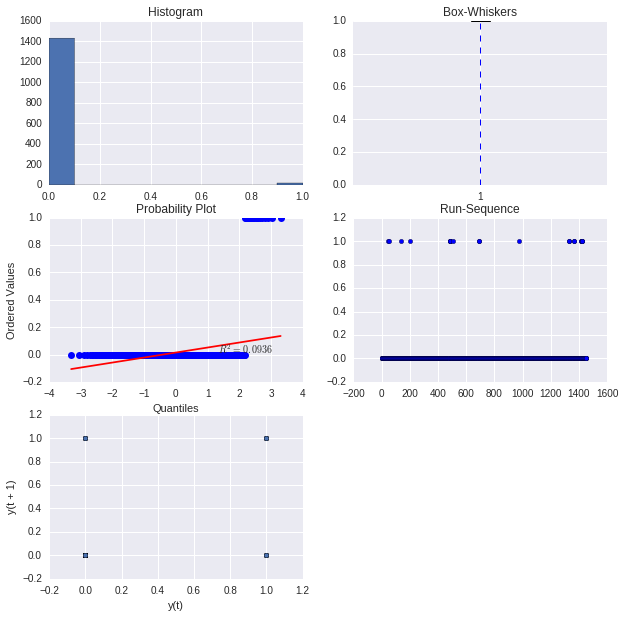

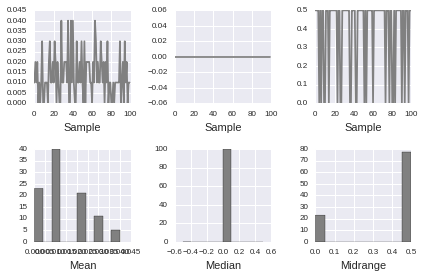

social_clubs
Skew:  13.361
Skew test:  SkewtestResult(statistic=44.789520526582891, pvalue=0.0)
Kurtosis:  176.506
Kurtosis test:  KurtosistestResult(statistic=25.688051393767037, pvalue=1.589658530126193e-145)
 
PPCC_max value:  -0.731


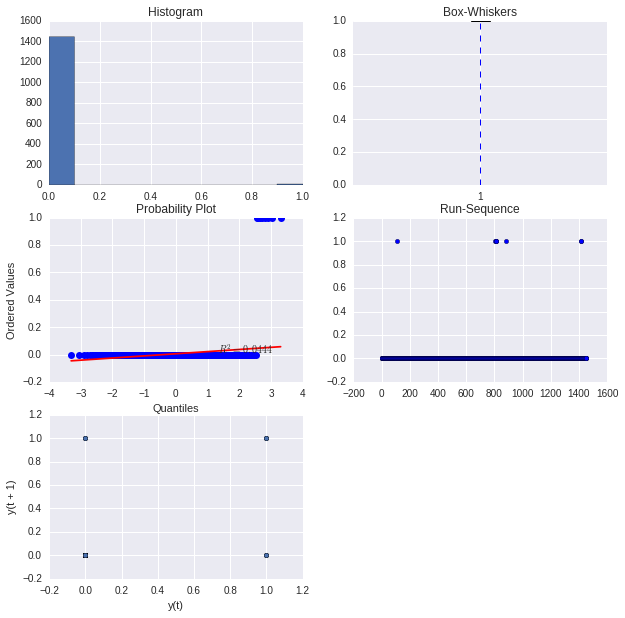

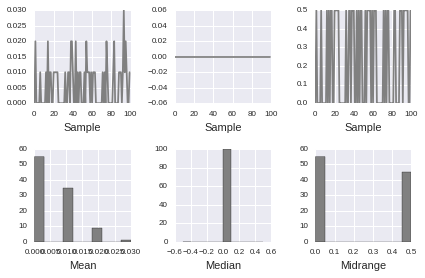

soulfood
Skew:  15.46
Skew test:  SkewtestResult(statistic=46.663876030081937, pvalue=0.0)
Kurtosis:  237.004
Kurtosis test:  KurtosistestResult(statistic=26.271169477564545, pvalue=4.0961770202213677e-152)
 
PPCC_max value:  -0.795


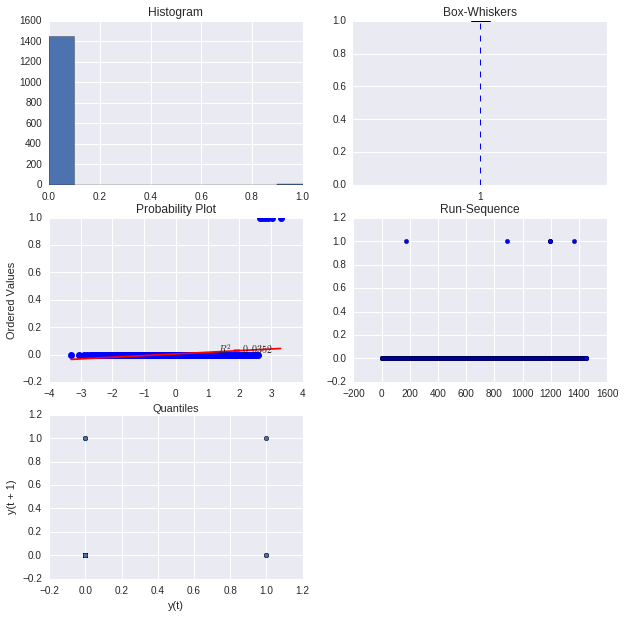

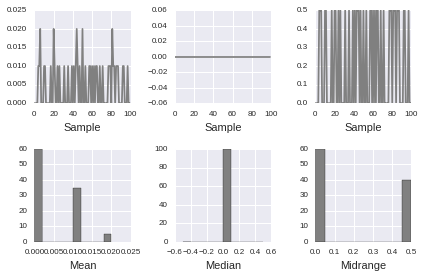

soup
Skew:  8.134
Skew test:  SkewtestResult(statistic=38.42522191093903, pvalue=0.0)
Kurtosis:  64.158
Kurtosis test:  KurtosistestResult(statistic=23.210683848930525, pvalue=3.5517910639229674e-119)
 
PPCC_max value:  85.997


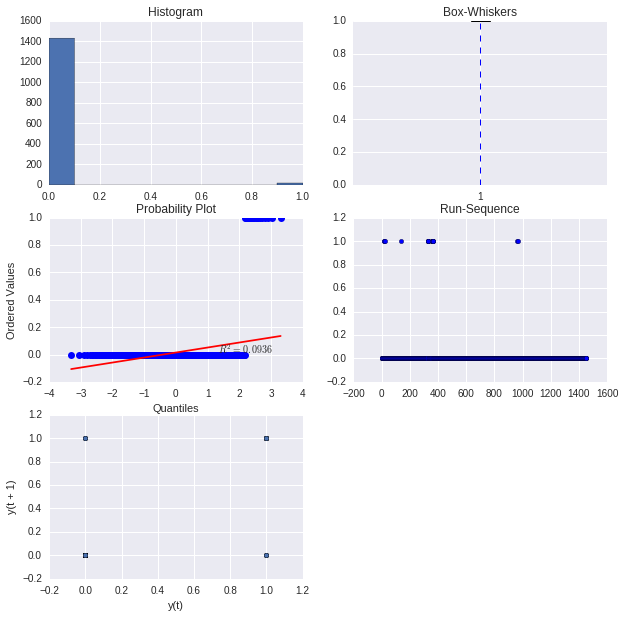

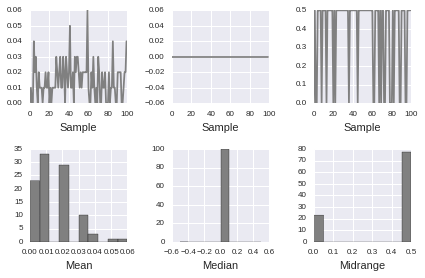

southern
Skew:  10.426
Skew test:  SkewtestResult(statistic=41.606640418852216, pvalue=0.0)
Kurtosis:  106.701
Kurtosis test:  KurtosistestResult(statistic=24.554769889061248, pvalue=3.8462783079299137e-133)
 
PPCC_max value:  139.726


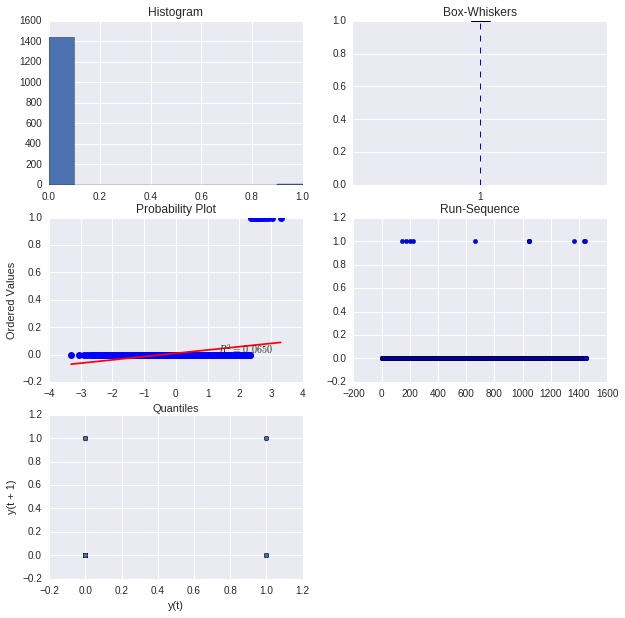

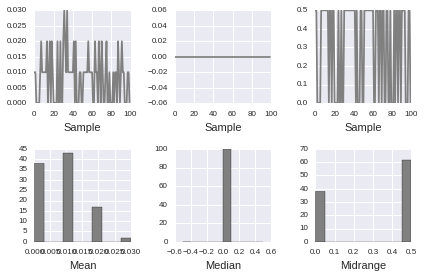

spanish
Skew:  10.036
Skew test:  SkewtestResult(statistic=41.117925363896482, pvalue=0.0)
Kurtosis:  98.724
Kurtosis test:  KurtosistestResult(statistic=24.363038165309668, pvalue=4.2177281679864677e-131)
 
PPCC_max value:  129.633


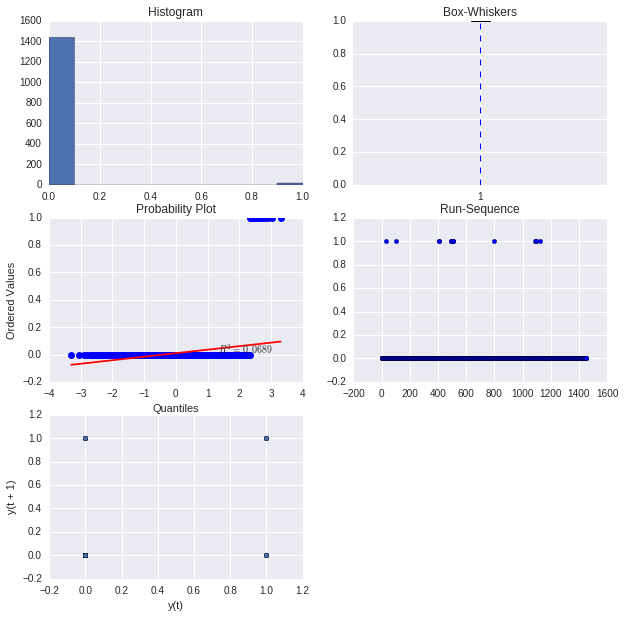

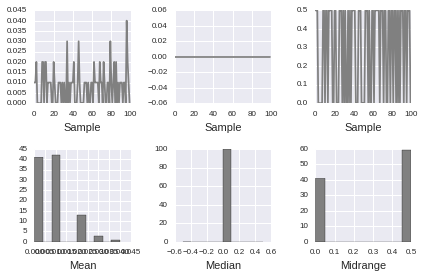

sports_clubs
Skew:  21.932
Skew test:  SkewtestResult(statistic=51.158221047011359, pvalue=0.0)
Kurtosis:  479.002
Kurtosis test:  KurtosistestResult(statistic=27.456070775002235, pvalue=5.8797450630935724e-166)
 
PPCC_max value:  -1.003


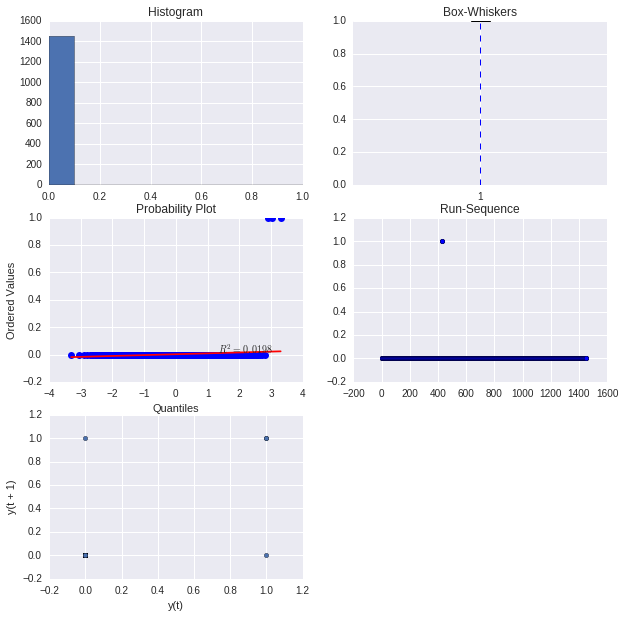

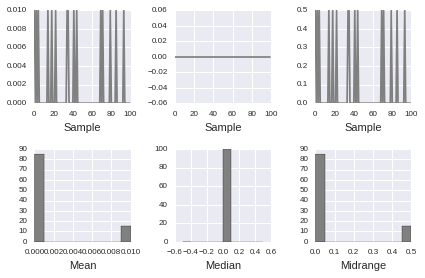

sportsbars
Skew:  11.358
Skew test:  SkewtestResult(statistic=42.705200909681935, pvalue=0.0)
Kurtosis:  127.008
Kurtosis test:  KurtosistestResult(statistic=24.967838526380948, pvalue=1.3671110191749205e-137)
 
PPCC_max value:  165.466


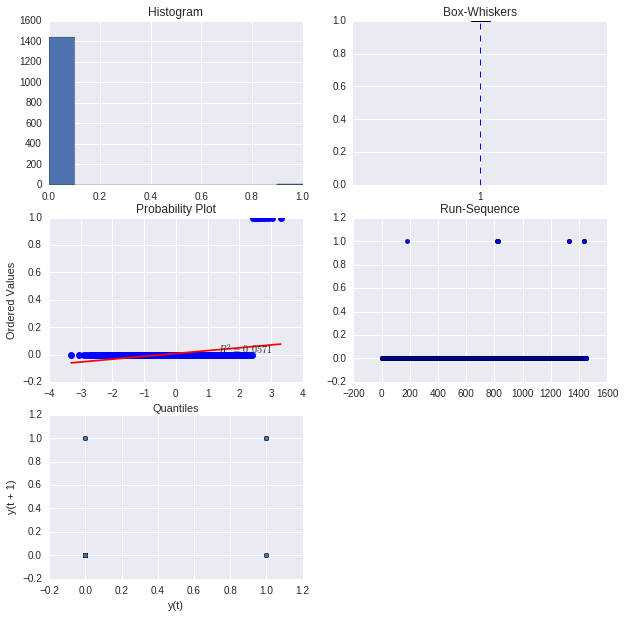

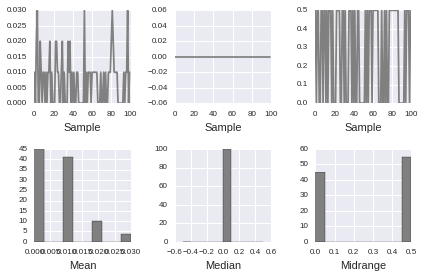

steak
Skew:  6.623
Skew test:  SkewtestResult(statistic=35.797829206197349, pvalue=1.193727380500143e-280)
Kurtosis:  41.861
Kurtosis test:  KurtosistestResult(statistic=21.909278781642691, pvalue=2.1191125264477265e-106)
 
PPCC_max value:  57.913


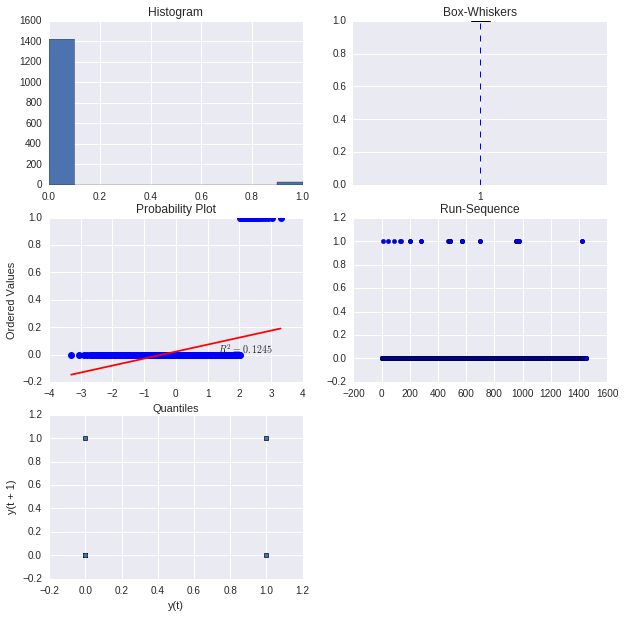

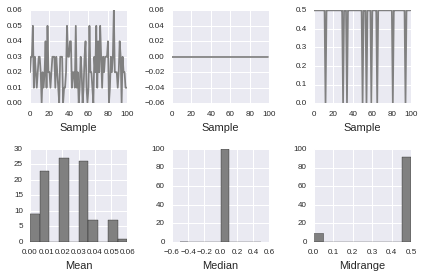

sushi
Skew:  11.925
Skew test:  SkewtestResult(statistic=43.330253588574678, pvalue=0.0)
Kurtosis:  140.207
Kurtosis test:  KurtosistestResult(statistic=25.192262091256342, pvalue=4.8694482229521845e-140)
 
PPCC_max value:  182.239


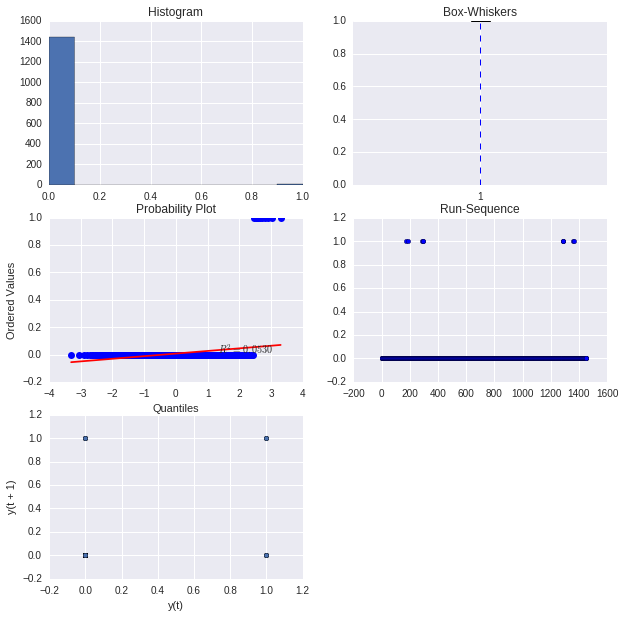

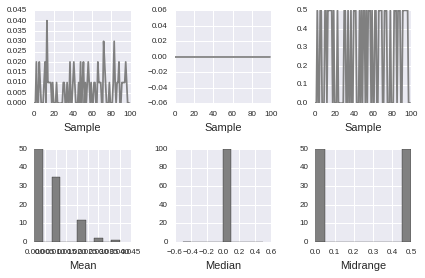

tapas
Skew:  16.953
Skew test:  SkewtestResult(statistic=47.84856087650823, pvalue=0.0)
Kurtosis:  285.403
Kurtosis test:  KurtosistestResult(statistic=26.61109827498429, pvalue=5.0504225781327444e-156)
 
PPCC_max value:  -0.84


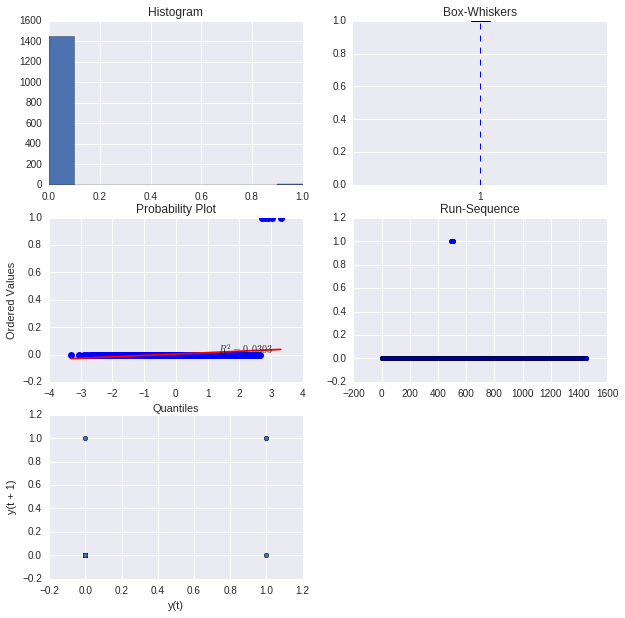

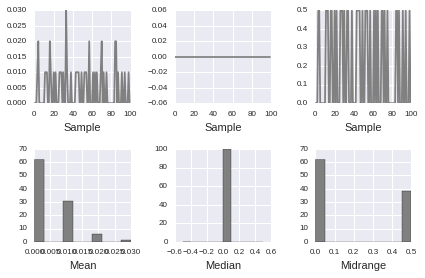

tapasmallplates
Skew:  10.426
Skew test:  SkewtestResult(statistic=41.606640418852201, pvalue=0.0)
Kurtosis:  106.701
Kurtosis test:  KurtosistestResult(statistic=24.554769889061248, pvalue=3.8462783079299137e-133)
 
PPCC_max value:  139.726


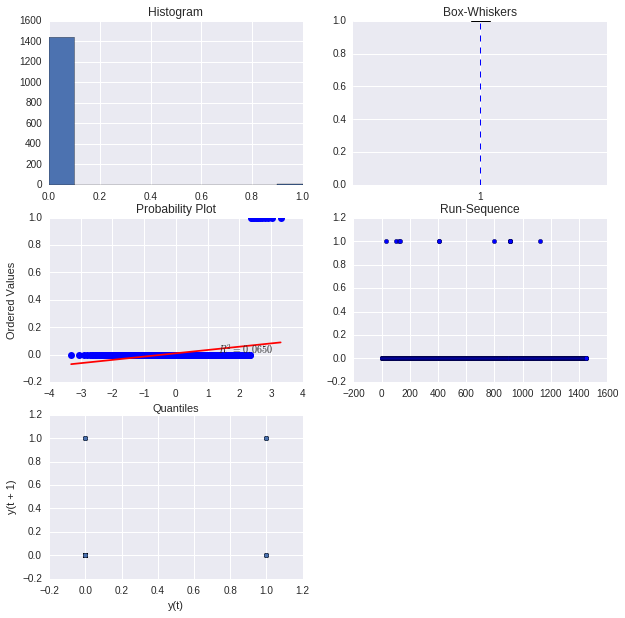

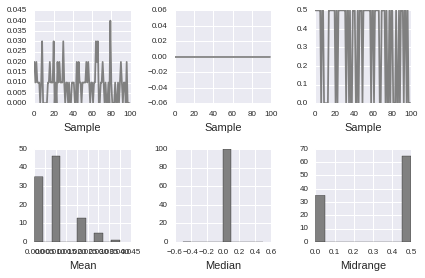

tea
Skew:  14.298
Skew test:  SkewtestResult(statistic=45.660388120051472, pvalue=0.0)
Kurtosis:  202.433
Kurtosis test:  KurtosistestResult(statistic=25.966167376749382, pvalue=1.1943548534879895e-148)
 
PPCC_max value:  -0.759


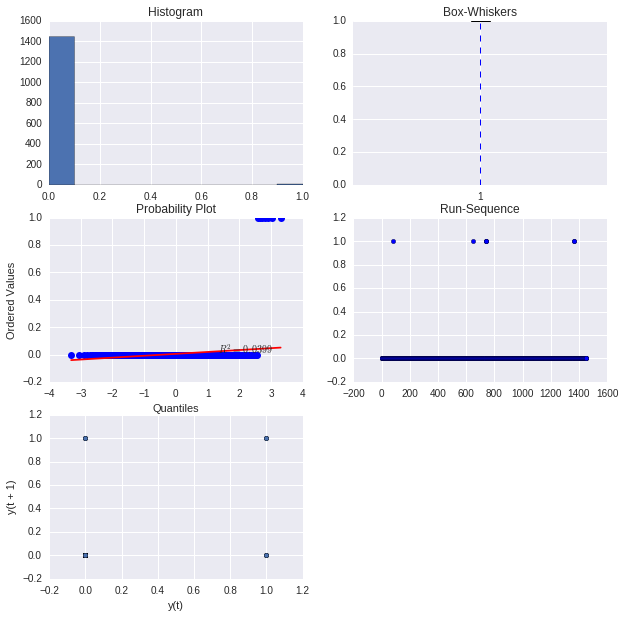

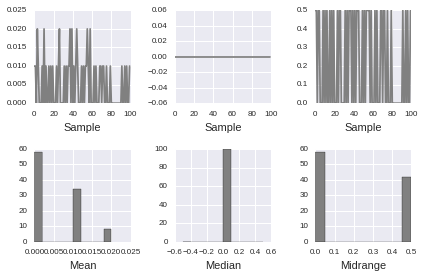

tex-mex
Skew:  7.271
Skew test:  SkewtestResult(statistic=36.990531629587963, pvalue=1.6258729168131848e-299)
Kurtosis:  50.864
Kurtosis test:  KurtosistestResult(statistic=22.523689910285746, pvalue=2.4324678057552007e-112)
 
PPCC_max value:  69.25


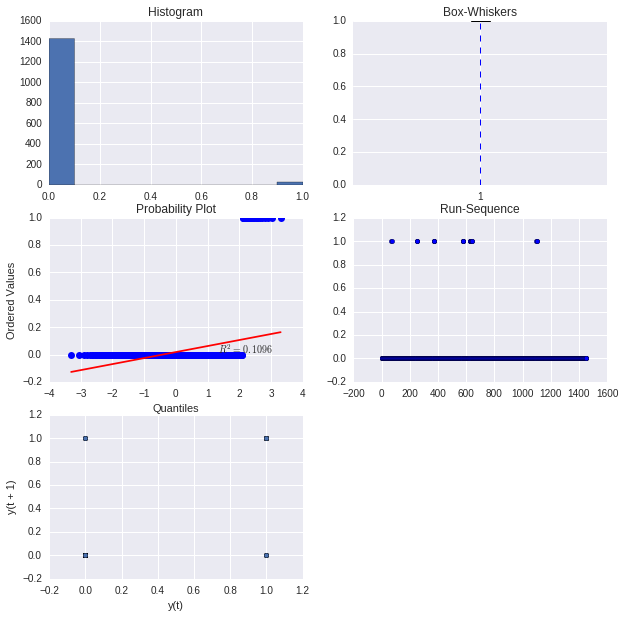

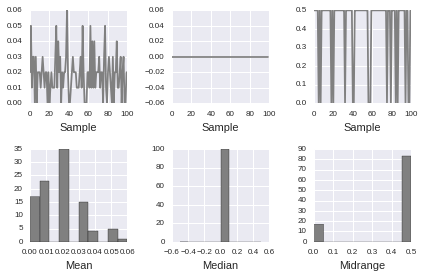

thai
Skew:  8.569
Skew test:  SkewtestResult(statistic=39.093245261583718, pvalue=0.0)
Kurtosis:  71.434
Kurtosis test:  KurtosistestResult(statistic=23.512510167102118, pvalue=3.0379697490038464e-122)
 
PPCC_max value:  95.172


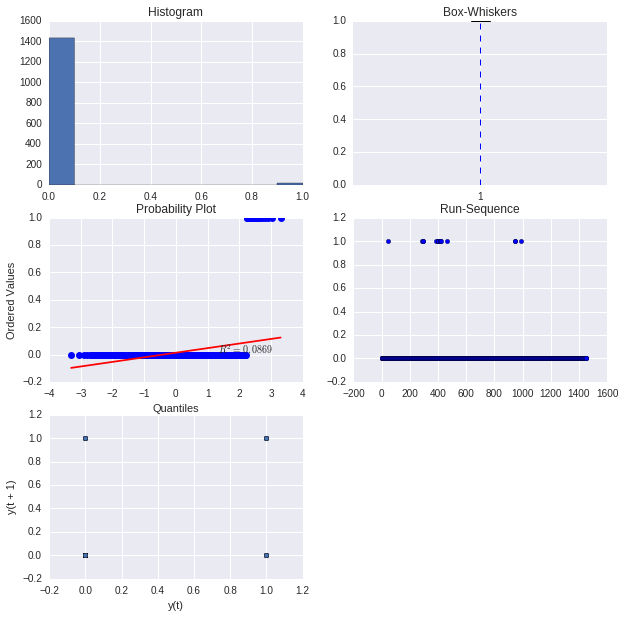

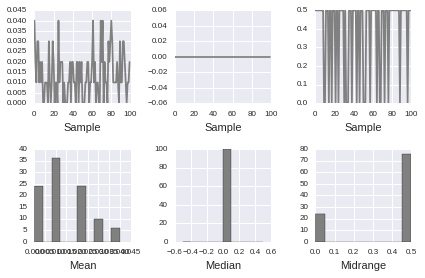

tobaccoshops
Skew:  38.066
Skew test:  SkewtestResult(statistic=58.248832293024101, pvalue=0.0)
Kurtosis:  1447.001
Kurtosis test:  KurtosistestResult(statistic=28.842202977705817, pvalue=6.3465169483880958e-183)
 
PPCC_max value:  -38.369


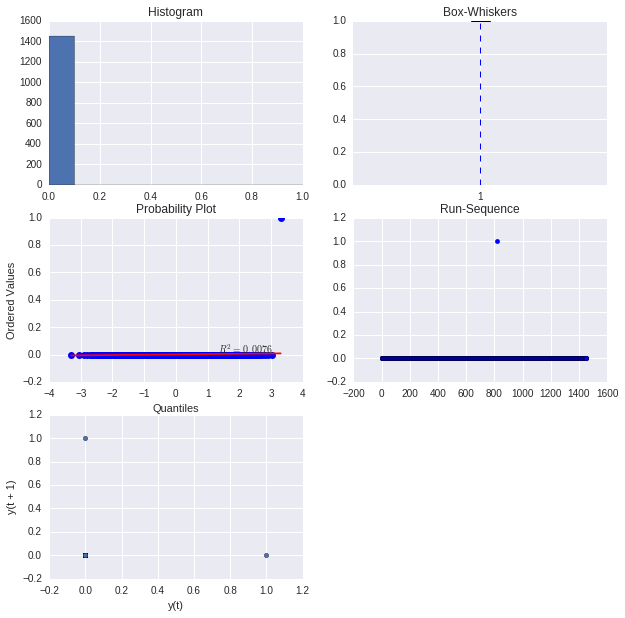

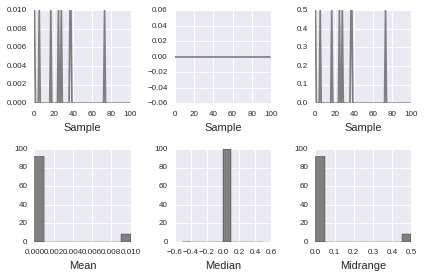

tradamerican
Skew:  2.669
Skew test:  SkewtestResult(statistic=24.35281105744723, pvalue=5.4131231633208609e-131)
Kurtosis:  5.125
Kurtosis test:  KurtosistestResult(statistic=13.042648439029247, pvalue=6.9983117859072685e-39)
 
PPCC_max value:  11.607


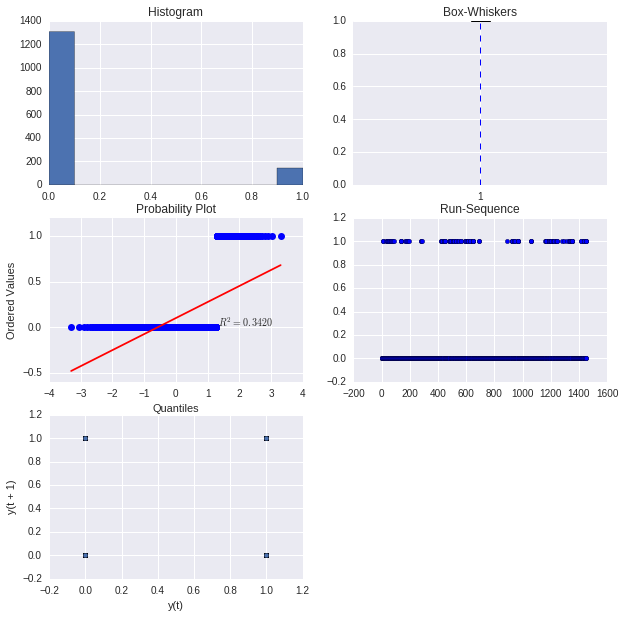

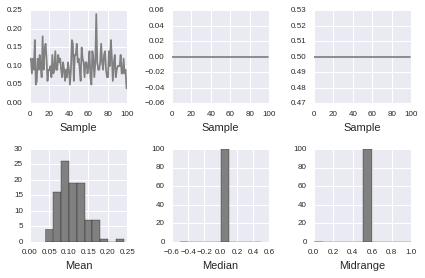

turkish
Skew:  26.889
Skew test:  SkewtestResult(statistic=53.778258357470577, pvalue=0.0)
Kurtosis:  721.001
Kurtosis test:  KurtosistestResult(statistic=28.028684727192545, pvalue=7.2670370607999477e-173)
 
PPCC_max value:  -1.216


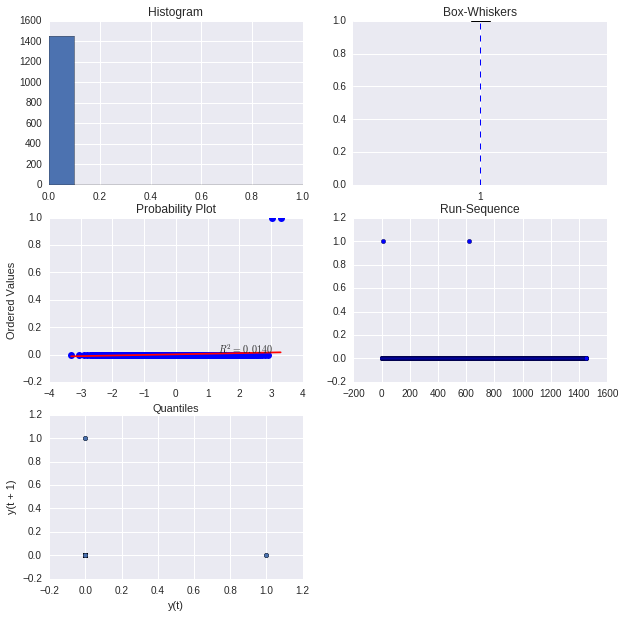

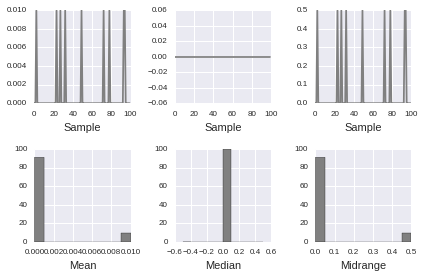

vegetarian
Skew:  6.74
Skew test:  SkewtestResult(statistic=36.021040058363255, pvalue=3.9190104131190849e-284)
Kurtosis:  43.421
Kurtosis test:  KurtosistestResult(statistic=22.027417555603687, pvalue=1.5728875287949069e-107)
 
PPCC_max value:  59.878


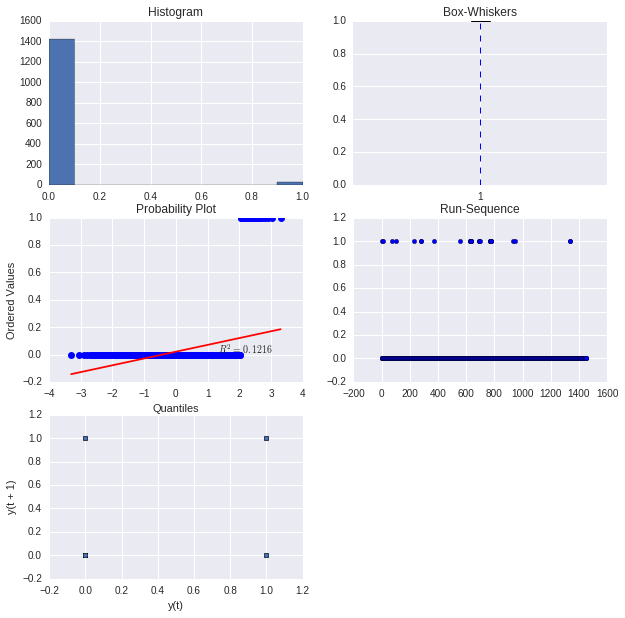

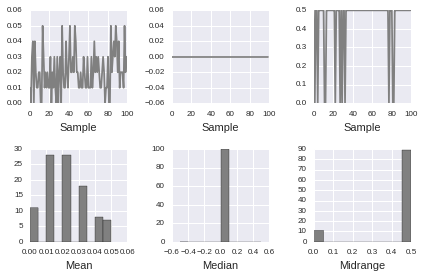

venues
Skew:  26.889
Skew test:  SkewtestResult(statistic=53.778258357470577, pvalue=0.0)
Kurtosis:  721.001
Kurtosis test:  KurtosistestResult(statistic=28.028684727192545, pvalue=7.2670370607999477e-173)
 
PPCC_max value:  -1.216


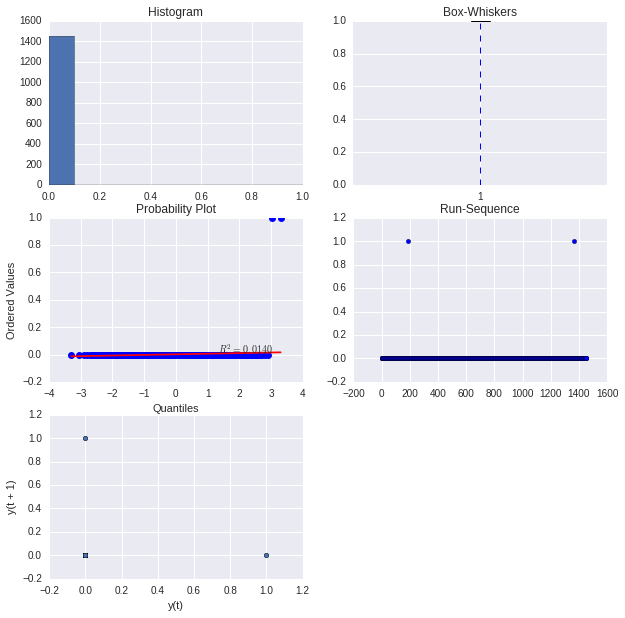

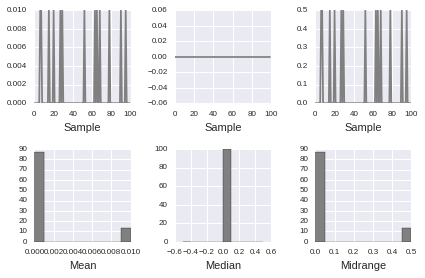

vietnamese
Skew:  10.036
Skew test:  SkewtestResult(statistic=41.117925363896482, pvalue=0.0)
Kurtosis:  98.724
Kurtosis test:  KurtosistestResult(statistic=24.363038165309668, pvalue=4.2177281679864677e-131)
 
PPCC_max value:  129.633


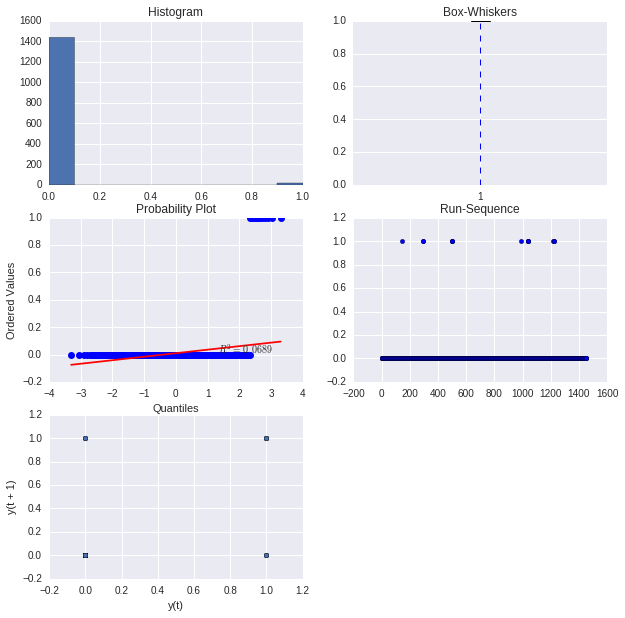

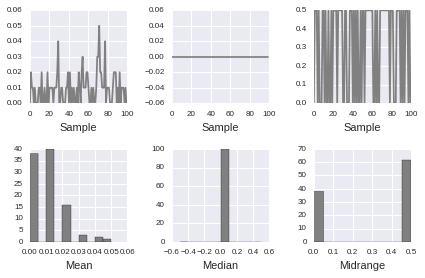

wholesale_stores
Skew:  15.46
Skew test:  SkewtestResult(statistic=46.663876030081937, pvalue=0.0)
Kurtosis:  237.004
Kurtosis test:  KurtosistestResult(statistic=26.271169477564548, pvalue=4.0961770202206691e-152)
 
PPCC_max value:  -0.795


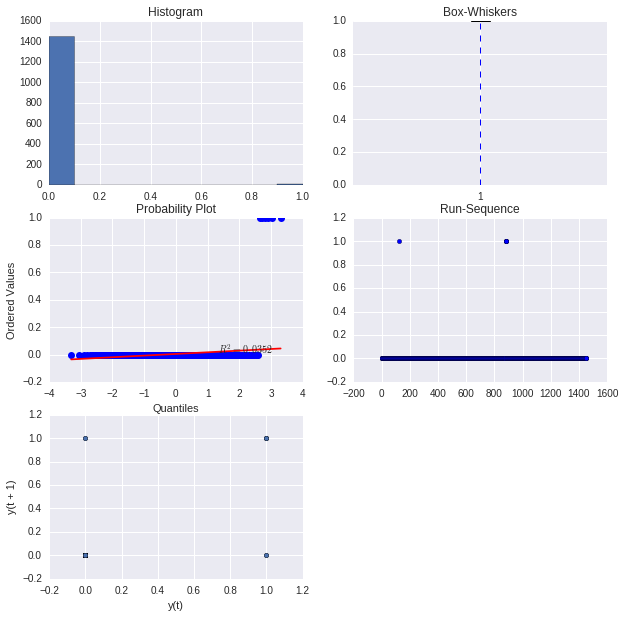

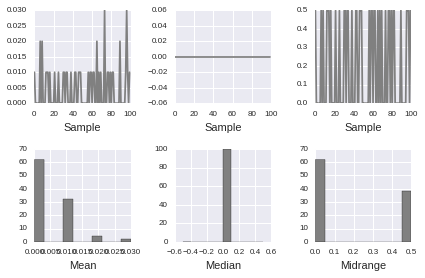

wine_bars
Skew:  10.426
Skew test:  SkewtestResult(statistic=41.606640418852209, pvalue=0.0)
Kurtosis:  106.701
Kurtosis test:  KurtosistestResult(statistic=24.554769889061248, pvalue=3.8462783079299137e-133)
 
PPCC_max value:  139.726


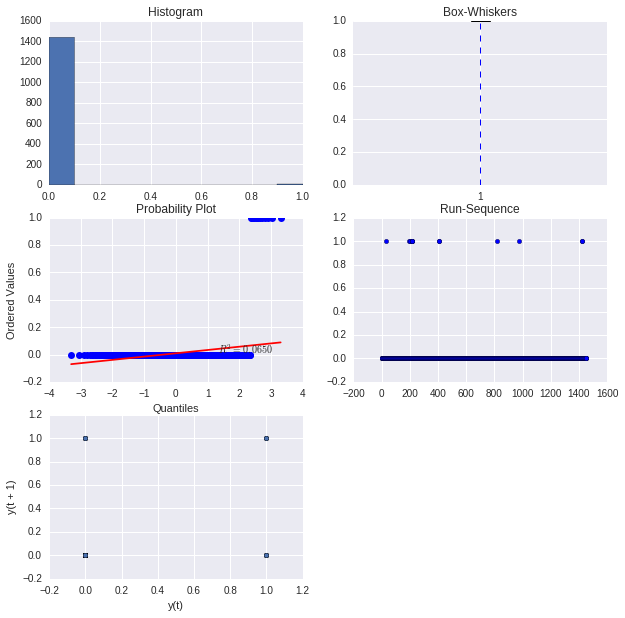

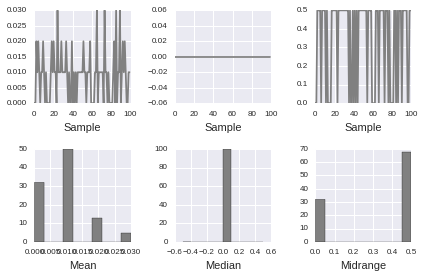

In [24]:
#First pass for looking at frequency costs as a function of column, testing data for normality,
# testing data for randomness, analyzing uncertainity of mean, median, and midrange values

for i in YelpCats.iloc[:,:]:
    print i 
    print "Skew: ", round(skew(YelpCats.iloc[:,:][i]),3)
    print "Skew test: ", skewtest(YelpCats.iloc[:,:][i])
    print "Kurtosis: ", round(kurtosis(YelpCats.iloc[:,:][i]),3)
    print "Kurtosis test: ", kurtosistest(YelpCats.iloc[:,:][i])
    print " "
    print "PPCC_max value: ", round(ppcc_max(YelpCats.iloc[:,:][i], brack = (-10,10)),3)
    #www.itl.nist.gov/div898/handbook/eda/section3/ppccplot.htm
    #ppcc_max~0.14 indicates a normal distribution. Less than 0.14 indicates long-tailed distributions (Cauchy).
    #Greater than 0.14 indicates short-tailed distributions (Beta or uniform).
    
    plt.figure(1, figsize = (10,10), dpi = 80)
    #histogram plot
    plt.subplot(321)
    plt.title("Histogram")
    plt.hist(YelpCats.iloc[:,:][i])
    
    #box and whiskers plot 
    plt.subplot(322)
    plt.title("Box-Whiskers")
    plt.boxplot(YelpCats.iloc[:,:][i])
    
    #normal probability plot - test for normality
    plt.subplot(323)
    plt.title("Normal Probability Test")
    probplot(YelpCats.iloc[:,:][i], plot=plt)
    
    #run-sequence plot - test for outliers, and shifts in location and variation
    plt.subplot(324)
    plt.title("Run-Sequence")
    plt.scatter(YelpCats.iloc[:,:][i].index, YelpCats.iloc[:,:][i])
    
    #lag plot - test for randomness
    plt.subplot(325)
    #plt.title("Lag")
    lag_plot(YelpCats.iloc[:,:][i])
    
    #bootstrap plot - test for uncertainity of mean, median, and midrange
    bootstrap_plot(YelpCats.iloc[:,:][i], size = 100, samples = 100, color = 'grey')
    
    plt.tight_layout()
    plt.show()

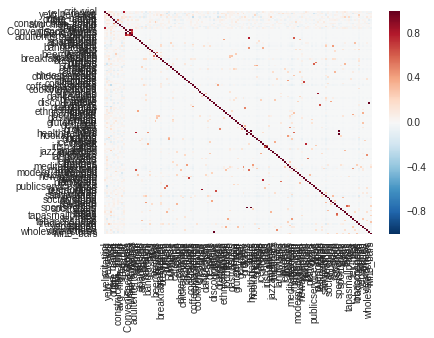

In [23]:
sns.heatmap(YelpCats.corr())